In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [5]:
"""
def remove_fully_black_slices(slices_dir):
    """"""
    Remove fully black (empty) slices from a directory containing NIfTI image files.

    Parameters:
        slices_dir (str): Path to the directory containing NIfTI slice files.

    Returns:
        list: List of valid slice filenames after removing fully black slices.
    """"""
    # List the saved slice files
    slice_files = sorted([f for f in os.listdir(slices_dir) if f.endswith(".nii.gz")])

    # List to store the valid slice files
    valid_slice_files = []

    # Load and check each slice for full blackness
    for slice_file in slice_files:
        slice_path = os.path.join(slices_dir, slice_file)

        # Load the slice
        nifti_slice = nib.load(slice_path)
        slice_data = nifti_slice.get_fdata()

        # Check if the slice contains any non-zero values (not fully black)
        if np.any(slice_data != 0):
            valid_slice_files.append(slice_file)

    # Optionally, remove the invalid slices
    for slice_file in slice_files:
        if slice_file not in valid_slice_files:
            os.remove(os.path.join(slices_dir, slice_file))

    return valid_slice_files
"""

'\ndef remove_fully_black_slices(slices_dir):\n    \n    Remove fully black (empty) slices from a directory containing NIfTI image files.\n\n    Parameters:\n        slices_dir (str): Path to the directory containing NIfTI slice files.\n\n    Returns:\n        list: List of valid slice filenames after removing fully black slices.\n    \n    # List the saved slice files\n    slice_files = sorted([f for f in os.listdir(slices_dir) if f.endswith(".nii.gz")])\n\n    # List to store the valid slice files\n    valid_slice_files = []\n\n    # Load and check each slice for full blackness\n    for slice_file in slice_files:\n        slice_path = os.path.join(slices_dir, slice_file)\n\n        # Load the slice\n        nifti_slice = nib.load(slice_path)\n        slice_data = nifti_slice.get_fdata()\n\n        # Check if the slice contains any non-zero values (not fully black)\n        if np.any(slice_data != 0):\n            valid_slice_files.append(slice_file)\n\n    # Optionally, remove the in

In [116]:
"""
input_image_path = "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Normalized/Pat8_COL_registered_zscore.nii.gz"
output_dir = "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/sliced_pat8_mask"
mask_path = "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Masks_Registered/COL_mask_registred/Pat8_COL_mask_registered.nii.gz"
"""

In [117]:
"""
nifti_image = nib.load(input_image_path)
nifiti_mask = nib.load(mask_path)
image_data = nifti_image.get_fdata()
mask_data = nifiti_mask.get_fdata()
"""

In [120]:
"""
for slice_index in range(image_data.shape[-1]):
    
    single_slice = image_data[..., slice_index]

    new_image = nib.Nifti1Image(single_slice, affine=nifti_image.affine)

    output_filename = os.path.join(output_dir, f"slice_{slice_index}.nii.gz")

    nib.save(new_image, output_filename)

    print(f"Saved slice {slice_index} to {output_filename}")
"""

'\nfor slice_index in range(image_data.shape[-1]):\n    \n    single_slice = image_data[..., slice_index]\n\n    new_image = nib.Nifti1Image(single_slice, affine=nifti_image.affine)\n\n    output_filename = os.path.join(output_dir, f"slice_{slice_index}.nii.gz")\n\n    nib.save(new_image, output_filename)\n\n    print(f"Saved slice {slice_index} to {output_filename}")\n'

In [18]:
base_dir = "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/"

patient_ids = ["Pat8", "Pat9", "Pat11", "Pat13", "Pat14", "Pat15", "Pat16", "Pat17", "Pat19", "Pat21", "Pat23", "Pat24", "Pat25", "Pat27", "Pat29", "Pat30", "Pat31", "Pat32", "Pat33", "Pat34", "Pat35", "Pat36", "Pat38", "Pat40", "Pat41", "Pat42", "Pat44", "Pat46", "Pat47", "Pat48", "Pat49", "Pat50", "Pat51", "Pat52", "Pat54", "Pat57", "Pat58", "Pat62", "Pat68", "Pat76", "Pat77", "Pat79", "Pat80", "Pat81", "Pat83", "Pat86", "Pat87", "Pat88", "Pat90", "Pat91", "Pat92", "Pat93", "Pat94", "Pat95", "Pat99", "Pat100", "Pat101", "Pat102", "Pat103", "Pat104", "Pat105", "Pat107", "Pat109", "Pat112", "Pat113", "Pat114", "Pat115", "Pat116", "Pat118", "Pat119", "Pat120", "Pat122", "Pat124", "Pat125", "Pat126", "Pat127", "Pat128", "Pat129", "Pat130", "Pat132", "Pat133", "Pat134", "Pat135", "Pat136", "Pat137", "Pat138", "Pat139", "Pat140", "Pat141", "Pat143", "Pat144", "Pat145", "Pat146", "Pat147", "Pat174"]

for patient_id in patient_ids:
    input_image_path = os.path.join(base_dir, f"Normalized/{patient_id}_COL_registered_zscore.nii.gz")
    mask_path = os.path.join(base_dir, f"Masks_Registered/COL_mask_registred/{patient_id}_COL_mask_registered.nii.gz")
    
    nifti_image = nib.load(input_image_path)
    nifti_mask = nib.load(mask_path)
    image_data = nifti_image.get_fdata()
    mask_data = nifti_mask.get_fdata()

    output_dir = os.path.join(base_dir, "Slices", f"{patient_id}_slices_COL")

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for slice_index in range(image_data.shape[-1]):
        if np.sum(mask_data[:, :, slice_index]) > 35000:
            single_slice = image_data[..., slice_index]
            mask_slice = mask_data[:, :, slice_index]

            # Create a new array with both image and mask
            combined_slice = np.dstack((single_slice, mask_slice))

            new_image = nib.Nifti1Image(combined_slice, affine=nifti_image.affine)
            output_filename = os.path.join(output_dir, f"slice_{slice_index}_COL.nii.gz")

            nib.save(new_image, output_filename)
            print(f"Saved slice {slice_index} with mask for patient {patient_id} to {output_filename}")


Saved slice 193 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_193_COL.nii.gz
Saved slice 194 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_194_COL.nii.gz
Saved slice 195 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_195_COL.nii.gz
Saved slice 196 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_196_COL.nii.gz
Saved slice 197 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_197_COL.nii.gz
Saved slice 198 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_198_COL.nii.gz
Saved slice 199 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_199_COL.nii.gz
Saved slice 200 with

Saved slice 254 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_254_COL.nii.gz
Saved slice 255 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_255_COL.nii.gz
Saved slice 256 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_256_COL.nii.gz
Saved slice 257 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_257_COL.nii.gz
Saved slice 258 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_258_COL.nii.gz
Saved slice 259 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_259_COL.nii.gz
Saved slice 260 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_260_COL.nii.gz
Saved slice 261 with

Saved slice 315 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_315_COL.nii.gz
Saved slice 316 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_316_COL.nii.gz
Saved slice 317 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_317_COL.nii.gz
Saved slice 318 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_318_COL.nii.gz
Saved slice 319 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_319_COL.nii.gz
Saved slice 320 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_320_COL.nii.gz
Saved slice 321 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat8_slices_COL/slice_321_COL.nii.gz
Saved slice 322 with

Saved slice 214 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_214_COL.nii.gz
Saved slice 215 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_215_COL.nii.gz
Saved slice 216 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_216_COL.nii.gz
Saved slice 217 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_217_COL.nii.gz
Saved slice 218 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_218_COL.nii.gz
Saved slice 219 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_219_COL.nii.gz
Saved slice 220 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_220_COL.nii.gz
Saved slice 221 with

Saved slice 277 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_277_COL.nii.gz
Saved slice 278 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_278_COL.nii.gz
Saved slice 279 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_279_COL.nii.gz
Saved slice 280 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_280_COL.nii.gz
Saved slice 281 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_281_COL.nii.gz
Saved slice 282 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_282_COL.nii.gz
Saved slice 283 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_283_COL.nii.gz
Saved slice 284 with

Saved slice 337 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_337_COL.nii.gz
Saved slice 338 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_338_COL.nii.gz
Saved slice 339 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_339_COL.nii.gz
Saved slice 340 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_340_COL.nii.gz
Saved slice 341 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_341_COL.nii.gz
Saved slice 342 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat9_slices_COL/slice_342_COL.nii.gz
Saved slice 193 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_193_COL.nii.gz
Saved slice 194 wi

Saved slice 245 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_245_COL.nii.gz
Saved slice 246 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_246_COL.nii.gz
Saved slice 247 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_247_COL.nii.gz
Saved slice 248 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_248_COL.nii.gz
Saved slice 249 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_249_COL.nii.gz
Saved slice 250 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_250_COL.nii.gz
Saved slice 251 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_251_COL.nii.gz
Saved 

Saved slice 306 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_306_COL.nii.gz
Saved slice 307 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_307_COL.nii.gz
Saved slice 308 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_308_COL.nii.gz
Saved slice 309 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_309_COL.nii.gz
Saved slice 310 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_310_COL.nii.gz
Saved slice 311 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_311_COL.nii.gz
Saved slice 312 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat11_slices_COL/slice_312_COL.nii.gz
Saved 

Saved slice 239 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat13_slices_COL/slice_239_COL.nii.gz
Saved slice 240 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat13_slices_COL/slice_240_COL.nii.gz
Saved slice 241 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat13_slices_COL/slice_241_COL.nii.gz
Saved slice 242 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat13_slices_COL/slice_242_COL.nii.gz
Saved slice 243 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat13_slices_COL/slice_243_COL.nii.gz
Saved slice 244 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat13_slices_COL/slice_244_COL.nii.gz
Saved slice 245 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat13_slices_COL/slice_245_COL.nii.gz
Saved 

Saved slice 306 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat13_slices_COL/slice_306_COL.nii.gz
Saved slice 307 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat13_slices_COL/slice_307_COL.nii.gz
Saved slice 308 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat13_slices_COL/slice_308_COL.nii.gz
Saved slice 309 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat13_slices_COL/slice_309_COL.nii.gz
Saved slice 310 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat13_slices_COL/slice_310_COL.nii.gz
Saved slice 311 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat13_slices_COL/slice_311_COL.nii.gz
Saved slice 312 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat13_slices_COL/slice_312_COL.nii.gz
Saved 

Saved slice 252 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat14_slices_COL/slice_252_COL.nii.gz
Saved slice 253 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat14_slices_COL/slice_253_COL.nii.gz
Saved slice 254 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat14_slices_COL/slice_254_COL.nii.gz
Saved slice 255 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat14_slices_COL/slice_255_COL.nii.gz
Saved slice 256 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat14_slices_COL/slice_256_COL.nii.gz
Saved slice 257 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat14_slices_COL/slice_257_COL.nii.gz
Saved slice 258 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat14_slices_COL/slice_258_COL.nii.gz
Saved 

Saved slice 313 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat14_slices_COL/slice_313_COL.nii.gz
Saved slice 314 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat14_slices_COL/slice_314_COL.nii.gz
Saved slice 315 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat14_slices_COL/slice_315_COL.nii.gz
Saved slice 316 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat14_slices_COL/slice_316_COL.nii.gz
Saved slice 317 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat14_slices_COL/slice_317_COL.nii.gz
Saved slice 318 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat14_slices_COL/slice_318_COL.nii.gz
Saved slice 319 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat14_slices_COL/slice_319_COL.nii.gz
Saved 

Saved slice 277 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat15_slices_COL/slice_277_COL.nii.gz
Saved slice 278 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat15_slices_COL/slice_278_COL.nii.gz
Saved slice 279 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat15_slices_COL/slice_279_COL.nii.gz
Saved slice 280 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat15_slices_COL/slice_280_COL.nii.gz
Saved slice 281 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat15_slices_COL/slice_281_COL.nii.gz
Saved slice 282 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat15_slices_COL/slice_282_COL.nii.gz
Saved slice 283 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat15_slices_COL/slice_283_COL.nii.gz
Saved 

Saved slice 339 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat15_slices_COL/slice_339_COL.nii.gz
Saved slice 340 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat15_slices_COL/slice_340_COL.nii.gz
Saved slice 341 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat15_slices_COL/slice_341_COL.nii.gz
Saved slice 342 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat15_slices_COL/slice_342_COL.nii.gz
Saved slice 343 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat15_slices_COL/slice_343_COL.nii.gz
Saved slice 344 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat15_slices_COL/slice_344_COL.nii.gz
Saved slice 345 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat15_slices_COL/slice_345_COL.nii.gz
Saved 

Saved slice 244 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat16_slices_COL/slice_244_COL.nii.gz
Saved slice 245 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat16_slices_COL/slice_245_COL.nii.gz
Saved slice 246 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat16_slices_COL/slice_246_COL.nii.gz
Saved slice 247 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat16_slices_COL/slice_247_COL.nii.gz
Saved slice 248 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat16_slices_COL/slice_248_COL.nii.gz
Saved slice 249 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat16_slices_COL/slice_249_COL.nii.gz
Saved slice 250 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat16_slices_COL/slice_250_COL.nii.gz
Saved 

Saved slice 319 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat16_slices_COL/slice_319_COL.nii.gz
Saved slice 320 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat16_slices_COL/slice_320_COL.nii.gz
Saved slice 321 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat16_slices_COL/slice_321_COL.nii.gz
Saved slice 322 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat16_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat16_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat16_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat16_slices_COL/slice_325_COL.nii.gz
Saved 

Saved slice 239 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat17_slices_COL/slice_239_COL.nii.gz
Saved slice 240 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat17_slices_COL/slice_240_COL.nii.gz
Saved slice 241 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat17_slices_COL/slice_241_COL.nii.gz
Saved slice 242 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat17_slices_COL/slice_242_COL.nii.gz
Saved slice 243 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat17_slices_COL/slice_243_COL.nii.gz
Saved slice 244 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat17_slices_COL/slice_244_COL.nii.gz
Saved slice 245 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat17_slices_COL/slice_245_COL.nii.gz
Saved 

Saved slice 302 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat17_slices_COL/slice_302_COL.nii.gz
Saved slice 303 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat17_slices_COL/slice_303_COL.nii.gz
Saved slice 304 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat17_slices_COL/slice_304_COL.nii.gz
Saved slice 305 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat17_slices_COL/slice_305_COL.nii.gz
Saved slice 306 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat17_slices_COL/slice_306_COL.nii.gz
Saved slice 307 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat17_slices_COL/slice_307_COL.nii.gz
Saved slice 308 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat17_slices_COL/slice_308_COL.nii.gz
Saved 

Saved slice 232 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_232_COL.nii.gz
Saved slice 233 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_233_COL.nii.gz
Saved slice 234 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_234_COL.nii.gz
Saved slice 235 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_235_COL.nii.gz
Saved slice 236 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_236_COL.nii.gz
Saved slice 237 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_237_COL.nii.gz
Saved slice 238 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_238_COL.nii.gz
Saved 

Saved slice 293 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_293_COL.nii.gz
Saved slice 294 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_294_COL.nii.gz
Saved slice 295 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_295_COL.nii.gz
Saved slice 296 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_296_COL.nii.gz
Saved slice 297 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_297_COL.nii.gz
Saved slice 298 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_298_COL.nii.gz
Saved slice 299 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_299_COL.nii.gz
Saved 

Saved slice 355 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_355_COL.nii.gz
Saved slice 356 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_356_COL.nii.gz
Saved slice 357 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_357_COL.nii.gz
Saved slice 358 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_358_COL.nii.gz
Saved slice 359 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_359_COL.nii.gz
Saved slice 360 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_360_COL.nii.gz
Saved slice 361 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat19_slices_COL/slice_361_COL.nii.gz
Saved 

Saved slice 285 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat21_slices_COL/slice_285_COL.nii.gz
Saved slice 286 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat21_slices_COL/slice_286_COL.nii.gz
Saved slice 287 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat21_slices_COL/slice_287_COL.nii.gz
Saved slice 288 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat21_slices_COL/slice_288_COL.nii.gz
Saved slice 289 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat21_slices_COL/slice_289_COL.nii.gz
Saved slice 290 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat21_slices_COL/slice_290_COL.nii.gz
Saved slice 291 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat21_slices_COL/slice_291_COL.nii.gz
Saved 

Saved slice 352 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat21_slices_COL/slice_352_COL.nii.gz
Saved slice 353 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat21_slices_COL/slice_353_COL.nii.gz
Saved slice 354 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat21_slices_COL/slice_354_COL.nii.gz
Saved slice 355 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat21_slices_COL/slice_355_COL.nii.gz
Saved slice 356 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat21_slices_COL/slice_356_COL.nii.gz
Saved slice 357 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat21_slices_COL/slice_357_COL.nii.gz
Saved slice 358 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat21_slices_COL/slice_358_COL.nii.gz
Saved 

Saved slice 276 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_276_COL.nii.gz
Saved slice 277 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_277_COL.nii.gz
Saved slice 278 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_278_COL.nii.gz
Saved slice 279 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_279_COL.nii.gz
Saved slice 280 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_280_COL.nii.gz
Saved slice 281 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_281_COL.nii.gz
Saved slice 282 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_282_COL.nii.gz
Saved 

Saved slice 343 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_343_COL.nii.gz
Saved slice 344 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_344_COL.nii.gz
Saved slice 345 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_345_COL.nii.gz
Saved slice 346 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_346_COL.nii.gz
Saved slice 347 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_347_COL.nii.gz
Saved slice 348 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_348_COL.nii.gz
Saved slice 349 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_349_COL.nii.gz
Saved 

Saved slice 405 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_405_COL.nii.gz
Saved slice 406 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_406_COL.nii.gz
Saved slice 407 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_407_COL.nii.gz
Saved slice 408 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_408_COL.nii.gz
Saved slice 409 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat23_slices_COL/slice_409_COL.nii.gz
Saved slice 207 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_207_COL.nii.gz
Saved slice 208 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_208_COL.nii.gz
Saved 

Saved slice 264 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_265_COL.nii.gz
Saved slice 266 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_266_COL.nii.gz
Saved slice 267 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_267_COL.nii.gz
Saved slice 268 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_268_COL.nii.gz
Saved slice 269 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_269_COL.nii.gz
Saved slice 270 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_270_COL.nii.gz
Saved 

Saved slice 324 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_325_COL.nii.gz
Saved slice 326 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_326_COL.nii.gz
Saved slice 327 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_327_COL.nii.gz
Saved slice 328 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_328_COL.nii.gz
Saved slice 329 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_329_COL.nii.gz
Saved slice 330 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat24_slices_COL/slice_330_COL.nii.gz
Saved 

Saved slice 283 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat25_slices_COL/slice_283_COL.nii.gz
Saved slice 284 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat25_slices_COL/slice_284_COL.nii.gz
Saved slice 285 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat25_slices_COL/slice_285_COL.nii.gz
Saved slice 286 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat25_slices_COL/slice_286_COL.nii.gz
Saved slice 287 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat25_slices_COL/slice_287_COL.nii.gz
Saved slice 288 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat25_slices_COL/slice_288_COL.nii.gz
Saved slice 289 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat25_slices_COL/slice_289_COL.nii.gz
Saved 

Saved slice 347 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat25_slices_COL/slice_347_COL.nii.gz
Saved slice 348 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat25_slices_COL/slice_348_COL.nii.gz
Saved slice 349 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat25_slices_COL/slice_349_COL.nii.gz
Saved slice 350 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat25_slices_COL/slice_350_COL.nii.gz
Saved slice 351 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat25_slices_COL/slice_351_COL.nii.gz
Saved slice 352 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat25_slices_COL/slice_352_COL.nii.gz
Saved slice 353 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat25_slices_COL/slice_353_COL.nii.gz
Saved 

Saved slice 241 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_241_COL.nii.gz
Saved slice 242 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_242_COL.nii.gz
Saved slice 243 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_243_COL.nii.gz
Saved slice 244 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_244_COL.nii.gz
Saved slice 245 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_245_COL.nii.gz
Saved slice 246 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_246_COL.nii.gz
Saved slice 247 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_247_COL.nii.gz
Saved 

Saved slice 300 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_300_COL.nii.gz
Saved slice 301 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_301_COL.nii.gz
Saved slice 302 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_302_COL.nii.gz
Saved slice 303 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_303_COL.nii.gz
Saved slice 304 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_304_COL.nii.gz
Saved slice 305 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_305_COL.nii.gz
Saved slice 306 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_306_COL.nii.gz
Saved 

Saved slice 359 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_359_COL.nii.gz
Saved slice 360 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_360_COL.nii.gz
Saved slice 361 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_361_COL.nii.gz
Saved slice 362 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_362_COL.nii.gz
Saved slice 363 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_363_COL.nii.gz
Saved slice 364 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_364_COL.nii.gz
Saved slice 365 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat27_slices_COL/slice_365_COL.nii.gz
Saved 

Saved slice 255 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_255_COL.nii.gz
Saved slice 256 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_256_COL.nii.gz
Saved slice 257 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_257_COL.nii.gz
Saved slice 258 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_258_COL.nii.gz
Saved slice 259 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_259_COL.nii.gz
Saved slice 260 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_260_COL.nii.gz
Saved slice 261 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_261_COL.nii.gz
Saved 

Saved slice 314 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_314_COL.nii.gz
Saved slice 315 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_315_COL.nii.gz
Saved slice 316 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_316_COL.nii.gz
Saved slice 317 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_317_COL.nii.gz
Saved slice 318 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_318_COL.nii.gz
Saved slice 319 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_319_COL.nii.gz
Saved slice 320 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_320_COL.nii.gz
Saved 

Saved slice 379 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_379_COL.nii.gz
Saved slice 380 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_380_COL.nii.gz
Saved slice 381 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat29_slices_COL/slice_381_COL.nii.gz
Saved slice 203 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_203_COL.nii.gz
Saved slice 204 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_204_COL.nii.gz
Saved slice 205 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_205_COL.nii.gz
Saved slice 206 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_206_COL.nii.gz
Saved 

Saved slice 262 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_265_COL.nii.gz
Saved slice 266 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_266_COL.nii.gz
Saved slice 267 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_267_COL.nii.gz
Saved slice 268 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_268_COL.nii.gz
Saved 

Saved slice 327 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_327_COL.nii.gz
Saved slice 328 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_328_COL.nii.gz
Saved slice 329 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_329_COL.nii.gz
Saved slice 330 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_330_COL.nii.gz
Saved slice 331 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_331_COL.nii.gz
Saved slice 332 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_332_COL.nii.gz
Saved slice 333 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat30_slices_COL/slice_333_COL.nii.gz
Saved 

Saved slice 220 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_220_COL.nii.gz
Saved slice 221 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_221_COL.nii.gz
Saved slice 222 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_222_COL.nii.gz
Saved slice 223 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_223_COL.nii.gz
Saved slice 224 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_224_COL.nii.gz
Saved slice 225 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_225_COL.nii.gz
Saved slice 226 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_226_COL.nii.gz
Saved 

Saved slice 280 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_280_COL.nii.gz
Saved slice 281 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_281_COL.nii.gz
Saved slice 282 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_282_COL.nii.gz
Saved slice 283 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_283_COL.nii.gz
Saved slice 284 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_284_COL.nii.gz
Saved slice 285 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_285_COL.nii.gz
Saved slice 286 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_286_COL.nii.gz
Saved 

Saved slice 342 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_342_COL.nii.gz
Saved slice 343 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_343_COL.nii.gz
Saved slice 344 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_344_COL.nii.gz
Saved slice 345 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_345_COL.nii.gz
Saved slice 346 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_346_COL.nii.gz
Saved slice 347 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_347_COL.nii.gz
Saved slice 348 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat31_slices_COL/slice_348_COL.nii.gz
Saved 

Saved slice 245 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat32_slices_COL/slice_245_COL.nii.gz
Saved slice 246 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat32_slices_COL/slice_246_COL.nii.gz
Saved slice 247 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat32_slices_COL/slice_247_COL.nii.gz
Saved slice 248 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat32_slices_COL/slice_248_COL.nii.gz
Saved slice 249 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat32_slices_COL/slice_249_COL.nii.gz
Saved slice 250 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat32_slices_COL/slice_250_COL.nii.gz
Saved slice 251 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat32_slices_COL/slice_251_COL.nii.gz
Saved 

Saved slice 308 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat32_slices_COL/slice_308_COL.nii.gz
Saved slice 309 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat32_slices_COL/slice_309_COL.nii.gz
Saved slice 310 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat32_slices_COL/slice_310_COL.nii.gz
Saved slice 311 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat32_slices_COL/slice_311_COL.nii.gz
Saved slice 312 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat32_slices_COL/slice_312_COL.nii.gz
Saved slice 313 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat32_slices_COL/slice_313_COL.nii.gz
Saved slice 314 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat32_slices_COL/slice_314_COL.nii.gz
Saved 

Saved slice 224 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_224_COL.nii.gz
Saved slice 225 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_225_COL.nii.gz
Saved slice 226 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_226_COL.nii.gz
Saved slice 227 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_227_COL.nii.gz
Saved slice 228 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_228_COL.nii.gz
Saved slice 229 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_229_COL.nii.gz
Saved slice 230 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_230_COL.nii.gz
Saved 

Saved slice 287 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_287_COL.nii.gz
Saved slice 288 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_288_COL.nii.gz
Saved slice 289 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_289_COL.nii.gz
Saved slice 290 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_290_COL.nii.gz
Saved slice 291 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_291_COL.nii.gz
Saved slice 292 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_292_COL.nii.gz
Saved slice 293 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_293_COL.nii.gz
Saved 

Saved slice 347 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_347_COL.nii.gz
Saved slice 348 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_348_COL.nii.gz
Saved slice 349 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_349_COL.nii.gz
Saved slice 350 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat33_slices_COL/slice_350_COL.nii.gz
Saved slice 218 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_218_COL.nii.gz
Saved slice 219 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_219_COL.nii.gz
Saved slice 220 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_220_COL.nii.gz
Saved 

Saved slice 272 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_272_COL.nii.gz
Saved slice 273 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_273_COL.nii.gz
Saved slice 274 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_274_COL.nii.gz
Saved slice 275 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_275_COL.nii.gz
Saved slice 276 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_276_COL.nii.gz
Saved slice 277 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_277_COL.nii.gz
Saved slice 278 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_278_COL.nii.gz
Saved 

Saved slice 333 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_333_COL.nii.gz
Saved slice 334 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_334_COL.nii.gz
Saved slice 335 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_335_COL.nii.gz
Saved slice 336 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_336_COL.nii.gz
Saved slice 337 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_337_COL.nii.gz
Saved slice 338 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_338_COL.nii.gz
Saved slice 339 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat34_slices_COL/slice_339_COL.nii.gz
Saved 

Saved slice 205 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_205_COL.nii.gz
Saved slice 206 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_206_COL.nii.gz
Saved slice 207 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_207_COL.nii.gz
Saved slice 208 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_208_COL.nii.gz
Saved slice 209 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_209_COL.nii.gz
Saved slice 210 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_210_COL.nii.gz
Saved slice 211 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_211_COL.nii.gz
Saved 

Saved slice 267 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_267_COL.nii.gz
Saved slice 268 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_268_COL.nii.gz
Saved slice 269 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_269_COL.nii.gz
Saved slice 270 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_270_COL.nii.gz
Saved slice 271 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_271_COL.nii.gz
Saved slice 272 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_272_COL.nii.gz
Saved slice 273 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_273_COL.nii.gz
Saved 

Saved slice 329 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_329_COL.nii.gz
Saved slice 330 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_330_COL.nii.gz
Saved slice 331 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_331_COL.nii.gz
Saved slice 332 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_332_COL.nii.gz
Saved slice 333 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_333_COL.nii.gz
Saved slice 334 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_334_COL.nii.gz
Saved slice 335 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat36_slices_COL/slice_335_COL.nii.gz
Saved 

Saved slice 215 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat38_slices_COL/slice_215_COL.nii.gz
Saved slice 216 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat38_slices_COL/slice_216_COL.nii.gz
Saved slice 217 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat38_slices_COL/slice_217_COL.nii.gz
Saved slice 218 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat38_slices_COL/slice_218_COL.nii.gz
Saved slice 219 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat38_slices_COL/slice_219_COL.nii.gz
Saved slice 220 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat38_slices_COL/slice_220_COL.nii.gz
Saved slice 221 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat38_slices_COL/slice_221_COL.nii.gz
Saved 

Saved slice 273 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat38_slices_COL/slice_273_COL.nii.gz
Saved slice 274 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat38_slices_COL/slice_274_COL.nii.gz
Saved slice 275 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat38_slices_COL/slice_275_COL.nii.gz
Saved slice 276 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat38_slices_COL/slice_276_COL.nii.gz
Saved slice 277 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat38_slices_COL/slice_277_COL.nii.gz
Saved slice 278 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat38_slices_COL/slice_278_COL.nii.gz
Saved slice 279 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat38_slices_COL/slice_279_COL.nii.gz
Saved 

Saved slice 231 with mask for patient Pat40 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat40_slices_COL/slice_231_COL.nii.gz
Saved slice 232 with mask for patient Pat40 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat40_slices_COL/slice_232_COL.nii.gz
Saved slice 233 with mask for patient Pat40 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat40_slices_COL/slice_233_COL.nii.gz
Saved slice 234 with mask for patient Pat40 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat40_slices_COL/slice_234_COL.nii.gz
Saved slice 235 with mask for patient Pat40 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat40_slices_COL/slice_235_COL.nii.gz
Saved slice 236 with mask for patient Pat40 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat40_slices_COL/slice_236_COL.nii.gz
Saved slice 237 with mask for patient Pat40 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat40_slices_COL/slice_237_COL.nii.gz
Saved 

Saved slice 191 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_191_COL.nii.gz
Saved slice 192 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_192_COL.nii.gz
Saved slice 193 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_193_COL.nii.gz
Saved slice 194 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_194_COL.nii.gz
Saved slice 195 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_195_COL.nii.gz
Saved slice 196 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_196_COL.nii.gz
Saved slice 197 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_197_COL.nii.gz
Saved 

Saved slice 250 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_250_COL.nii.gz
Saved slice 251 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_251_COL.nii.gz
Saved slice 252 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_252_COL.nii.gz
Saved slice 253 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_253_COL.nii.gz
Saved slice 254 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_254_COL.nii.gz
Saved slice 255 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_255_COL.nii.gz
Saved slice 256 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_256_COL.nii.gz
Saved 

Saved slice 311 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_311_COL.nii.gz
Saved slice 312 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_312_COL.nii.gz
Saved slice 313 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_313_COL.nii.gz
Saved slice 314 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_314_COL.nii.gz
Saved slice 315 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_315_COL.nii.gz
Saved slice 316 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_316_COL.nii.gz
Saved slice 317 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat41_slices_COL/slice_317_COL.nii.gz
Saved 

Saved slice 227 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat42_slices_COL/slice_227_COL.nii.gz
Saved slice 228 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat42_slices_COL/slice_228_COL.nii.gz
Saved slice 229 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat42_slices_COL/slice_229_COL.nii.gz
Saved slice 230 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat42_slices_COL/slice_230_COL.nii.gz
Saved slice 231 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat42_slices_COL/slice_231_COL.nii.gz
Saved slice 232 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat42_slices_COL/slice_232_COL.nii.gz
Saved slice 233 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat42_slices_COL/slice_233_COL.nii.gz
Saved 

Saved slice 287 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat42_slices_COL/slice_287_COL.nii.gz
Saved slice 288 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat42_slices_COL/slice_288_COL.nii.gz
Saved slice 289 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat42_slices_COL/slice_289_COL.nii.gz
Saved slice 290 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat42_slices_COL/slice_290_COL.nii.gz
Saved slice 291 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat42_slices_COL/slice_291_COL.nii.gz
Saved slice 292 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat42_slices_COL/slice_292_COL.nii.gz
Saved slice 293 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat42_slices_COL/slice_293_COL.nii.gz
Saved 

Saved slice 218 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat44_slices_COL/slice_218_COL.nii.gz
Saved slice 219 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat44_slices_COL/slice_219_COL.nii.gz
Saved slice 220 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat44_slices_COL/slice_220_COL.nii.gz
Saved slice 221 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat44_slices_COL/slice_221_COL.nii.gz
Saved slice 222 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat44_slices_COL/slice_222_COL.nii.gz
Saved slice 223 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat44_slices_COL/slice_223_COL.nii.gz
Saved slice 224 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat44_slices_COL/slice_224_COL.nii.gz
Saved 

Saved slice 282 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat44_slices_COL/slice_282_COL.nii.gz
Saved slice 283 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat44_slices_COL/slice_283_COL.nii.gz
Saved slice 284 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat44_slices_COL/slice_284_COL.nii.gz
Saved slice 285 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat44_slices_COL/slice_285_COL.nii.gz
Saved slice 286 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat44_slices_COL/slice_286_COL.nii.gz
Saved slice 287 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat44_slices_COL/slice_287_COL.nii.gz
Saved slice 288 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat44_slices_COL/slice_288_COL.nii.gz
Saved 

Saved slice 193 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_193_COL.nii.gz
Saved slice 194 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_194_COL.nii.gz
Saved slice 195 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_195_COL.nii.gz
Saved slice 196 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_196_COL.nii.gz
Saved slice 197 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_197_COL.nii.gz
Saved slice 198 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_198_COL.nii.gz
Saved slice 199 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_199_COL.nii.gz
Saved 

Saved slice 261 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_261_COL.nii.gz
Saved slice 262 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_265_COL.nii.gz
Saved slice 266 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_266_COL.nii.gz
Saved slice 267 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_267_COL.nii.gz
Saved 

Saved slice 326 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_326_COL.nii.gz
Saved slice 327 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_327_COL.nii.gz
Saved slice 328 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_328_COL.nii.gz
Saved slice 329 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_329_COL.nii.gz
Saved slice 330 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_330_COL.nii.gz
Saved slice 331 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_331_COL.nii.gz
Saved slice 332 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat46_slices_COL/slice_332_COL.nii.gz
Saved 

Saved slice 279 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat47_slices_COL/slice_279_COL.nii.gz
Saved slice 280 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat47_slices_COL/slice_280_COL.nii.gz
Saved slice 281 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat47_slices_COL/slice_281_COL.nii.gz
Saved slice 282 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat47_slices_COL/slice_282_COL.nii.gz
Saved slice 283 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat47_slices_COL/slice_283_COL.nii.gz
Saved slice 284 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat47_slices_COL/slice_284_COL.nii.gz
Saved slice 285 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat47_slices_COL/slice_285_COL.nii.gz
Saved 

Saved slice 340 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat47_slices_COL/slice_340_COL.nii.gz
Saved slice 341 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat47_slices_COL/slice_341_COL.nii.gz
Saved slice 342 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat47_slices_COL/slice_342_COL.nii.gz
Saved slice 343 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat47_slices_COL/slice_343_COL.nii.gz
Saved slice 344 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat47_slices_COL/slice_344_COL.nii.gz
Saved slice 345 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat47_slices_COL/slice_345_COL.nii.gz
Saved slice 346 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat47_slices_COL/slice_346_COL.nii.gz
Saved 

Saved slice 239 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat48_slices_COL/slice_239_COL.nii.gz
Saved slice 240 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat48_slices_COL/slice_240_COL.nii.gz
Saved slice 241 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat48_slices_COL/slice_241_COL.nii.gz
Saved slice 242 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat48_slices_COL/slice_242_COL.nii.gz
Saved slice 243 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat48_slices_COL/slice_243_COL.nii.gz
Saved slice 244 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat48_slices_COL/slice_244_COL.nii.gz
Saved slice 245 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat48_slices_COL/slice_245_COL.nii.gz
Saved 

Saved slice 304 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat48_slices_COL/slice_304_COL.nii.gz
Saved slice 305 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat48_slices_COL/slice_305_COL.nii.gz
Saved slice 306 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat48_slices_COL/slice_306_COL.nii.gz
Saved slice 307 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat48_slices_COL/slice_307_COL.nii.gz
Saved slice 308 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat48_slices_COL/slice_308_COL.nii.gz
Saved slice 309 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat48_slices_COL/slice_309_COL.nii.gz
Saved slice 310 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat48_slices_COL/slice_310_COL.nii.gz
Saved 

Saved slice 266 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat49_slices_COL/slice_266_COL.nii.gz
Saved slice 267 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat49_slices_COL/slice_267_COL.nii.gz
Saved slice 268 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat49_slices_COL/slice_268_COL.nii.gz
Saved slice 269 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat49_slices_COL/slice_269_COL.nii.gz
Saved slice 270 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat49_slices_COL/slice_270_COL.nii.gz
Saved slice 271 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat49_slices_COL/slice_271_COL.nii.gz
Saved slice 272 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat49_slices_COL/slice_272_COL.nii.gz
Saved 

Saved slice 329 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat49_slices_COL/slice_329_COL.nii.gz
Saved slice 330 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat49_slices_COL/slice_330_COL.nii.gz
Saved slice 331 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat49_slices_COL/slice_331_COL.nii.gz
Saved slice 332 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat49_slices_COL/slice_332_COL.nii.gz
Saved slice 333 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat49_slices_COL/slice_333_COL.nii.gz
Saved slice 334 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat49_slices_COL/slice_334_COL.nii.gz
Saved slice 335 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat49_slices_COL/slice_335_COL.nii.gz
Saved 

Saved slice 201 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_201_COL.nii.gz
Saved slice 202 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_202_COL.nii.gz
Saved slice 203 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_203_COL.nii.gz
Saved slice 204 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_204_COL.nii.gz
Saved slice 205 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_205_COL.nii.gz
Saved slice 206 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_206_COL.nii.gz
Saved slice 207 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_207_COL.nii.gz
Saved 

Saved slice 262 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_265_COL.nii.gz
Saved slice 266 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_266_COL.nii.gz
Saved slice 267 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_267_COL.nii.gz
Saved slice 268 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_268_COL.nii.gz
Saved 

Saved slice 322 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_325_COL.nii.gz
Saved slice 326 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_326_COL.nii.gz
Saved slice 327 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_327_COL.nii.gz
Saved slice 328 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat50_slices_COL/slice_328_COL.nii.gz
Saved 

Saved slice 258 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_258_COL.nii.gz
Saved slice 259 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_259_COL.nii.gz
Saved slice 260 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_260_COL.nii.gz
Saved slice 261 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_261_COL.nii.gz
Saved slice 262 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_264_COL.nii.gz
Saved 

Saved slice 319 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_319_COL.nii.gz
Saved slice 320 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_320_COL.nii.gz
Saved slice 321 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_321_COL.nii.gz
Saved slice 322 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_325_COL.nii.gz
Saved 

Saved slice 380 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_380_COL.nii.gz
Saved slice 381 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_381_COL.nii.gz
Saved slice 382 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_382_COL.nii.gz
Saved slice 383 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_383_COL.nii.gz
Saved slice 384 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_384_COL.nii.gz
Saved slice 385 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_385_COL.nii.gz
Saved slice 386 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat51_slices_COL/slice_386_COL.nii.gz
Saved 

Saved slice 258 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat52_slices_COL/slice_258_COL.nii.gz
Saved slice 259 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat52_slices_COL/slice_259_COL.nii.gz
Saved slice 260 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat52_slices_COL/slice_260_COL.nii.gz
Saved slice 261 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat52_slices_COL/slice_261_COL.nii.gz
Saved slice 262 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat52_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat52_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat52_slices_COL/slice_264_COL.nii.gz
Saved 

Saved slice 322 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat52_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat52_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat52_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat52_slices_COL/slice_325_COL.nii.gz
Saved slice 326 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat52_slices_COL/slice_326_COL.nii.gz
Saved slice 327 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat52_slices_COL/slice_327_COL.nii.gz
Saved slice 328 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat52_slices_COL/slice_328_COL.nii.gz
Saved 

Saved slice 201 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_201_COL.nii.gz
Saved slice 202 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_202_COL.nii.gz
Saved slice 203 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_203_COL.nii.gz
Saved slice 204 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_204_COL.nii.gz
Saved slice 205 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_205_COL.nii.gz
Saved slice 206 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_206_COL.nii.gz
Saved slice 207 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_207_COL.nii.gz
Saved 

Saved slice 266 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_266_COL.nii.gz
Saved slice 267 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_267_COL.nii.gz
Saved slice 268 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_268_COL.nii.gz
Saved slice 269 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_269_COL.nii.gz
Saved slice 270 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_270_COL.nii.gz
Saved slice 271 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_271_COL.nii.gz
Saved slice 272 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_272_COL.nii.gz
Saved 

Saved slice 331 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_331_COL.nii.gz
Saved slice 332 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_332_COL.nii.gz
Saved slice 333 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_333_COL.nii.gz
Saved slice 334 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_334_COL.nii.gz
Saved slice 335 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_335_COL.nii.gz
Saved slice 336 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_336_COL.nii.gz
Saved slice 337 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat54_slices_COL/slice_337_COL.nii.gz
Saved 

Saved slice 289 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat57_slices_COL/slice_289_COL.nii.gz
Saved slice 290 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat57_slices_COL/slice_290_COL.nii.gz
Saved slice 291 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat57_slices_COL/slice_291_COL.nii.gz
Saved slice 292 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat57_slices_COL/slice_292_COL.nii.gz
Saved slice 293 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat57_slices_COL/slice_293_COL.nii.gz
Saved slice 294 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat57_slices_COL/slice_294_COL.nii.gz
Saved slice 295 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat57_slices_COL/slice_295_COL.nii.gz
Saved 

Saved slice 357 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat57_slices_COL/slice_357_COL.nii.gz
Saved slice 358 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat57_slices_COL/slice_358_COL.nii.gz
Saved slice 359 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat57_slices_COL/slice_359_COL.nii.gz
Saved slice 360 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat57_slices_COL/slice_360_COL.nii.gz
Saved slice 361 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat57_slices_COL/slice_361_COL.nii.gz
Saved slice 362 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat57_slices_COL/slice_362_COL.nii.gz
Saved slice 363 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat57_slices_COL/slice_363_COL.nii.gz
Saved 

Saved slice 232 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat58_slices_COL/slice_232_COL.nii.gz
Saved slice 233 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat58_slices_COL/slice_233_COL.nii.gz
Saved slice 234 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat58_slices_COL/slice_234_COL.nii.gz
Saved slice 235 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat58_slices_COL/slice_235_COL.nii.gz
Saved slice 236 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat58_slices_COL/slice_236_COL.nii.gz
Saved slice 237 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat58_slices_COL/slice_237_COL.nii.gz
Saved slice 238 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat58_slices_COL/slice_238_COL.nii.gz
Saved 

Saved slice 290 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat58_slices_COL/slice_290_COL.nii.gz
Saved slice 291 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat58_slices_COL/slice_291_COL.nii.gz
Saved slice 292 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat58_slices_COL/slice_292_COL.nii.gz
Saved slice 293 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat58_slices_COL/slice_293_COL.nii.gz
Saved slice 294 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat58_slices_COL/slice_294_COL.nii.gz
Saved slice 295 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat58_slices_COL/slice_295_COL.nii.gz
Saved slice 296 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat58_slices_COL/slice_296_COL.nii.gz
Saved 

Saved slice 191 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_191_COL.nii.gz
Saved slice 192 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_192_COL.nii.gz
Saved slice 193 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_193_COL.nii.gz
Saved slice 194 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_194_COL.nii.gz
Saved slice 195 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_195_COL.nii.gz
Saved slice 196 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_196_COL.nii.gz
Saved slice 197 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_197_COL.nii.gz
Saved 

Saved slice 252 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_252_COL.nii.gz
Saved slice 253 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_253_COL.nii.gz
Saved slice 254 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_254_COL.nii.gz
Saved slice 255 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_255_COL.nii.gz
Saved slice 256 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_256_COL.nii.gz
Saved slice 257 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_257_COL.nii.gz
Saved slice 258 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_258_COL.nii.gz
Saved 

Saved slice 311 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_311_COL.nii.gz
Saved slice 312 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_312_COL.nii.gz
Saved slice 313 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_313_COL.nii.gz
Saved slice 314 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_314_COL.nii.gz
Saved slice 315 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_315_COL.nii.gz
Saved slice 316 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_316_COL.nii.gz
Saved slice 317 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat62_slices_COL/slice_317_COL.nii.gz
Saved 

Saved slice 259 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat68_slices_COL/slice_259_COL.nii.gz
Saved slice 260 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat68_slices_COL/slice_260_COL.nii.gz
Saved slice 261 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat68_slices_COL/slice_261_COL.nii.gz
Saved slice 262 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat68_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat68_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat68_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat68_slices_COL/slice_265_COL.nii.gz
Saved 

Saved slice 322 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat68_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat68_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat68_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat68_slices_COL/slice_325_COL.nii.gz
Saved slice 326 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat68_slices_COL/slice_326_COL.nii.gz
Saved slice 327 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat68_slices_COL/slice_327_COL.nii.gz
Saved slice 328 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat68_slices_COL/slice_328_COL.nii.gz
Saved 

Saved slice 334 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat76_slices_COL/slice_334_COL.nii.gz
Saved slice 335 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat76_slices_COL/slice_335_COL.nii.gz
Saved slice 336 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat76_slices_COL/slice_336_COL.nii.gz
Saved slice 337 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat76_slices_COL/slice_337_COL.nii.gz
Saved slice 338 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat76_slices_COL/slice_338_COL.nii.gz
Saved slice 339 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat76_slices_COL/slice_339_COL.nii.gz
Saved slice 340 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat76_slices_COL/slice_340_COL.nii.gz
Saved 

Saved slice 398 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat76_slices_COL/slice_398_COL.nii.gz
Saved slice 399 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat76_slices_COL/slice_399_COL.nii.gz
Saved slice 400 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat76_slices_COL/slice_400_COL.nii.gz
Saved slice 401 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat76_slices_COL/slice_401_COL.nii.gz
Saved slice 402 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat76_slices_COL/slice_402_COL.nii.gz
Saved slice 403 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat76_slices_COL/slice_403_COL.nii.gz
Saved slice 404 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat76_slices_COL/slice_404_COL.nii.gz
Saved 

Saved slice 242 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_242_COL.nii.gz
Saved slice 243 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_243_COL.nii.gz
Saved slice 244 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_244_COL.nii.gz
Saved slice 245 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_245_COL.nii.gz
Saved slice 246 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_246_COL.nii.gz
Saved slice 247 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_247_COL.nii.gz
Saved slice 248 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_248_COL.nii.gz
Saved 

Saved slice 300 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_300_COL.nii.gz
Saved slice 301 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_301_COL.nii.gz
Saved slice 302 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_302_COL.nii.gz
Saved slice 303 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_303_COL.nii.gz
Saved slice 304 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_304_COL.nii.gz
Saved slice 305 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_305_COL.nii.gz
Saved slice 306 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_306_COL.nii.gz
Saved 

Saved slice 358 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_358_COL.nii.gz
Saved slice 359 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_359_COL.nii.gz
Saved slice 360 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_360_COL.nii.gz
Saved slice 361 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_361_COL.nii.gz
Saved slice 362 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_362_COL.nii.gz
Saved slice 363 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_363_COL.nii.gz
Saved slice 364 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat77_slices_COL/slice_364_COL.nii.gz
Saved 

Saved slice 302 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat79_slices_COL/slice_302_COL.nii.gz
Saved slice 303 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat79_slices_COL/slice_303_COL.nii.gz
Saved slice 304 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat79_slices_COL/slice_304_COL.nii.gz
Saved slice 305 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat79_slices_COL/slice_305_COL.nii.gz
Saved slice 306 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat79_slices_COL/slice_306_COL.nii.gz
Saved slice 307 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat79_slices_COL/slice_307_COL.nii.gz
Saved slice 308 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat79_slices_COL/slice_308_COL.nii.gz
Saved 

Saved slice 366 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat79_slices_COL/slice_366_COL.nii.gz
Saved slice 367 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat79_slices_COL/slice_367_COL.nii.gz
Saved slice 368 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat79_slices_COL/slice_368_COL.nii.gz
Saved slice 369 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat79_slices_COL/slice_369_COL.nii.gz
Saved slice 370 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat79_slices_COL/slice_370_COL.nii.gz
Saved slice 371 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat79_slices_COL/slice_371_COL.nii.gz
Saved slice 372 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat79_slices_COL/slice_372_COL.nii.gz
Saved 

Saved slice 221 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat80_slices_COL/slice_221_COL.nii.gz
Saved slice 222 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat80_slices_COL/slice_222_COL.nii.gz
Saved slice 223 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat80_slices_COL/slice_223_COL.nii.gz
Saved slice 224 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat80_slices_COL/slice_224_COL.nii.gz
Saved slice 225 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat80_slices_COL/slice_225_COL.nii.gz
Saved slice 226 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat80_slices_COL/slice_226_COL.nii.gz
Saved slice 227 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat80_slices_COL/slice_227_COL.nii.gz
Saved 

Saved slice 284 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat80_slices_COL/slice_284_COL.nii.gz
Saved slice 285 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat80_slices_COL/slice_285_COL.nii.gz
Saved slice 286 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat80_slices_COL/slice_286_COL.nii.gz
Saved slice 287 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat80_slices_COL/slice_287_COL.nii.gz
Saved slice 288 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat80_slices_COL/slice_288_COL.nii.gz
Saved slice 289 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat80_slices_COL/slice_289_COL.nii.gz
Saved slice 290 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat80_slices_COL/slice_290_COL.nii.gz
Saved 

Saved slice 198 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_198_COL.nii.gz
Saved slice 199 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_199_COL.nii.gz
Saved slice 200 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_200_COL.nii.gz
Saved slice 201 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_201_COL.nii.gz
Saved slice 202 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_202_COL.nii.gz
Saved slice 203 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_203_COL.nii.gz
Saved slice 204 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_204_COL.nii.gz
Saved 

Saved slice 260 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_260_COL.nii.gz
Saved slice 261 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_261_COL.nii.gz
Saved slice 262 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_265_COL.nii.gz
Saved slice 266 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_266_COL.nii.gz
Saved 

Saved slice 319 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_319_COL.nii.gz
Saved slice 320 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_320_COL.nii.gz
Saved slice 321 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_321_COL.nii.gz
Saved slice 322 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat81_slices_COL/slice_325_COL.nii.gz
Saved 

Saved slice 231 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat83_slices_COL/slice_231_COL.nii.gz
Saved slice 232 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat83_slices_COL/slice_232_COL.nii.gz
Saved slice 233 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat83_slices_COL/slice_233_COL.nii.gz
Saved slice 234 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat83_slices_COL/slice_234_COL.nii.gz
Saved slice 235 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat83_slices_COL/slice_235_COL.nii.gz
Saved slice 236 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat83_slices_COL/slice_236_COL.nii.gz
Saved slice 237 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat83_slices_COL/slice_237_COL.nii.gz
Saved 

Saved slice 290 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat83_slices_COL/slice_290_COL.nii.gz
Saved slice 291 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat83_slices_COL/slice_291_COL.nii.gz
Saved slice 292 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat83_slices_COL/slice_292_COL.nii.gz
Saved slice 293 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat83_slices_COL/slice_293_COL.nii.gz
Saved slice 294 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat83_slices_COL/slice_294_COL.nii.gz
Saved slice 295 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat83_slices_COL/slice_295_COL.nii.gz
Saved slice 296 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat83_slices_COL/slice_296_COL.nii.gz
Saved 

Saved slice 218 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_218_COL.nii.gz
Saved slice 219 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_219_COL.nii.gz
Saved slice 220 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_220_COL.nii.gz
Saved slice 221 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_221_COL.nii.gz
Saved slice 222 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_222_COL.nii.gz
Saved slice 223 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_223_COL.nii.gz
Saved slice 224 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_224_COL.nii.gz
Saved 

Saved slice 281 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_281_COL.nii.gz
Saved slice 282 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_282_COL.nii.gz
Saved slice 283 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_283_COL.nii.gz
Saved slice 284 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_284_COL.nii.gz
Saved slice 285 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_285_COL.nii.gz
Saved slice 286 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_286_COL.nii.gz
Saved slice 287 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_287_COL.nii.gz
Saved 

Saved slice 340 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_340_COL.nii.gz
Saved slice 341 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_341_COL.nii.gz
Saved slice 342 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_342_COL.nii.gz
Saved slice 343 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_343_COL.nii.gz
Saved slice 344 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_344_COL.nii.gz
Saved slice 345 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_345_COL.nii.gz
Saved slice 346 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat86_slices_COL/slice_346_COL.nii.gz
Saved 

Saved slice 264 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat87_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat87_slices_COL/slice_265_COL.nii.gz
Saved slice 266 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat87_slices_COL/slice_266_COL.nii.gz
Saved slice 267 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat87_slices_COL/slice_267_COL.nii.gz
Saved slice 268 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat87_slices_COL/slice_268_COL.nii.gz
Saved slice 269 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat87_slices_COL/slice_269_COL.nii.gz
Saved slice 270 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat87_slices_COL/slice_270_COL.nii.gz
Saved 

Saved slice 322 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat87_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat87_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat87_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat87_slices_COL/slice_325_COL.nii.gz
Saved slice 326 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat87_slices_COL/slice_326_COL.nii.gz
Saved slice 327 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat87_slices_COL/slice_327_COL.nii.gz
Saved slice 328 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat87_slices_COL/slice_328_COL.nii.gz
Saved 

Saved slice 221 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_221_COL.nii.gz
Saved slice 222 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_222_COL.nii.gz
Saved slice 223 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_223_COL.nii.gz
Saved slice 224 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_224_COL.nii.gz
Saved slice 225 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_225_COL.nii.gz
Saved slice 226 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_226_COL.nii.gz
Saved slice 227 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_227_COL.nii.gz
Saved 

Saved slice 282 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_282_COL.nii.gz
Saved slice 283 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_283_COL.nii.gz
Saved slice 284 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_284_COL.nii.gz
Saved slice 285 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_285_COL.nii.gz
Saved slice 286 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_286_COL.nii.gz
Saved slice 287 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_287_COL.nii.gz
Saved slice 288 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_288_COL.nii.gz
Saved 

Saved slice 342 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_342_COL.nii.gz
Saved slice 343 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_343_COL.nii.gz
Saved slice 344 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_344_COL.nii.gz
Saved slice 345 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_345_COL.nii.gz
Saved slice 346 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_346_COL.nii.gz
Saved slice 347 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_347_COL.nii.gz
Saved slice 348 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat88_slices_COL/slice_348_COL.nii.gz
Saved 

Saved slice 263 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat90_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat90_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat90_slices_COL/slice_265_COL.nii.gz
Saved slice 266 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat90_slices_COL/slice_266_COL.nii.gz
Saved slice 267 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat90_slices_COL/slice_267_COL.nii.gz
Saved slice 268 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat90_slices_COL/slice_268_COL.nii.gz
Saved slice 269 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat90_slices_COL/slice_269_COL.nii.gz
Saved 

Saved slice 330 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat90_slices_COL/slice_330_COL.nii.gz
Saved slice 331 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat90_slices_COL/slice_331_COL.nii.gz
Saved slice 332 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat90_slices_COL/slice_332_COL.nii.gz
Saved slice 333 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat90_slices_COL/slice_333_COL.nii.gz
Saved slice 334 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat90_slices_COL/slice_334_COL.nii.gz
Saved slice 335 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat90_slices_COL/slice_335_COL.nii.gz
Saved slice 336 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat90_slices_COL/slice_336_COL.nii.gz
Saved 

Saved slice 226 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_226_COL.nii.gz
Saved slice 227 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_227_COL.nii.gz
Saved slice 228 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_228_COL.nii.gz
Saved slice 229 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_229_COL.nii.gz
Saved slice 230 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_230_COL.nii.gz
Saved slice 231 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_231_COL.nii.gz
Saved slice 232 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_232_COL.nii.gz
Saved 

Saved slice 284 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_284_COL.nii.gz
Saved slice 285 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_285_COL.nii.gz
Saved slice 286 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_286_COL.nii.gz
Saved slice 287 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_287_COL.nii.gz
Saved slice 288 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_288_COL.nii.gz
Saved slice 289 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_289_COL.nii.gz
Saved slice 290 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_290_COL.nii.gz
Saved 

Saved slice 343 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_343_COL.nii.gz
Saved slice 344 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat91_slices_COL/slice_344_COL.nii.gz
Saved slice 187 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_187_COL.nii.gz
Saved slice 188 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_188_COL.nii.gz
Saved slice 189 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_189_COL.nii.gz
Saved slice 190 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_190_COL.nii.gz
Saved slice 191 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_191_COL.nii.gz
Saved 

Saved slice 243 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_243_COL.nii.gz
Saved slice 244 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_244_COL.nii.gz
Saved slice 245 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_245_COL.nii.gz
Saved slice 246 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_246_COL.nii.gz
Saved slice 247 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_247_COL.nii.gz
Saved slice 248 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_248_COL.nii.gz
Saved slice 249 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_249_COL.nii.gz
Saved 

Saved slice 304 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_304_COL.nii.gz
Saved slice 305 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_305_COL.nii.gz
Saved slice 306 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_306_COL.nii.gz
Saved slice 307 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_307_COL.nii.gz
Saved slice 308 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_308_COL.nii.gz
Saved slice 309 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_309_COL.nii.gz
Saved slice 310 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat92_slices_COL/slice_310_COL.nii.gz
Saved 

Saved slice 211 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat93_slices_COL/slice_211_COL.nii.gz
Saved slice 212 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat93_slices_COL/slice_212_COL.nii.gz
Saved slice 213 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat93_slices_COL/slice_213_COL.nii.gz
Saved slice 214 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat93_slices_COL/slice_214_COL.nii.gz
Saved slice 215 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat93_slices_COL/slice_215_COL.nii.gz
Saved slice 216 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat93_slices_COL/slice_216_COL.nii.gz
Saved slice 217 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat93_slices_COL/slice_217_COL.nii.gz
Saved 

Saved slice 269 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat93_slices_COL/slice_269_COL.nii.gz
Saved slice 270 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat93_slices_COL/slice_270_COL.nii.gz
Saved slice 271 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat93_slices_COL/slice_271_COL.nii.gz
Saved slice 272 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat93_slices_COL/slice_272_COL.nii.gz
Saved slice 273 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat93_slices_COL/slice_273_COL.nii.gz
Saved slice 274 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat93_slices_COL/slice_274_COL.nii.gz
Saved slice 275 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat93_slices_COL/slice_275_COL.nii.gz
Saved 

Saved slice 216 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_216_COL.nii.gz
Saved slice 217 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_217_COL.nii.gz
Saved slice 218 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_218_COL.nii.gz
Saved slice 219 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_219_COL.nii.gz
Saved slice 220 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_220_COL.nii.gz
Saved slice 221 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_221_COL.nii.gz
Saved slice 222 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_222_COL.nii.gz
Saved 

Saved slice 283 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_283_COL.nii.gz
Saved slice 284 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_284_COL.nii.gz
Saved slice 285 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_285_COL.nii.gz
Saved slice 286 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_286_COL.nii.gz
Saved slice 287 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_287_COL.nii.gz
Saved slice 288 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_288_COL.nii.gz
Saved slice 289 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_289_COL.nii.gz
Saved 

Saved slice 342 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_342_COL.nii.gz
Saved slice 343 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_343_COL.nii.gz
Saved slice 344 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_344_COL.nii.gz
Saved slice 345 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_345_COL.nii.gz
Saved slice 346 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_346_COL.nii.gz
Saved slice 347 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_347_COL.nii.gz
Saved slice 348 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat94_slices_COL/slice_348_COL.nii.gz
Saved 

Saved slice 256 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat95_slices_COL/slice_256_COL.nii.gz
Saved slice 257 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat95_slices_COL/slice_257_COL.nii.gz
Saved slice 258 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat95_slices_COL/slice_258_COL.nii.gz
Saved slice 259 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat95_slices_COL/slice_259_COL.nii.gz
Saved slice 260 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat95_slices_COL/slice_260_COL.nii.gz
Saved slice 261 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat95_slices_COL/slice_261_COL.nii.gz
Saved slice 262 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat95_slices_COL/slice_262_COL.nii.gz
Saved 

Saved slice 316 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat95_slices_COL/slice_316_COL.nii.gz
Saved slice 317 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat95_slices_COL/slice_317_COL.nii.gz
Saved slice 318 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat95_slices_COL/slice_318_COL.nii.gz
Saved slice 319 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat95_slices_COL/slice_319_COL.nii.gz
Saved slice 320 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat95_slices_COL/slice_320_COL.nii.gz
Saved slice 321 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat95_slices_COL/slice_321_COL.nii.gz
Saved slice 322 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat95_slices_COL/slice_322_COL.nii.gz
Saved 

Saved slice 255 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_255_COL.nii.gz
Saved slice 256 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_256_COL.nii.gz
Saved slice 257 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_257_COL.nii.gz
Saved slice 258 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_258_COL.nii.gz
Saved slice 259 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_259_COL.nii.gz
Saved slice 260 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_260_COL.nii.gz
Saved slice 261 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_261_COL.nii.gz
Saved 

Saved slice 318 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_318_COL.nii.gz
Saved slice 319 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_319_COL.nii.gz
Saved slice 320 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_320_COL.nii.gz
Saved slice 321 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_321_COL.nii.gz
Saved slice 322 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_324_COL.nii.gz
Saved 

Saved slice 381 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_381_COL.nii.gz
Saved slice 382 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_382_COL.nii.gz
Saved slice 383 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_383_COL.nii.gz
Saved slice 384 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_384_COL.nii.gz
Saved slice 385 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_385_COL.nii.gz
Saved slice 386 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_386_COL.nii.gz
Saved slice 387 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat99_slices_COL/slice_387_COL.nii.gz
Saved 

Saved slice 260 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat100_slices_COL/slice_260_COL.nii.gz
Saved slice 261 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat100_slices_COL/slice_261_COL.nii.gz
Saved slice 262 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat100_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat100_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat100_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat100_slices_COL/slice_265_COL.nii.gz
Saved slice 266 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat100_slices_COL/slice_266_COL

Saved slice 322 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat100_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat100_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat100_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat100_slices_COL/slice_325_COL.nii.gz
Saved slice 326 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat100_slices_COL/slice_326_COL.nii.gz
Saved slice 327 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat100_slices_COL/slice_327_COL.nii.gz
Saved slice 328 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat100_slices_COL/slice_328_COL

Saved slice 218 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat101_slices_COL/slice_218_COL.nii.gz
Saved slice 219 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat101_slices_COL/slice_219_COL.nii.gz
Saved slice 220 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat101_slices_COL/slice_220_COL.nii.gz
Saved slice 221 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat101_slices_COL/slice_221_COL.nii.gz
Saved slice 222 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat101_slices_COL/slice_222_COL.nii.gz
Saved slice 223 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat101_slices_COL/slice_223_COL.nii.gz
Saved slice 224 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat101_slices_COL/slice_224_COL

Saved slice 277 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat101_slices_COL/slice_277_COL.nii.gz
Saved slice 278 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat101_slices_COL/slice_278_COL.nii.gz
Saved slice 279 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat101_slices_COL/slice_279_COL.nii.gz
Saved slice 280 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat101_slices_COL/slice_280_COL.nii.gz
Saved slice 281 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat101_slices_COL/slice_281_COL.nii.gz
Saved slice 282 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat101_slices_COL/slice_282_COL.nii.gz
Saved slice 283 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat101_slices_COL/slice_283_COL

Saved slice 258 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_258_COL.nii.gz
Saved slice 259 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_259_COL.nii.gz
Saved slice 260 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_260_COL.nii.gz
Saved slice 261 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_261_COL.nii.gz
Saved slice 262 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_264_COL

Saved slice 323 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_325_COL.nii.gz
Saved slice 326 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_326_COL.nii.gz
Saved slice 327 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_327_COL.nii.gz
Saved slice 328 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_328_COL.nii.gz
Saved slice 329 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_329_COL

Saved slice 389 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_389_COL.nii.gz
Saved slice 390 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_390_COL.nii.gz
Saved slice 391 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_391_COL.nii.gz
Saved slice 392 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_392_COL.nii.gz
Saved slice 393 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_393_COL.nii.gz
Saved slice 394 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_394_COL.nii.gz
Saved slice 395 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat102_slices_COL/slice_395_COL

Saved slice 254 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat103_slices_COL/slice_254_COL.nii.gz
Saved slice 255 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat103_slices_COL/slice_255_COL.nii.gz
Saved slice 256 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat103_slices_COL/slice_256_COL.nii.gz
Saved slice 257 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat103_slices_COL/slice_257_COL.nii.gz
Saved slice 258 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat103_slices_COL/slice_258_COL.nii.gz
Saved slice 259 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat103_slices_COL/slice_259_COL.nii.gz
Saved slice 260 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat103_slices_COL/slice_260_COL

Saved slice 318 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat103_slices_COL/slice_318_COL.nii.gz
Saved slice 319 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat103_slices_COL/slice_319_COL.nii.gz
Saved slice 320 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat103_slices_COL/slice_320_COL.nii.gz
Saved slice 321 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat103_slices_COL/slice_321_COL.nii.gz
Saved slice 322 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat103_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat103_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat103_slices_COL/slice_324_COL

Saved slice 234 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat104_slices_COL/slice_234_COL.nii.gz
Saved slice 235 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat104_slices_COL/slice_235_COL.nii.gz
Saved slice 236 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat104_slices_COL/slice_236_COL.nii.gz
Saved slice 237 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat104_slices_COL/slice_237_COL.nii.gz
Saved slice 238 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat104_slices_COL/slice_238_COL.nii.gz
Saved slice 239 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat104_slices_COL/slice_239_COL.nii.gz
Saved slice 240 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat104_slices_COL/slice_240_COL

Saved slice 294 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat104_slices_COL/slice_294_COL.nii.gz
Saved slice 295 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat104_slices_COL/slice_295_COL.nii.gz
Saved slice 296 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat104_slices_COL/slice_296_COL.nii.gz
Saved slice 297 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat104_slices_COL/slice_297_COL.nii.gz
Saved slice 298 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat104_slices_COL/slice_298_COL.nii.gz
Saved slice 299 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat104_slices_COL/slice_299_COL.nii.gz
Saved slice 300 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat104_slices_COL/slice_300_COL

Saved slice 236 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_236_COL.nii.gz
Saved slice 237 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_237_COL.nii.gz
Saved slice 238 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_238_COL.nii.gz
Saved slice 239 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_239_COL.nii.gz
Saved slice 240 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_240_COL.nii.gz
Saved slice 241 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_241_COL.nii.gz
Saved slice 242 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_242_COL

Saved slice 301 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_301_COL.nii.gz
Saved slice 302 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_302_COL.nii.gz
Saved slice 303 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_303_COL.nii.gz
Saved slice 304 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_304_COL.nii.gz
Saved slice 305 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_305_COL.nii.gz
Saved slice 306 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_306_COL.nii.gz
Saved slice 307 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_307_COL

Saved slice 359 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_359_COL.nii.gz
Saved slice 360 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_360_COL.nii.gz
Saved slice 361 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_361_COL.nii.gz
Saved slice 362 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_362_COL.nii.gz
Saved slice 363 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_363_COL.nii.gz
Saved slice 364 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_364_COL.nii.gz
Saved slice 365 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat105_slices_COL/slice_365_COL

Saved slice 236 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat107_slices_COL/slice_236_COL.nii.gz
Saved slice 237 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat107_slices_COL/slice_237_COL.nii.gz
Saved slice 238 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat107_slices_COL/slice_238_COL.nii.gz
Saved slice 239 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat107_slices_COL/slice_239_COL.nii.gz
Saved slice 240 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat107_slices_COL/slice_240_COL.nii.gz
Saved slice 241 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat107_slices_COL/slice_241_COL.nii.gz
Saved slice 242 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat107_slices_COL/slice_242_COL

Saved slice 301 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat107_slices_COL/slice_301_COL.nii.gz
Saved slice 302 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat107_slices_COL/slice_302_COL.nii.gz
Saved slice 303 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat107_slices_COL/slice_303_COL.nii.gz
Saved slice 304 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat107_slices_COL/slice_304_COL.nii.gz
Saved slice 305 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat107_slices_COL/slice_305_COL.nii.gz
Saved slice 306 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat107_slices_COL/slice_306_COL.nii.gz
Saved slice 307 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat107_slices_COL/slice_307_COL

Saved slice 231 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat109_slices_COL/slice_231_COL.nii.gz
Saved slice 232 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat109_slices_COL/slice_232_COL.nii.gz
Saved slice 233 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat109_slices_COL/slice_233_COL.nii.gz
Saved slice 234 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat109_slices_COL/slice_234_COL.nii.gz
Saved slice 235 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat109_slices_COL/slice_235_COL.nii.gz
Saved slice 236 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat109_slices_COL/slice_236_COL.nii.gz
Saved slice 237 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat109_slices_COL/slice_237_COL

Saved slice 296 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat109_slices_COL/slice_296_COL.nii.gz
Saved slice 297 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat109_slices_COL/slice_297_COL.nii.gz
Saved slice 298 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat109_slices_COL/slice_298_COL.nii.gz
Saved slice 299 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat109_slices_COL/slice_299_COL.nii.gz
Saved slice 300 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat109_slices_COL/slice_300_COL.nii.gz
Saved slice 301 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat109_slices_COL/slice_301_COL.nii.gz
Saved slice 302 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat109_slices_COL/slice_302_COL

Saved slice 253 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_253_COL.nii.gz
Saved slice 254 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_254_COL.nii.gz
Saved slice 255 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_255_COL.nii.gz
Saved slice 256 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_256_COL.nii.gz
Saved slice 257 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_257_COL.nii.gz
Saved slice 258 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_258_COL.nii.gz
Saved slice 259 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_259_COL

Saved slice 316 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_316_COL.nii.gz
Saved slice 317 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_317_COL.nii.gz
Saved slice 318 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_318_COL.nii.gz
Saved slice 319 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_319_COL.nii.gz
Saved slice 320 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_320_COL.nii.gz
Saved slice 321 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_321_COL.nii.gz
Saved slice 322 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_322_COL

Saved slice 384 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_384_COL.nii.gz
Saved slice 385 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_385_COL.nii.gz
Saved slice 386 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_386_COL.nii.gz
Saved slice 387 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_387_COL.nii.gz
Saved slice 388 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_388_COL.nii.gz
Saved slice 389 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_389_COL.nii.gz
Saved slice 390 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat112_slices_COL/slice_390_COL

Saved slice 259 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat113_slices_COL/slice_259_COL.nii.gz
Saved slice 260 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat113_slices_COL/slice_260_COL.nii.gz
Saved slice 261 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat113_slices_COL/slice_261_COL.nii.gz
Saved slice 262 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat113_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat113_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat113_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat113_slices_COL/slice_265_COL

Saved slice 323 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat113_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat113_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat113_slices_COL/slice_325_COL.nii.gz
Saved slice 326 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat113_slices_COL/slice_326_COL.nii.gz
Saved slice 327 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat113_slices_COL/slice_327_COL.nii.gz
Saved slice 328 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat113_slices_COL/slice_328_COL.nii.gz
Saved slice 329 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat113_slices_COL/slice_329_COL

Saved slice 205 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_205_COL.nii.gz
Saved slice 206 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_206_COL.nii.gz
Saved slice 207 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_207_COL.nii.gz
Saved slice 208 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_208_COL.nii.gz
Saved slice 209 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_209_COL.nii.gz
Saved slice 210 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_210_COL.nii.gz
Saved slice 211 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_211_COL

Saved slice 264 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_265_COL.nii.gz
Saved slice 266 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_266_COL.nii.gz
Saved slice 267 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_267_COL.nii.gz
Saved slice 268 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_268_COL.nii.gz
Saved slice 269 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_269_COL.nii.gz
Saved slice 270 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_270_COL

Saved slice 328 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_328_COL.nii.gz
Saved slice 329 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_329_COL.nii.gz
Saved slice 330 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_330_COL.nii.gz
Saved slice 331 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_331_COL.nii.gz
Saved slice 332 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_332_COL.nii.gz
Saved slice 333 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_333_COL.nii.gz
Saved slice 334 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat114_slices_COL/slice_334_COL

Saved slice 246 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat115_slices_COL/slice_246_COL.nii.gz
Saved slice 247 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat115_slices_COL/slice_247_COL.nii.gz
Saved slice 248 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat115_slices_COL/slice_248_COL.nii.gz
Saved slice 249 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat115_slices_COL/slice_249_COL.nii.gz
Saved slice 250 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat115_slices_COL/slice_250_COL.nii.gz
Saved slice 251 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat115_slices_COL/slice_251_COL.nii.gz
Saved slice 252 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat115_slices_COL/slice_252_COL

Saved slice 313 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat115_slices_COL/slice_313_COL.nii.gz
Saved slice 314 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat115_slices_COL/slice_314_COL.nii.gz
Saved slice 315 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat115_slices_COL/slice_315_COL.nii.gz
Saved slice 316 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat115_slices_COL/slice_316_COL.nii.gz
Saved slice 317 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat115_slices_COL/slice_317_COL.nii.gz
Saved slice 318 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat115_slices_COL/slice_318_COL.nii.gz
Saved slice 319 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat115_slices_COL/slice_319_COL

Saved slice 221 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_221_COL.nii.gz
Saved slice 222 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_222_COL.nii.gz
Saved slice 223 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_223_COL.nii.gz
Saved slice 224 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_224_COL.nii.gz
Saved slice 225 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_225_COL.nii.gz
Saved slice 226 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_226_COL.nii.gz
Saved slice 227 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_227_COL

Saved slice 284 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_284_COL.nii.gz
Saved slice 285 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_285_COL.nii.gz
Saved slice 286 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_286_COL.nii.gz
Saved slice 287 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_287_COL.nii.gz
Saved slice 288 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_288_COL.nii.gz
Saved slice 289 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_289_COL.nii.gz
Saved slice 290 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_290_COL

Saved slice 341 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_341_COL.nii.gz
Saved slice 342 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_342_COL.nii.gz
Saved slice 343 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_343_COL.nii.gz
Saved slice 344 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_344_COL.nii.gz
Saved slice 345 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_345_COL.nii.gz
Saved slice 346 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat116_slices_COL/slice_346_COL.nii.gz
Saved slice 250 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_250_COL

Saved slice 308 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_308_COL.nii.gz
Saved slice 309 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_309_COL.nii.gz
Saved slice 310 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_310_COL.nii.gz
Saved slice 311 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_311_COL.nii.gz
Saved slice 312 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_312_COL.nii.gz
Saved slice 313 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_313_COL.nii.gz
Saved slice 314 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_314_COL

Saved slice 366 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_366_COL.nii.gz
Saved slice 367 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_367_COL.nii.gz
Saved slice 368 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_368_COL.nii.gz
Saved slice 369 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_369_COL.nii.gz
Saved slice 370 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_370_COL.nii.gz
Saved slice 371 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_371_COL.nii.gz
Saved slice 372 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat118_slices_COL/slice_372_COL

Saved slice 249 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_249_COL.nii.gz
Saved slice 250 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_250_COL.nii.gz
Saved slice 251 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_251_COL.nii.gz
Saved slice 252 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_252_COL.nii.gz
Saved slice 253 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_253_COL.nii.gz
Saved slice 254 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_254_COL.nii.gz
Saved slice 255 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_255_COL

Saved slice 312 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_312_COL.nii.gz
Saved slice 313 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_313_COL.nii.gz
Saved slice 314 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_314_COL.nii.gz
Saved slice 315 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_315_COL.nii.gz
Saved slice 316 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_316_COL.nii.gz
Saved slice 317 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_317_COL.nii.gz
Saved slice 318 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_318_COL

Saved slice 374 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_374_COL.nii.gz
Saved slice 375 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_375_COL.nii.gz
Saved slice 376 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_376_COL.nii.gz
Saved slice 377 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_377_COL.nii.gz
Saved slice 378 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_378_COL.nii.gz
Saved slice 379 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_379_COL.nii.gz
Saved slice 380 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat119_slices_COL/slice_380_COL

Saved slice 238 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat120_slices_COL/slice_238_COL.nii.gz
Saved slice 239 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat120_slices_COL/slice_239_COL.nii.gz
Saved slice 240 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat120_slices_COL/slice_240_COL.nii.gz
Saved slice 241 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat120_slices_COL/slice_241_COL.nii.gz
Saved slice 242 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat120_slices_COL/slice_242_COL.nii.gz
Saved slice 243 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat120_slices_COL/slice_243_COL.nii.gz
Saved slice 244 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat120_slices_COL/slice_244_COL

Saved slice 304 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat120_slices_COL/slice_304_COL.nii.gz
Saved slice 305 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat120_slices_COL/slice_305_COL.nii.gz
Saved slice 306 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat120_slices_COL/slice_306_COL.nii.gz
Saved slice 307 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat120_slices_COL/slice_307_COL.nii.gz
Saved slice 308 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat120_slices_COL/slice_308_COL.nii.gz
Saved slice 309 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat120_slices_COL/slice_309_COL.nii.gz
Saved slice 310 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat120_slices_COL/slice_310_COL

Saved slice 227 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat122_slices_COL/slice_227_COL.nii.gz
Saved slice 228 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat122_slices_COL/slice_228_COL.nii.gz
Saved slice 229 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat122_slices_COL/slice_229_COL.nii.gz
Saved slice 230 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat122_slices_COL/slice_230_COL.nii.gz
Saved slice 231 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat122_slices_COL/slice_231_COL.nii.gz
Saved slice 232 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat122_slices_COL/slice_232_COL.nii.gz
Saved slice 233 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat122_slices_COL/slice_233_COL

Saved slice 288 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat122_slices_COL/slice_288_COL.nii.gz
Saved slice 289 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat122_slices_COL/slice_289_COL.nii.gz
Saved slice 290 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat122_slices_COL/slice_290_COL.nii.gz
Saved slice 291 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat122_slices_COL/slice_291_COL.nii.gz
Saved slice 292 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat122_slices_COL/slice_292_COL.nii.gz
Saved slice 293 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat122_slices_COL/slice_293_COL.nii.gz
Saved slice 294 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat122_slices_COL/slice_294_COL

Saved slice 263 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_265_COL.nii.gz
Saved slice 266 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_266_COL.nii.gz
Saved slice 267 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_267_COL.nii.gz
Saved slice 268 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_268_COL.nii.gz
Saved slice 269 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_269_COL

Saved slice 325 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_325_COL.nii.gz
Saved slice 326 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_326_COL.nii.gz
Saved slice 327 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_327_COL.nii.gz
Saved slice 328 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_328_COL.nii.gz
Saved slice 329 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_329_COL.nii.gz
Saved slice 330 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_330_COL.nii.gz
Saved slice 331 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_331_COL

Saved slice 385 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_385_COL.nii.gz
Saved slice 386 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_386_COL.nii.gz
Saved slice 387 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_387_COL.nii.gz
Saved slice 388 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_388_COL.nii.gz
Saved slice 389 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_389_COL.nii.gz
Saved slice 390 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat124_slices_COL/slice_390_COL.nii.gz
Saved slice 266 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_266_COL

Saved slice 321 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_321_COL.nii.gz
Saved slice 322 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_325_COL.nii.gz
Saved slice 326 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_326_COL.nii.gz
Saved slice 327 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_327_COL

Saved slice 381 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_381_COL.nii.gz
Saved slice 382 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_382_COL.nii.gz
Saved slice 383 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_383_COL.nii.gz
Saved slice 384 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_384_COL.nii.gz
Saved slice 385 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_385_COL.nii.gz
Saved slice 386 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_386_COL.nii.gz
Saved slice 387 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat125_slices_COL/slice_387_COL

Saved slice 262 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat126_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat126_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat126_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat126_slices_COL/slice_265_COL.nii.gz
Saved slice 266 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat126_slices_COL/slice_266_COL.nii.gz
Saved slice 267 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat126_slices_COL/slice_267_COL.nii.gz
Saved slice 268 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat126_slices_COL/slice_268_COL

Saved slice 319 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat126_slices_COL/slice_319_COL.nii.gz
Saved slice 320 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat126_slices_COL/slice_320_COL.nii.gz
Saved slice 321 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat126_slices_COL/slice_321_COL.nii.gz
Saved slice 322 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat126_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat126_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat126_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat126_slices_COL/slice_325_COL

Saved slice 0 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_0_COL.nii.gz
Saved slice 1 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_1_COL.nii.gz
Saved slice 2 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_2_COL.nii.gz
Saved slice 3 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_3_COL.nii.gz
Saved slice 4 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_4_COL.nii.gz
Saved slice 5 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_5_COL.nii.gz
Saved slice 6 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_6_COL.nii.gz
Saved slice 7 with m

Saved slice 65 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_65_COL.nii.gz
Saved slice 66 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_66_COL.nii.gz
Saved slice 67 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_67_COL.nii.gz
Saved slice 68 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_68_COL.nii.gz
Saved slice 69 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_69_COL.nii.gz
Saved slice 70 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_70_COL.nii.gz
Saved slice 71 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_71_COL.nii.gz
Saved 

Saved slice 125 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_125_COL.nii.gz
Saved slice 126 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_126_COL.nii.gz
Saved slice 127 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_127_COL.nii.gz
Saved slice 128 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_128_COL.nii.gz
Saved slice 129 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_129_COL.nii.gz
Saved slice 130 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_130_COL.nii.gz
Saved slice 131 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat127_slices_COL/slice_131_COL

Saved slice 263 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat128_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat128_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat128_slices_COL/slice_265_COL.nii.gz
Saved slice 266 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat128_slices_COL/slice_266_COL.nii.gz
Saved slice 267 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat128_slices_COL/slice_267_COL.nii.gz
Saved slice 268 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat128_slices_COL/slice_268_COL.nii.gz
Saved slice 269 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat128_slices_COL/slice_269_COL

Saved slice 327 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat128_slices_COL/slice_327_COL.nii.gz
Saved slice 328 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat128_slices_COL/slice_328_COL.nii.gz
Saved slice 329 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat128_slices_COL/slice_329_COL.nii.gz
Saved slice 330 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat128_slices_COL/slice_330_COL.nii.gz
Saved slice 331 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat128_slices_COL/slice_331_COL.nii.gz
Saved slice 332 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat128_slices_COL/slice_332_COL.nii.gz
Saved slice 333 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat128_slices_COL/slice_333_COL

Saved slice 278 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat129_slices_COL/slice_278_COL.nii.gz
Saved slice 279 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat129_slices_COL/slice_279_COL.nii.gz
Saved slice 280 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat129_slices_COL/slice_280_COL.nii.gz
Saved slice 281 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat129_slices_COL/slice_281_COL.nii.gz
Saved slice 282 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat129_slices_COL/slice_282_COL.nii.gz
Saved slice 283 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat129_slices_COL/slice_283_COL.nii.gz
Saved slice 284 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat129_slices_COL/slice_284_COL

Saved slice 343 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat129_slices_COL/slice_343_COL.nii.gz
Saved slice 344 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat129_slices_COL/slice_344_COL.nii.gz
Saved slice 345 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat129_slices_COL/slice_345_COL.nii.gz
Saved slice 346 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat129_slices_COL/slice_346_COL.nii.gz
Saved slice 347 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat129_slices_COL/slice_347_COL.nii.gz
Saved slice 348 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat129_slices_COL/slice_348_COL.nii.gz
Saved slice 349 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat129_slices_COL/slice_349_COL

Saved slice 226 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_226_COL.nii.gz
Saved slice 227 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_227_COL.nii.gz
Saved slice 228 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_228_COL.nii.gz
Saved slice 229 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_229_COL.nii.gz
Saved slice 230 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_230_COL.nii.gz
Saved slice 231 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_231_COL.nii.gz
Saved slice 232 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_232_COL

Saved slice 289 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_289_COL.nii.gz
Saved slice 290 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_290_COL.nii.gz
Saved slice 291 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_291_COL.nii.gz
Saved slice 292 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_292_COL.nii.gz
Saved slice 293 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_293_COL.nii.gz
Saved slice 294 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_294_COL.nii.gz
Saved slice 295 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_295_COL

Saved slice 353 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_353_COL.nii.gz
Saved slice 354 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_354_COL.nii.gz
Saved slice 355 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_355_COL.nii.gz
Saved slice 356 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat130_slices_COL/slice_356_COL.nii.gz
Saved slice 198 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_198_COL.nii.gz
Saved slice 199 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_199_COL.nii.gz
Saved slice 200 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_200_COL

Saved slice 259 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_259_COL.nii.gz
Saved slice 260 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_260_COL.nii.gz
Saved slice 261 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_261_COL.nii.gz
Saved slice 262 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_265_COL

Saved slice 320 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_320_COL.nii.gz
Saved slice 321 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_321_COL.nii.gz
Saved slice 322 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_325_COL.nii.gz
Saved slice 326 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat132_slices_COL/slice_326_COL

Saved slice 257 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat133_slices_COL/slice_257_COL.nii.gz
Saved slice 258 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat133_slices_COL/slice_258_COL.nii.gz
Saved slice 259 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat133_slices_COL/slice_259_COL.nii.gz
Saved slice 260 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat133_slices_COL/slice_260_COL.nii.gz
Saved slice 261 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat133_slices_COL/slice_261_COL.nii.gz
Saved slice 262 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat133_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat133_slices_COL/slice_263_COL

Saved slice 318 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat133_slices_COL/slice_318_COL.nii.gz
Saved slice 319 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat133_slices_COL/slice_319_COL.nii.gz
Saved slice 320 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat133_slices_COL/slice_320_COL.nii.gz
Saved slice 321 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat133_slices_COL/slice_321_COL.nii.gz
Saved slice 322 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat133_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat133_slices_COL/slice_323_COL.nii.gz
Saved slice 324 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat133_slices_COL/slice_324_COL

Saved slice 208 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat134_slices_COL/slice_208_COL.nii.gz
Saved slice 209 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat134_slices_COL/slice_209_COL.nii.gz
Saved slice 210 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat134_slices_COL/slice_210_COL.nii.gz
Saved slice 211 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat134_slices_COL/slice_211_COL.nii.gz
Saved slice 212 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat134_slices_COL/slice_212_COL.nii.gz
Saved slice 213 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat134_slices_COL/slice_213_COL.nii.gz
Saved slice 214 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat134_slices_COL/slice_214_COL

Saved slice 271 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat134_slices_COL/slice_271_COL.nii.gz
Saved slice 272 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat134_slices_COL/slice_272_COL.nii.gz
Saved slice 273 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat134_slices_COL/slice_273_COL.nii.gz
Saved slice 274 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat134_slices_COL/slice_274_COL.nii.gz
Saved slice 275 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat134_slices_COL/slice_275_COL.nii.gz
Saved slice 276 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat134_slices_COL/slice_276_COL.nii.gz
Saved slice 277 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat134_slices_COL/slice_277_COL

Saved slice 241 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_241_COL.nii.gz
Saved slice 242 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_242_COL.nii.gz
Saved slice 243 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_243_COL.nii.gz
Saved slice 244 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_244_COL.nii.gz
Saved slice 245 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_245_COL.nii.gz
Saved slice 246 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_246_COL.nii.gz
Saved slice 247 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_247_COL

Saved slice 301 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_301_COL.nii.gz
Saved slice 302 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_302_COL.nii.gz
Saved slice 303 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_303_COL.nii.gz
Saved slice 304 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_304_COL.nii.gz
Saved slice 305 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_305_COL.nii.gz
Saved slice 306 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_306_COL.nii.gz
Saved slice 307 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_307_COL

Saved slice 364 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_364_COL.nii.gz
Saved slice 365 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_365_COL.nii.gz
Saved slice 366 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_366_COL.nii.gz
Saved slice 367 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_367_COL.nii.gz
Saved slice 368 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_368_COL.nii.gz
Saved slice 369 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat135_slices_COL/slice_369_COL.nii.gz
Saved slice 199 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_199_COL

Saved slice 258 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_258_COL.nii.gz
Saved slice 259 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_259_COL.nii.gz
Saved slice 260 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_260_COL.nii.gz
Saved slice 261 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_261_COL.nii.gz
Saved slice 262 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_264_COL

Saved slice 317 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_317_COL.nii.gz
Saved slice 318 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_318_COL.nii.gz
Saved slice 319 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_319_COL.nii.gz
Saved slice 320 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_320_COL.nii.gz
Saved slice 321 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_321_COL.nii.gz
Saved slice 322 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_322_COL.nii.gz
Saved slice 323 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat136_slices_COL/slice_323_COL

Saved slice 275 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat137_slices_COL/slice_275_COL.nii.gz
Saved slice 276 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat137_slices_COL/slice_276_COL.nii.gz
Saved slice 277 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat137_slices_COL/slice_277_COL.nii.gz
Saved slice 278 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat137_slices_COL/slice_278_COL.nii.gz
Saved slice 279 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat137_slices_COL/slice_279_COL.nii.gz
Saved slice 280 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat137_slices_COL/slice_280_COL.nii.gz
Saved slice 281 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat137_slices_COL/slice_281_COL

Saved slice 343 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat137_slices_COL/slice_343_COL.nii.gz
Saved slice 344 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat137_slices_COL/slice_344_COL.nii.gz
Saved slice 345 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat137_slices_COL/slice_345_COL.nii.gz
Saved slice 346 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat137_slices_COL/slice_346_COL.nii.gz
Saved slice 347 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat137_slices_COL/slice_347_COL.nii.gz
Saved slice 348 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat137_slices_COL/slice_348_COL.nii.gz
Saved slice 234 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_234_COL

Saved slice 294 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_294_COL.nii.gz
Saved slice 295 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_295_COL.nii.gz
Saved slice 296 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_296_COL.nii.gz
Saved slice 297 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_297_COL.nii.gz
Saved slice 298 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_298_COL.nii.gz
Saved slice 299 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_299_COL.nii.gz
Saved slice 300 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_300_COL

Saved slice 352 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_352_COL.nii.gz
Saved slice 353 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_353_COL.nii.gz
Saved slice 354 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_354_COL.nii.gz
Saved slice 355 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_355_COL.nii.gz
Saved slice 356 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_356_COL.nii.gz
Saved slice 357 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_357_COL.nii.gz
Saved slice 358 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat138_slices_COL/slice_358_COL

Saved slice 230 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat139_slices_COL/slice_230_COL.nii.gz
Saved slice 231 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat139_slices_COL/slice_231_COL.nii.gz
Saved slice 232 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat139_slices_COL/slice_232_COL.nii.gz
Saved slice 233 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat139_slices_COL/slice_233_COL.nii.gz
Saved slice 234 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat139_slices_COL/slice_234_COL.nii.gz
Saved slice 235 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat139_slices_COL/slice_235_COL.nii.gz
Saved slice 236 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat139_slices_COL/slice_236_COL

Saved slice 288 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat139_slices_COL/slice_288_COL.nii.gz
Saved slice 289 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat139_slices_COL/slice_289_COL.nii.gz
Saved slice 290 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat139_slices_COL/slice_290_COL.nii.gz
Saved slice 291 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat139_slices_COL/slice_291_COL.nii.gz
Saved slice 292 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat139_slices_COL/slice_292_COL.nii.gz
Saved slice 293 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat139_slices_COL/slice_293_COL.nii.gz
Saved slice 294 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat139_slices_COL/slice_294_COL

Saved slice 222 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_222_COL.nii.gz
Saved slice 223 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_223_COL.nii.gz
Saved slice 224 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_224_COL.nii.gz
Saved slice 225 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_225_COL.nii.gz
Saved slice 226 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_226_COL.nii.gz
Saved slice 227 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_227_COL.nii.gz
Saved slice 228 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_228_COL

Saved slice 288 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_288_COL.nii.gz
Saved slice 289 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_289_COL.nii.gz
Saved slice 290 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_290_COL.nii.gz
Saved slice 291 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_291_COL.nii.gz
Saved slice 292 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_292_COL.nii.gz
Saved slice 293 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_293_COL.nii.gz
Saved slice 294 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_294_COL

Saved slice 347 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_347_COL.nii.gz
Saved slice 348 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_348_COL.nii.gz
Saved slice 349 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_349_COL.nii.gz
Saved slice 350 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_350_COL.nii.gz
Saved slice 351 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_351_COL.nii.gz
Saved slice 352 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_352_COL.nii.gz
Saved slice 353 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat140_slices_COL/slice_353_COL

Saved slice 253 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat141_slices_COL/slice_253_COL.nii.gz
Saved slice 254 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat141_slices_COL/slice_254_COL.nii.gz
Saved slice 255 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat141_slices_COL/slice_255_COL.nii.gz
Saved slice 256 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat141_slices_COL/slice_256_COL.nii.gz
Saved slice 257 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat141_slices_COL/slice_257_COL.nii.gz
Saved slice 258 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat141_slices_COL/slice_258_COL.nii.gz
Saved slice 259 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat141_slices_COL/slice_259_COL

Saved slice 315 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat141_slices_COL/slice_315_COL.nii.gz
Saved slice 316 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat141_slices_COL/slice_316_COL.nii.gz
Saved slice 317 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat141_slices_COL/slice_317_COL.nii.gz
Saved slice 318 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat141_slices_COL/slice_318_COL.nii.gz
Saved slice 319 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat141_slices_COL/slice_319_COL.nii.gz
Saved slice 320 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat141_slices_COL/slice_320_COL.nii.gz
Saved slice 321 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat141_slices_COL/slice_321_COL

Saved slice 214 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_214_COL.nii.gz
Saved slice 215 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_215_COL.nii.gz
Saved slice 216 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_216_COL.nii.gz
Saved slice 217 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_217_COL.nii.gz
Saved slice 218 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_218_COL.nii.gz
Saved slice 219 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_219_COL.nii.gz
Saved slice 220 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_220_COL

Saved slice 279 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_279_COL.nii.gz
Saved slice 280 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_280_COL.nii.gz
Saved slice 281 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_281_COL.nii.gz
Saved slice 282 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_282_COL.nii.gz
Saved slice 283 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_283_COL.nii.gz
Saved slice 284 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_284_COL.nii.gz
Saved slice 285 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_285_COL

Saved slice 341 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_341_COL.nii.gz
Saved slice 342 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_342_COL.nii.gz
Saved slice 343 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_343_COL.nii.gz
Saved slice 344 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat143_slices_COL/slice_344_COL.nii.gz
Saved slice 208 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_208_COL.nii.gz
Saved slice 209 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_209_COL.nii.gz
Saved slice 210 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_210_COL

Saved slice 262 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_262_COL.nii.gz
Saved slice 263 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_263_COL.nii.gz
Saved slice 264 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_264_COL.nii.gz
Saved slice 265 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_265_COL.nii.gz
Saved slice 266 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_266_COL.nii.gz
Saved slice 267 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_267_COL.nii.gz
Saved slice 268 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_268_COL

Saved slice 324 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_324_COL.nii.gz
Saved slice 325 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_325_COL.nii.gz
Saved slice 326 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_326_COL.nii.gz
Saved slice 327 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_327_COL.nii.gz
Saved slice 328 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_328_COL.nii.gz
Saved slice 329 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_329_COL.nii.gz
Saved slice 330 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat144_slices_COL/slice_330_COL

Saved slice 297 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_297_COL.nii.gz
Saved slice 298 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_298_COL.nii.gz
Saved slice 299 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_299_COL.nii.gz
Saved slice 300 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_300_COL.nii.gz
Saved slice 301 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_301_COL.nii.gz
Saved slice 302 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_302_COL.nii.gz
Saved slice 303 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_303_COL

Saved slice 355 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_355_COL.nii.gz
Saved slice 356 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_356_COL.nii.gz
Saved slice 357 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_357_COL.nii.gz
Saved slice 358 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_358_COL.nii.gz
Saved slice 359 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_359_COL.nii.gz
Saved slice 360 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_360_COL.nii.gz
Saved slice 361 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_361_COL

Saved slice 412 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_412_COL.nii.gz
Saved slice 413 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_413_COL.nii.gz
Saved slice 414 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_414_COL.nii.gz
Saved slice 415 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_415_COL.nii.gz
Saved slice 416 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat145_slices_COL/slice_416_COL.nii.gz
Saved slice 226 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_226_COL.nii.gz
Saved slice 227 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_227_COL

Saved slice 281 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_281_COL.nii.gz
Saved slice 282 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_282_COL.nii.gz
Saved slice 283 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_283_COL.nii.gz
Saved slice 284 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_284_COL.nii.gz
Saved slice 285 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_285_COL.nii.gz
Saved slice 286 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_286_COL.nii.gz
Saved slice 287 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_287_COL

Saved slice 340 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_340_COL.nii.gz
Saved slice 341 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_341_COL.nii.gz
Saved slice 342 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_342_COL.nii.gz
Saved slice 343 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_343_COL.nii.gz
Saved slice 344 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_344_COL.nii.gz
Saved slice 345 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_345_COL.nii.gz
Saved slice 346 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat146_slices_COL/slice_346_COL

Saved slice 283 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat147_slices_COL/slice_283_COL.nii.gz
Saved slice 284 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat147_slices_COL/slice_284_COL.nii.gz
Saved slice 285 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat147_slices_COL/slice_285_COL.nii.gz
Saved slice 286 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat147_slices_COL/slice_286_COL.nii.gz
Saved slice 287 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat147_slices_COL/slice_287_COL.nii.gz
Saved slice 288 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat147_slices_COL/slice_288_COL.nii.gz
Saved slice 289 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat147_slices_COL/slice_289_COL

Saved slice 342 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat147_slices_COL/slice_342_COL.nii.gz
Saved slice 343 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat147_slices_COL/slice_343_COL.nii.gz
Saved slice 344 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat147_slices_COL/slice_344_COL.nii.gz
Saved slice 345 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat147_slices_COL/slice_345_COL.nii.gz
Saved slice 346 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat147_slices_COL/slice_346_COL.nii.gz
Saved slice 347 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat147_slices_COL/slice_347_COL.nii.gz
Saved slice 348 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat147_slices_COL/slice_348_COL

Saved slice 218 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat174_slices_COL/slice_218_COL.nii.gz
Saved slice 219 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat174_slices_COL/slice_219_COL.nii.gz
Saved slice 220 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat174_slices_COL/slice_220_COL.nii.gz
Saved slice 221 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat174_slices_COL/slice_221_COL.nii.gz
Saved slice 222 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat174_slices_COL/slice_222_COL.nii.gz
Saved slice 223 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat174_slices_COL/slice_223_COL.nii.gz
Saved slice 224 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat174_slices_COL/slice_224_COL

Saved slice 279 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat174_slices_COL/slice_279_COL.nii.gz
Saved slice 280 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat174_slices_COL/slice_280_COL.nii.gz
Saved slice 281 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat174_slices_COL/slice_281_COL.nii.gz
Saved slice 282 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat174_slices_COL/slice_282_COL.nii.gz
Saved slice 283 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat174_slices_COL/slice_283_COL.nii.gz
Saved slice 284 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat174_slices_COL/slice_284_COL.nii.gz
Saved slice 285 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices/Pat174_slices_COL/slice_285_COL

In [19]:
base_dir = "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/"

patient_ids = ["Pat8", "Pat9", "Pat11", "Pat13", "Pat14", "Pat15", "Pat16", "Pat17", "Pat19", "Pat21", "Pat23", "Pat24", "Pat25", "Pat27", "Pat29", "Pat30", "Pat31", "Pat32", "Pat33", "Pat34", "Pat35", "Pat36", "Pat38", "Pat40", "Pat41", "Pat42", "Pat44", "Pat46", "Pat47", "Pat48", "Pat49", "Pat50", "Pat51", "Pat52", "Pat54", "Pat57", "Pat58", "Pat62", "Pat68", "Pat76", "Pat77", "Pat79", "Pat80", "Pat81", "Pat83", "Pat86", "Pat87", "Pat88", "Pat90", "Pat91", "Pat92", "Pat93", "Pat94", "Pat95", "Pat99", "Pat100", "Pat101", "Pat102", "Pat103", "Pat104", "Pat105", "Pat107", "Pat109", "Pat112", "Pat113", "Pat114", "Pat115", "Pat116", "Pat118", "Pat119", "Pat120", "Pat122", "Pat124", "Pat125", "Pat126", "Pat127", "Pat128", "Pat129", "Pat130", "Pat132", "Pat133", "Pat134", "Pat135", "Pat136", "Pat137", "Pat138", "Pat139", "Pat140", "Pat141", "Pat143", "Pat144", "Pat145", "Pat146", "Pat147", "Pat174"]

for patient_id in patient_ids:
    input_image_path = os.path.join(base_dir, f"Normalized/{patient_id}_T1Gado_CHU_brain_zscore.nii.gz")
    mask_path = os.path.join(base_dir, f"Before_prettt_mask/CHU/{patient_id}_T1Gado_CHU_bet_mask.nii.gz")
    
    nifti_image = nib.load(input_image_path)
    nifti_mask = nib.load(mask_path)
    image_data = nifti_image.get_fdata()
    mask_data = nifti_mask.get_fdata()

    output_dir = os.path.join(base_dir, "Slices_CHU", f"{patient_id}_slices_CHU")

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for slice_index in range(image_data.shape[-1]):
        if np.sum(mask_data[:, :, slice_index]) > 35000:
            single_slice = image_data[..., slice_index]
            mask_slice = mask_data[:, :, slice_index]

            # Create a new array with both image and mask
            combined_slice = np.dstack((single_slice, mask_slice))

            new_image = nib.Nifti1Image(combined_slice, affine=nifti_image.affine)
            output_filename = os.path.join(output_dir, f"slice_{slice_index}_CHU.nii.gz")

            nib.save(new_image, output_filename)
            print(f"Saved slice {slice_index} with mask for patient {patient_id} to {output_filename}")


Saved slice 195 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_195_CHU.nii.gz
Saved slice 196 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_196_CHU.nii.gz
Saved slice 197 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_197_CHU.nii.gz
Saved slice 198 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_198_CHU.nii.gz
Saved slice 199 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_199_CHU.nii.gz
Saved slice 200 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_200_CHU.nii.gz
Saved slice 201 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_201_CHU

Saved slice 265 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_265_CHU.nii.gz
Saved slice 266 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_266_CHU.nii.gz
Saved slice 267 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_267_CHU.nii.gz
Saved slice 268 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_268_CHU.nii.gz
Saved slice 269 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_269_CHU.nii.gz
Saved slice 270 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_270_CHU.nii.gz
Saved slice 271 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_271_CHU

Saved slice 326 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_326_CHU.nii.gz
Saved slice 327 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_327_CHU.nii.gz
Saved slice 328 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_328_CHU.nii.gz
Saved slice 329 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_329_CHU.nii.gz
Saved slice 330 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_330_CHU.nii.gz
Saved slice 331 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_331_CHU.nii.gz
Saved slice 332 with mask for patient Pat8 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat8_slices_CHU/slice_332_CHU

Saved slice 237 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat9_slices_CHU/slice_237_CHU.nii.gz
Saved slice 238 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat9_slices_CHU/slice_238_CHU.nii.gz
Saved slice 239 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat9_slices_CHU/slice_239_CHU.nii.gz
Saved slice 240 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat9_slices_CHU/slice_240_CHU.nii.gz
Saved slice 241 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat9_slices_CHU/slice_241_CHU.nii.gz
Saved slice 242 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat9_slices_CHU/slice_242_CHU.nii.gz
Saved slice 243 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat9_slices_CHU/slice_243_CHU

Saved slice 312 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat9_slices_CHU/slice_312_CHU.nii.gz
Saved slice 313 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat9_slices_CHU/slice_313_CHU.nii.gz
Saved slice 314 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat9_slices_CHU/slice_314_CHU.nii.gz
Saved slice 315 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat9_slices_CHU/slice_315_CHU.nii.gz
Saved slice 316 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat9_slices_CHU/slice_316_CHU.nii.gz
Saved slice 317 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat9_slices_CHU/slice_317_CHU.nii.gz
Saved slice 318 with mask for patient Pat9 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat9_slices_CHU/slice_318_CHU

Saved slice 236 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat11_slices_CHU/slice_236_CHU.nii.gz
Saved slice 237 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat11_slices_CHU/slice_237_CHU.nii.gz
Saved slice 238 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat11_slices_CHU/slice_238_CHU.nii.gz
Saved slice 239 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat11_slices_CHU/slice_239_CHU.nii.gz
Saved slice 240 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat11_slices_CHU/slice_240_CHU.nii.gz
Saved slice 241 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat11_slices_CHU/slice_241_CHU.nii.gz
Saved slice 242 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat11_slices_CHU

Saved slice 308 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat11_slices_CHU/slice_308_CHU.nii.gz
Saved slice 309 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat11_slices_CHU/slice_309_CHU.nii.gz
Saved slice 310 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat11_slices_CHU/slice_310_CHU.nii.gz
Saved slice 311 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat11_slices_CHU/slice_311_CHU.nii.gz
Saved slice 312 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat11_slices_CHU/slice_312_CHU.nii.gz
Saved slice 313 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat11_slices_CHU/slice_313_CHU.nii.gz
Saved slice 314 with mask for patient Pat11 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat11_slices_CHU

Saved slice 239 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat13_slices_CHU/slice_239_CHU.nii.gz
Saved slice 240 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat13_slices_CHU/slice_240_CHU.nii.gz
Saved slice 241 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat13_slices_CHU/slice_241_CHU.nii.gz
Saved slice 242 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat13_slices_CHU/slice_242_CHU.nii.gz
Saved slice 243 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat13_slices_CHU/slice_243_CHU.nii.gz
Saved slice 244 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat13_slices_CHU/slice_244_CHU.nii.gz
Saved slice 245 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat13_slices_CHU

Saved slice 300 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat13_slices_CHU/slice_300_CHU.nii.gz
Saved slice 301 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat13_slices_CHU/slice_301_CHU.nii.gz
Saved slice 302 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat13_slices_CHU/slice_302_CHU.nii.gz
Saved slice 303 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat13_slices_CHU/slice_303_CHU.nii.gz
Saved slice 304 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat13_slices_CHU/slice_304_CHU.nii.gz
Saved slice 305 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat13_slices_CHU/slice_305_CHU.nii.gz
Saved slice 306 with mask for patient Pat13 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat13_slices_CHU

Saved slice 242 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat14_slices_CHU/slice_242_CHU.nii.gz
Saved slice 243 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat14_slices_CHU/slice_243_CHU.nii.gz
Saved slice 244 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat14_slices_CHU/slice_244_CHU.nii.gz
Saved slice 245 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat14_slices_CHU/slice_245_CHU.nii.gz
Saved slice 246 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat14_slices_CHU/slice_246_CHU.nii.gz
Saved slice 247 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat14_slices_CHU/slice_247_CHU.nii.gz
Saved slice 248 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat14_slices_CHU

Saved slice 303 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat14_slices_CHU/slice_303_CHU.nii.gz
Saved slice 304 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat14_slices_CHU/slice_304_CHU.nii.gz
Saved slice 305 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat14_slices_CHU/slice_305_CHU.nii.gz
Saved slice 306 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat14_slices_CHU/slice_306_CHU.nii.gz
Saved slice 307 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat14_slices_CHU/slice_307_CHU.nii.gz
Saved slice 308 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat14_slices_CHU/slice_308_CHU.nii.gz
Saved slice 309 with mask for patient Pat14 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat14_slices_CHU

Saved slice 282 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat15_slices_CHU/slice_282_CHU.nii.gz
Saved slice 283 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat15_slices_CHU/slice_283_CHU.nii.gz
Saved slice 284 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat15_slices_CHU/slice_284_CHU.nii.gz
Saved slice 285 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat15_slices_CHU/slice_285_CHU.nii.gz
Saved slice 286 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat15_slices_CHU/slice_286_CHU.nii.gz
Saved slice 287 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat15_slices_CHU/slice_287_CHU.nii.gz
Saved slice 288 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat15_slices_CHU

Saved slice 353 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat15_slices_CHU/slice_353_CHU.nii.gz
Saved slice 354 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat15_slices_CHU/slice_354_CHU.nii.gz
Saved slice 355 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat15_slices_CHU/slice_355_CHU.nii.gz
Saved slice 356 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat15_slices_CHU/slice_356_CHU.nii.gz
Saved slice 357 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat15_slices_CHU/slice_357_CHU.nii.gz
Saved slice 358 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat15_slices_CHU/slice_358_CHU.nii.gz
Saved slice 359 with mask for patient Pat15 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat15_slices_CHU

Saved slice 269 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat16_slices_CHU/slice_269_CHU.nii.gz
Saved slice 270 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat16_slices_CHU/slice_270_CHU.nii.gz
Saved slice 271 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat16_slices_CHU/slice_271_CHU.nii.gz
Saved slice 272 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat16_slices_CHU/slice_272_CHU.nii.gz
Saved slice 273 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat16_slices_CHU/slice_273_CHU.nii.gz
Saved slice 274 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat16_slices_CHU/slice_274_CHU.nii.gz
Saved slice 275 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat16_slices_CHU

Saved slice 329 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat16_slices_CHU/slice_329_CHU.nii.gz
Saved slice 330 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat16_slices_CHU/slice_330_CHU.nii.gz
Saved slice 331 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat16_slices_CHU/slice_331_CHU.nii.gz
Saved slice 332 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat16_slices_CHU/slice_332_CHU.nii.gz
Saved slice 333 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat16_slices_CHU/slice_333_CHU.nii.gz
Saved slice 334 with mask for patient Pat16 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat16_slices_CHU/slice_334_CHU.nii.gz
Saved slice 196 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU

Saved slice 249 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU/slice_249_CHU.nii.gz
Saved slice 250 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU/slice_250_CHU.nii.gz
Saved slice 251 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU/slice_251_CHU.nii.gz
Saved slice 252 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU/slice_252_CHU.nii.gz
Saved slice 253 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU/slice_253_CHU.nii.gz
Saved slice 254 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU/slice_254_CHU.nii.gz
Saved slice 255 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU

Saved slice 315 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU/slice_315_CHU.nii.gz
Saved slice 316 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU/slice_316_CHU.nii.gz
Saved slice 317 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU/slice_317_CHU.nii.gz
Saved slice 318 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU/slice_318_CHU.nii.gz
Saved slice 319 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU/slice_319_CHU.nii.gz
Saved slice 320 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU/slice_320_CHU.nii.gz
Saved slice 321 with mask for patient Pat17 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat17_slices_CHU

Saved slice 245 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat19_slices_CHU/slice_245_CHU.nii.gz
Saved slice 246 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat19_slices_CHU/slice_246_CHU.nii.gz
Saved slice 247 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat19_slices_CHU/slice_247_CHU.nii.gz
Saved slice 248 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat19_slices_CHU/slice_248_CHU.nii.gz
Saved slice 249 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat19_slices_CHU/slice_249_CHU.nii.gz
Saved slice 250 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat19_slices_CHU/slice_250_CHU.nii.gz
Saved slice 251 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat19_slices_CHU

Saved slice 306 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat19_slices_CHU/slice_306_CHU.nii.gz
Saved slice 307 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat19_slices_CHU/slice_307_CHU.nii.gz
Saved slice 308 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat19_slices_CHU/slice_308_CHU.nii.gz
Saved slice 309 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat19_slices_CHU/slice_309_CHU.nii.gz
Saved slice 310 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat19_slices_CHU/slice_310_CHU.nii.gz
Saved slice 311 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat19_slices_CHU/slice_311_CHU.nii.gz
Saved slice 312 with mask for patient Pat19 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat19_slices_CHU

Saved slice 248 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_248_CHU.nii.gz
Saved slice 249 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_249_CHU.nii.gz
Saved slice 250 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_250_CHU.nii.gz
Saved slice 251 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_251_CHU.nii.gz
Saved slice 252 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_252_CHU.nii.gz
Saved slice 253 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_253_CHU.nii.gz
Saved slice 254 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU

Saved slice 322 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_322_CHU.nii.gz
Saved slice 323 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_323_CHU.nii.gz
Saved slice 324 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_324_CHU.nii.gz
Saved slice 325 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_325_CHU.nii.gz
Saved slice 326 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_326_CHU.nii.gz
Saved slice 327 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_327_CHU.nii.gz
Saved slice 328 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU

Saved slice 387 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_387_CHU.nii.gz
Saved slice 388 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_388_CHU.nii.gz
Saved slice 389 with mask for patient Pat21 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat21_slices_CHU/slice_389_CHU.nii.gz
Saved slice 250 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_250_CHU.nii.gz
Saved slice 251 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_251_CHU.nii.gz
Saved slice 252 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_252_CHU.nii.gz
Saved slice 253 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU

Saved slice 307 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_307_CHU.nii.gz
Saved slice 308 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_308_CHU.nii.gz
Saved slice 309 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_309_CHU.nii.gz
Saved slice 310 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_310_CHU.nii.gz
Saved slice 311 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_311_CHU.nii.gz
Saved slice 312 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_312_CHU.nii.gz
Saved slice 313 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU

Saved slice 383 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_383_CHU.nii.gz
Saved slice 384 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_384_CHU.nii.gz
Saved slice 385 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_385_CHU.nii.gz
Saved slice 386 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_386_CHU.nii.gz
Saved slice 387 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_387_CHU.nii.gz
Saved slice 388 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU/slice_388_CHU.nii.gz
Saved slice 389 with mask for patient Pat23 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat23_slices_CHU

Saved slice 247 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat24_slices_CHU/slice_247_CHU.nii.gz
Saved slice 248 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat24_slices_CHU/slice_248_CHU.nii.gz
Saved slice 249 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat24_slices_CHU/slice_249_CHU.nii.gz
Saved slice 250 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat24_slices_CHU/slice_250_CHU.nii.gz
Saved slice 251 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat24_slices_CHU/slice_251_CHU.nii.gz
Saved slice 252 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat24_slices_CHU/slice_252_CHU.nii.gz
Saved slice 253 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat24_slices_CHU

Saved slice 317 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat24_slices_CHU/slice_317_CHU.nii.gz
Saved slice 318 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat24_slices_CHU/slice_318_CHU.nii.gz
Saved slice 319 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat24_slices_CHU/slice_319_CHU.nii.gz
Saved slice 320 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat24_slices_CHU/slice_320_CHU.nii.gz
Saved slice 321 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat24_slices_CHU/slice_321_CHU.nii.gz
Saved slice 322 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat24_slices_CHU/slice_322_CHU.nii.gz
Saved slice 323 with mask for patient Pat24 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat24_slices_CHU

Saved slice 285 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat25_slices_CHU/slice_285_CHU.nii.gz
Saved slice 286 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat25_slices_CHU/slice_286_CHU.nii.gz
Saved slice 287 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat25_slices_CHU/slice_287_CHU.nii.gz
Saved slice 288 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat25_slices_CHU/slice_288_CHU.nii.gz
Saved slice 289 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat25_slices_CHU/slice_289_CHU.nii.gz
Saved slice 290 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat25_slices_CHU/slice_290_CHU.nii.gz
Saved slice 291 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat25_slices_CHU

Saved slice 342 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat25_slices_CHU/slice_342_CHU.nii.gz
Saved slice 343 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat25_slices_CHU/slice_343_CHU.nii.gz
Saved slice 344 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat25_slices_CHU/slice_344_CHU.nii.gz
Saved slice 345 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat25_slices_CHU/slice_345_CHU.nii.gz
Saved slice 346 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat25_slices_CHU/slice_346_CHU.nii.gz
Saved slice 347 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat25_slices_CHU/slice_347_CHU.nii.gz
Saved slice 348 with mask for patient Pat25 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat25_slices_CHU

Saved slice 237 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_237_CHU.nii.gz
Saved slice 238 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_238_CHU.nii.gz
Saved slice 239 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_239_CHU.nii.gz
Saved slice 240 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_240_CHU.nii.gz
Saved slice 241 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_241_CHU.nii.gz
Saved slice 242 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_242_CHU.nii.gz
Saved slice 243 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU

Saved slice 294 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_294_CHU.nii.gz
Saved slice 295 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_295_CHU.nii.gz
Saved slice 296 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_296_CHU.nii.gz
Saved slice 297 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_297_CHU.nii.gz
Saved slice 298 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_298_CHU.nii.gz
Saved slice 299 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_299_CHU.nii.gz
Saved slice 300 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU

Saved slice 355 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_355_CHU.nii.gz
Saved slice 356 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_356_CHU.nii.gz
Saved slice 357 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_357_CHU.nii.gz
Saved slice 358 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_358_CHU.nii.gz
Saved slice 359 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_359_CHU.nii.gz
Saved slice 360 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU/slice_360_CHU.nii.gz
Saved slice 361 with mask for patient Pat27 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat27_slices_CHU

Saved slice 250 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_250_CHU.nii.gz
Saved slice 251 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_251_CHU.nii.gz
Saved slice 252 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_252_CHU.nii.gz
Saved slice 253 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_253_CHU.nii.gz
Saved slice 254 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_254_CHU.nii.gz
Saved slice 255 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_255_CHU.nii.gz
Saved slice 256 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU

Saved slice 310 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_310_CHU.nii.gz
Saved slice 311 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_311_CHU.nii.gz
Saved slice 312 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_312_CHU.nii.gz
Saved slice 313 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_313_CHU.nii.gz
Saved slice 314 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_314_CHU.nii.gz
Saved slice 315 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_315_CHU.nii.gz
Saved slice 316 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU

Saved slice 379 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_379_CHU.nii.gz
Saved slice 380 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_380_CHU.nii.gz
Saved slice 381 with mask for patient Pat29 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat29_slices_CHU/slice_381_CHU.nii.gz
Saved slice 202 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_202_CHU.nii.gz
Saved slice 203 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_203_CHU.nii.gz
Saved slice 204 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_204_CHU.nii.gz
Saved slice 205 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU

Saved slice 271 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_271_CHU.nii.gz
Saved slice 272 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_272_CHU.nii.gz
Saved slice 273 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_273_CHU.nii.gz
Saved slice 274 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_274_CHU.nii.gz
Saved slice 275 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_275_CHU.nii.gz
Saved slice 276 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_276_CHU.nii.gz
Saved slice 277 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU

Saved slice 332 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_332_CHU.nii.gz
Saved slice 333 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_333_CHU.nii.gz
Saved slice 334 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_334_CHU.nii.gz
Saved slice 335 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_335_CHU.nii.gz
Saved slice 336 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_336_CHU.nii.gz
Saved slice 337 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU/slice_337_CHU.nii.gz
Saved slice 338 with mask for patient Pat30 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat30_slices_CHU

Saved slice 225 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat31_slices_CHU/slice_225_CHU.nii.gz
Saved slice 226 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat31_slices_CHU/slice_226_CHU.nii.gz
Saved slice 227 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat31_slices_CHU/slice_227_CHU.nii.gz
Saved slice 228 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat31_slices_CHU/slice_228_CHU.nii.gz
Saved slice 229 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat31_slices_CHU/slice_229_CHU.nii.gz
Saved slice 230 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat31_slices_CHU/slice_230_CHU.nii.gz
Saved slice 231 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat31_slices_CHU

Saved slice 296 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat31_slices_CHU/slice_296_CHU.nii.gz
Saved slice 297 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat31_slices_CHU/slice_297_CHU.nii.gz
Saved slice 298 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat31_slices_CHU/slice_298_CHU.nii.gz
Saved slice 299 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat31_slices_CHU/slice_299_CHU.nii.gz
Saved slice 300 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat31_slices_CHU/slice_300_CHU.nii.gz
Saved slice 301 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat31_slices_CHU/slice_301_CHU.nii.gz
Saved slice 302 with mask for patient Pat31 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat31_slices_CHU

Saved slice 215 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat32_slices_CHU/slice_215_CHU.nii.gz
Saved slice 216 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat32_slices_CHU/slice_216_CHU.nii.gz
Saved slice 217 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat32_slices_CHU/slice_217_CHU.nii.gz
Saved slice 218 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat32_slices_CHU/slice_218_CHU.nii.gz
Saved slice 219 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat32_slices_CHU/slice_219_CHU.nii.gz
Saved slice 220 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat32_slices_CHU/slice_220_CHU.nii.gz
Saved slice 221 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat32_slices_CHU

Saved slice 275 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat32_slices_CHU/slice_275_CHU.nii.gz
Saved slice 276 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat32_slices_CHU/slice_276_CHU.nii.gz
Saved slice 277 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat32_slices_CHU/slice_277_CHU.nii.gz
Saved slice 278 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat32_slices_CHU/slice_278_CHU.nii.gz
Saved slice 279 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat32_slices_CHU/slice_279_CHU.nii.gz
Saved slice 280 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat32_slices_CHU/slice_280_CHU.nii.gz
Saved slice 281 with mask for patient Pat32 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat32_slices_CHU

Saved slice 192 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_192_CHU.nii.gz
Saved slice 193 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_193_CHU.nii.gz
Saved slice 194 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_194_CHU.nii.gz
Saved slice 195 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_195_CHU.nii.gz
Saved slice 196 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_196_CHU.nii.gz
Saved slice 197 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_197_CHU.nii.gz
Saved slice 198 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU

Saved slice 261 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_261_CHU.nii.gz
Saved slice 262 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_262_CHU.nii.gz
Saved slice 263 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_263_CHU.nii.gz
Saved slice 264 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_264_CHU.nii.gz
Saved slice 265 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_265_CHU.nii.gz
Saved slice 266 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_266_CHU.nii.gz
Saved slice 267 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU

Saved slice 319 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_319_CHU.nii.gz
Saved slice 320 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_320_CHU.nii.gz
Saved slice 321 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_321_CHU.nii.gz
Saved slice 322 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_322_CHU.nii.gz
Saved slice 323 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_323_CHU.nii.gz
Saved slice 324 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU/slice_324_CHU.nii.gz
Saved slice 325 with mask for patient Pat33 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat33_slices_CHU

Saved slice 254 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_254_CHU.nii.gz
Saved slice 255 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_255_CHU.nii.gz
Saved slice 256 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_256_CHU.nii.gz
Saved slice 257 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_257_CHU.nii.gz
Saved slice 258 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_258_CHU.nii.gz
Saved slice 259 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_259_CHU.nii.gz
Saved slice 260 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU

Saved slice 313 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_313_CHU.nii.gz
Saved slice 314 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_314_CHU.nii.gz
Saved slice 315 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_315_CHU.nii.gz
Saved slice 316 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_316_CHU.nii.gz
Saved slice 317 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_317_CHU.nii.gz
Saved slice 318 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_318_CHU.nii.gz
Saved slice 319 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU

Saved slice 370 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_370_CHU.nii.gz
Saved slice 371 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_371_CHU.nii.gz
Saved slice 372 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_372_CHU.nii.gz
Saved slice 373 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_373_CHU.nii.gz
Saved slice 374 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_374_CHU.nii.gz
Saved slice 375 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU/slice_375_CHU.nii.gz
Saved slice 376 with mask for patient Pat34 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat34_slices_CHU

Saved slice 244 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat36_slices_CHU/slice_244_CHU.nii.gz
Saved slice 245 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat36_slices_CHU/slice_245_CHU.nii.gz
Saved slice 246 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat36_slices_CHU/slice_246_CHU.nii.gz
Saved slice 247 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat36_slices_CHU/slice_247_CHU.nii.gz
Saved slice 248 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat36_slices_CHU/slice_248_CHU.nii.gz
Saved slice 249 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat36_slices_CHU/slice_249_CHU.nii.gz
Saved slice 250 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat36_slices_CHU

Saved slice 311 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat36_slices_CHU/slice_311_CHU.nii.gz
Saved slice 312 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat36_slices_CHU/slice_312_CHU.nii.gz
Saved slice 313 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat36_slices_CHU/slice_313_CHU.nii.gz
Saved slice 314 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat36_slices_CHU/slice_314_CHU.nii.gz
Saved slice 315 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat36_slices_CHU/slice_315_CHU.nii.gz
Saved slice 316 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat36_slices_CHU/slice_316_CHU.nii.gz
Saved slice 317 with mask for patient Pat36 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat36_slices_CHU

Saved slice 207 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_207_CHU.nii.gz
Saved slice 208 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_208_CHU.nii.gz
Saved slice 209 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_209_CHU.nii.gz
Saved slice 210 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_210_CHU.nii.gz
Saved slice 211 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_211_CHU.nii.gz
Saved slice 212 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_212_CHU.nii.gz
Saved slice 213 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU

Saved slice 265 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_265_CHU.nii.gz
Saved slice 266 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_266_CHU.nii.gz
Saved slice 267 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_267_CHU.nii.gz
Saved slice 268 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_268_CHU.nii.gz
Saved slice 269 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_269_CHU.nii.gz
Saved slice 270 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_270_CHU.nii.gz
Saved slice 271 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU

Saved slice 324 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_324_CHU.nii.gz
Saved slice 325 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_325_CHU.nii.gz
Saved slice 326 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_326_CHU.nii.gz
Saved slice 327 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_327_CHU.nii.gz
Saved slice 328 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_328_CHU.nii.gz
Saved slice 329 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU/slice_329_CHU.nii.gz
Saved slice 330 with mask for patient Pat38 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat38_slices_CHU

Saved slice 192 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_192_CHU.nii.gz
Saved slice 193 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_193_CHU.nii.gz
Saved slice 194 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_194_CHU.nii.gz
Saved slice 195 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_195_CHU.nii.gz
Saved slice 196 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_196_CHU.nii.gz
Saved slice 197 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_197_CHU.nii.gz
Saved slice 198 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU

Saved slice 251 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_251_CHU.nii.gz
Saved slice 252 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_252_CHU.nii.gz
Saved slice 253 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_253_CHU.nii.gz
Saved slice 254 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_254_CHU.nii.gz
Saved slice 255 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_255_CHU.nii.gz
Saved slice 256 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_256_CHU.nii.gz
Saved slice 257 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU

Saved slice 314 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_314_CHU.nii.gz
Saved slice 315 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_315_CHU.nii.gz
Saved slice 316 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_316_CHU.nii.gz
Saved slice 317 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_317_CHU.nii.gz
Saved slice 318 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_318_CHU.nii.gz
Saved slice 319 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU/slice_319_CHU.nii.gz
Saved slice 320 with mask for patient Pat41 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat41_slices_CHU

Saved slice 228 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat42_slices_CHU/slice_228_CHU.nii.gz
Saved slice 229 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat42_slices_CHU/slice_229_CHU.nii.gz
Saved slice 230 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat42_slices_CHU/slice_230_CHU.nii.gz
Saved slice 231 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat42_slices_CHU/slice_231_CHU.nii.gz
Saved slice 232 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat42_slices_CHU/slice_232_CHU.nii.gz
Saved slice 233 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat42_slices_CHU/slice_233_CHU.nii.gz
Saved slice 234 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat42_slices_CHU

Saved slice 296 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat42_slices_CHU/slice_296_CHU.nii.gz
Saved slice 297 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat42_slices_CHU/slice_297_CHU.nii.gz
Saved slice 298 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat42_slices_CHU/slice_298_CHU.nii.gz
Saved slice 299 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat42_slices_CHU/slice_299_CHU.nii.gz
Saved slice 300 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat42_slices_CHU/slice_300_CHU.nii.gz
Saved slice 301 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat42_slices_CHU/slice_301_CHU.nii.gz
Saved slice 302 with mask for patient Pat42 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat42_slices_CHU

Saved slice 225 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat44_slices_CHU/slice_225_CHU.nii.gz
Saved slice 226 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat44_slices_CHU/slice_226_CHU.nii.gz
Saved slice 227 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat44_slices_CHU/slice_227_CHU.nii.gz
Saved slice 228 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat44_slices_CHU/slice_228_CHU.nii.gz
Saved slice 229 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat44_slices_CHU/slice_229_CHU.nii.gz
Saved slice 230 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat44_slices_CHU/slice_230_CHU.nii.gz
Saved slice 231 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat44_slices_CHU

Saved slice 299 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat44_slices_CHU/slice_299_CHU.nii.gz
Saved slice 300 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat44_slices_CHU/slice_300_CHU.nii.gz
Saved slice 301 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat44_slices_CHU/slice_301_CHU.nii.gz
Saved slice 302 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat44_slices_CHU/slice_302_CHU.nii.gz
Saved slice 303 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat44_slices_CHU/slice_303_CHU.nii.gz
Saved slice 304 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat44_slices_CHU/slice_304_CHU.nii.gz
Saved slice 305 with mask for patient Pat44 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat44_slices_CHU

Saved slice 203 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_203_CHU.nii.gz
Saved slice 204 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_204_CHU.nii.gz
Saved slice 205 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_205_CHU.nii.gz
Saved slice 206 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_206_CHU.nii.gz
Saved slice 207 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_207_CHU.nii.gz
Saved slice 208 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_208_CHU.nii.gz
Saved slice 209 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU

Saved slice 272 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_272_CHU.nii.gz
Saved slice 273 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_273_CHU.nii.gz
Saved slice 274 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_274_CHU.nii.gz
Saved slice 275 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_275_CHU.nii.gz
Saved slice 276 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_276_CHU.nii.gz
Saved slice 277 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_277_CHU.nii.gz
Saved slice 278 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU

Saved slice 333 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_333_CHU.nii.gz
Saved slice 334 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_334_CHU.nii.gz
Saved slice 335 with mask for patient Pat46 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat46_slices_CHU/slice_335_CHU.nii.gz
Saved slice 230 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat47_slices_CHU/slice_230_CHU.nii.gz
Saved slice 231 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat47_slices_CHU/slice_231_CHU.nii.gz
Saved slice 232 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat47_slices_CHU/slice_232_CHU.nii.gz
Saved slice 233 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat47_slices_CHU

Saved slice 296 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat47_slices_CHU/slice_296_CHU.nii.gz
Saved slice 297 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat47_slices_CHU/slice_297_CHU.nii.gz
Saved slice 298 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat47_slices_CHU/slice_298_CHU.nii.gz
Saved slice 299 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat47_slices_CHU/slice_299_CHU.nii.gz
Saved slice 300 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat47_slices_CHU/slice_300_CHU.nii.gz
Saved slice 301 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat47_slices_CHU/slice_301_CHU.nii.gz
Saved slice 302 with mask for patient Pat47 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat47_slices_CHU

Saved slice 195 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_195_CHU.nii.gz
Saved slice 196 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_196_CHU.nii.gz
Saved slice 197 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_197_CHU.nii.gz
Saved slice 198 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_198_CHU.nii.gz
Saved slice 199 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_199_CHU.nii.gz
Saved slice 200 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_200_CHU.nii.gz
Saved slice 201 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU

Saved slice 253 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_253_CHU.nii.gz
Saved slice 254 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_254_CHU.nii.gz
Saved slice 255 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_255_CHU.nii.gz
Saved slice 256 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_256_CHU.nii.gz
Saved slice 257 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_257_CHU.nii.gz
Saved slice 258 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_258_CHU.nii.gz
Saved slice 259 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU

Saved slice 321 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_321_CHU.nii.gz
Saved slice 322 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_322_CHU.nii.gz
Saved slice 323 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_323_CHU.nii.gz
Saved slice 324 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_324_CHU.nii.gz
Saved slice 325 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_325_CHU.nii.gz
Saved slice 326 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU/slice_326_CHU.nii.gz
Saved slice 327 with mask for patient Pat48 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat48_slices_CHU

Saved slice 285 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat49_slices_CHU/slice_285_CHU.nii.gz
Saved slice 286 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat49_slices_CHU/slice_286_CHU.nii.gz
Saved slice 287 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat49_slices_CHU/slice_287_CHU.nii.gz
Saved slice 288 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat49_slices_CHU/slice_288_CHU.nii.gz
Saved slice 289 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat49_slices_CHU/slice_289_CHU.nii.gz
Saved slice 290 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat49_slices_CHU/slice_290_CHU.nii.gz
Saved slice 291 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat49_slices_CHU

Saved slice 351 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat49_slices_CHU/slice_351_CHU.nii.gz
Saved slice 352 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat49_slices_CHU/slice_352_CHU.nii.gz
Saved slice 353 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat49_slices_CHU/slice_353_CHU.nii.gz
Saved slice 354 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat49_slices_CHU/slice_354_CHU.nii.gz
Saved slice 355 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat49_slices_CHU/slice_355_CHU.nii.gz
Saved slice 356 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat49_slices_CHU/slice_356_CHU.nii.gz
Saved slice 357 with mask for patient Pat49 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat49_slices_CHU

Saved slice 228 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat50_slices_CHU/slice_228_CHU.nii.gz
Saved slice 229 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat50_slices_CHU/slice_229_CHU.nii.gz
Saved slice 230 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat50_slices_CHU/slice_230_CHU.nii.gz
Saved slice 231 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat50_slices_CHU/slice_231_CHU.nii.gz
Saved slice 232 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat50_slices_CHU/slice_232_CHU.nii.gz
Saved slice 233 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat50_slices_CHU/slice_233_CHU.nii.gz
Saved slice 234 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat50_slices_CHU

Saved slice 299 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat50_slices_CHU/slice_299_CHU.nii.gz
Saved slice 300 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat50_slices_CHU/slice_300_CHU.nii.gz
Saved slice 301 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat50_slices_CHU/slice_301_CHU.nii.gz
Saved slice 302 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat50_slices_CHU/slice_302_CHU.nii.gz
Saved slice 303 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat50_slices_CHU/slice_303_CHU.nii.gz
Saved slice 304 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat50_slices_CHU/slice_304_CHU.nii.gz
Saved slice 305 with mask for patient Pat50 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat50_slices_CHU

Saved slice 234 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_234_CHU.nii.gz
Saved slice 235 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_235_CHU.nii.gz
Saved slice 236 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_236_CHU.nii.gz
Saved slice 237 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_237_CHU.nii.gz
Saved slice 238 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_238_CHU.nii.gz
Saved slice 239 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_239_CHU.nii.gz
Saved slice 240 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU

Saved slice 291 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_291_CHU.nii.gz
Saved slice 292 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_292_CHU.nii.gz
Saved slice 293 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_293_CHU.nii.gz
Saved slice 294 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_294_CHU.nii.gz
Saved slice 295 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_295_CHU.nii.gz
Saved slice 296 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_296_CHU.nii.gz
Saved slice 297 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU

Saved slice 351 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_351_CHU.nii.gz
Saved slice 352 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_352_CHU.nii.gz
Saved slice 353 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_353_CHU.nii.gz
Saved slice 354 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_354_CHU.nii.gz
Saved slice 355 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_355_CHU.nii.gz
Saved slice 356 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU/slice_356_CHU.nii.gz
Saved slice 357 with mask for patient Pat51 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat51_slices_CHU

Saved slice 233 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_233_CHU.nii.gz
Saved slice 234 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_234_CHU.nii.gz
Saved slice 235 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_235_CHU.nii.gz
Saved slice 236 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_236_CHU.nii.gz
Saved slice 237 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_237_CHU.nii.gz
Saved slice 238 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_238_CHU.nii.gz
Saved slice 239 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU

Saved slice 292 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_292_CHU.nii.gz
Saved slice 293 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_293_CHU.nii.gz
Saved slice 294 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_294_CHU.nii.gz
Saved slice 295 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_295_CHU.nii.gz
Saved slice 296 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_296_CHU.nii.gz
Saved slice 297 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_297_CHU.nii.gz
Saved slice 298 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU

Saved slice 352 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_352_CHU.nii.gz
Saved slice 353 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_353_CHU.nii.gz
Saved slice 354 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_354_CHU.nii.gz
Saved slice 355 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_355_CHU.nii.gz
Saved slice 356 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_356_CHU.nii.gz
Saved slice 357 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU/slice_357_CHU.nii.gz
Saved slice 358 with mask for patient Pat52 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat52_slices_CHU

Saved slice 234 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat54_slices_CHU/slice_234_CHU.nii.gz
Saved slice 235 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat54_slices_CHU/slice_235_CHU.nii.gz
Saved slice 236 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat54_slices_CHU/slice_236_CHU.nii.gz
Saved slice 237 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat54_slices_CHU/slice_237_CHU.nii.gz
Saved slice 238 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat54_slices_CHU/slice_238_CHU.nii.gz
Saved slice 239 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat54_slices_CHU/slice_239_CHU.nii.gz
Saved slice 240 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat54_slices_CHU

Saved slice 291 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat54_slices_CHU/slice_291_CHU.nii.gz
Saved slice 292 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat54_slices_CHU/slice_292_CHU.nii.gz
Saved slice 293 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat54_slices_CHU/slice_293_CHU.nii.gz
Saved slice 294 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat54_slices_CHU/slice_294_CHU.nii.gz
Saved slice 295 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat54_slices_CHU/slice_295_CHU.nii.gz
Saved slice 296 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat54_slices_CHU/slice_296_CHU.nii.gz
Saved slice 297 with mask for patient Pat54 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat54_slices_CHU

Saved slice 251 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_251_CHU.nii.gz
Saved slice 252 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_252_CHU.nii.gz
Saved slice 253 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_253_CHU.nii.gz
Saved slice 254 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_254_CHU.nii.gz
Saved slice 255 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_255_CHU.nii.gz
Saved slice 256 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_256_CHU.nii.gz
Saved slice 257 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU

Saved slice 316 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_316_CHU.nii.gz
Saved slice 317 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_317_CHU.nii.gz
Saved slice 318 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_318_CHU.nii.gz
Saved slice 319 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_319_CHU.nii.gz
Saved slice 320 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_320_CHU.nii.gz
Saved slice 321 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_321_CHU.nii.gz
Saved slice 322 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU

Saved slice 382 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_382_CHU.nii.gz
Saved slice 383 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_383_CHU.nii.gz
Saved slice 384 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_384_CHU.nii.gz
Saved slice 385 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_385_CHU.nii.gz
Saved slice 386 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_386_CHU.nii.gz
Saved slice 387 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU/slice_387_CHU.nii.gz
Saved slice 388 with mask for patient Pat57 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat57_slices_CHU

Saved slice 262 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat58_slices_CHU/slice_262_CHU.nii.gz
Saved slice 263 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat58_slices_CHU/slice_263_CHU.nii.gz
Saved slice 264 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat58_slices_CHU/slice_264_CHU.nii.gz
Saved slice 265 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat58_slices_CHU/slice_265_CHU.nii.gz
Saved slice 266 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat58_slices_CHU/slice_266_CHU.nii.gz
Saved slice 267 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat58_slices_CHU/slice_267_CHU.nii.gz
Saved slice 268 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat58_slices_CHU

Saved slice 325 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat58_slices_CHU/slice_325_CHU.nii.gz
Saved slice 326 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat58_slices_CHU/slice_326_CHU.nii.gz
Saved slice 327 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat58_slices_CHU/slice_327_CHU.nii.gz
Saved slice 328 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat58_slices_CHU/slice_328_CHU.nii.gz
Saved slice 329 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat58_slices_CHU/slice_329_CHU.nii.gz
Saved slice 330 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat58_slices_CHU/slice_330_CHU.nii.gz
Saved slice 331 with mask for patient Pat58 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat58_slices_CHU

Saved slice 244 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat62_slices_CHU/slice_244_CHU.nii.gz
Saved slice 245 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat62_slices_CHU/slice_245_CHU.nii.gz
Saved slice 246 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat62_slices_CHU/slice_246_CHU.nii.gz
Saved slice 247 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat62_slices_CHU/slice_247_CHU.nii.gz
Saved slice 248 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat62_slices_CHU/slice_248_CHU.nii.gz
Saved slice 249 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat62_slices_CHU/slice_249_CHU.nii.gz
Saved slice 250 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat62_slices_CHU

Saved slice 307 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat62_slices_CHU/slice_307_CHU.nii.gz
Saved slice 308 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat62_slices_CHU/slice_308_CHU.nii.gz
Saved slice 309 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat62_slices_CHU/slice_309_CHU.nii.gz
Saved slice 310 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat62_slices_CHU/slice_310_CHU.nii.gz
Saved slice 311 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat62_slices_CHU/slice_311_CHU.nii.gz
Saved slice 312 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat62_slices_CHU/slice_312_CHU.nii.gz
Saved slice 313 with mask for patient Pat62 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat62_slices_CHU

Saved slice 255 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat68_slices_CHU/slice_255_CHU.nii.gz
Saved slice 256 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat68_slices_CHU/slice_256_CHU.nii.gz
Saved slice 257 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat68_slices_CHU/slice_257_CHU.nii.gz
Saved slice 258 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat68_slices_CHU/slice_258_CHU.nii.gz
Saved slice 259 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat68_slices_CHU/slice_259_CHU.nii.gz
Saved slice 260 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat68_slices_CHU/slice_260_CHU.nii.gz
Saved slice 261 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat68_slices_CHU

Saved slice 313 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat68_slices_CHU/slice_313_CHU.nii.gz
Saved slice 314 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat68_slices_CHU/slice_314_CHU.nii.gz
Saved slice 315 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat68_slices_CHU/slice_315_CHU.nii.gz
Saved slice 316 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat68_slices_CHU/slice_316_CHU.nii.gz
Saved slice 317 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat68_slices_CHU/slice_317_CHU.nii.gz
Saved slice 318 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat68_slices_CHU/slice_318_CHU.nii.gz
Saved slice 319 with mask for patient Pat68 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat68_slices_CHU

Saved slice 340 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat76_slices_CHU/slice_340_CHU.nii.gz
Saved slice 341 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat76_slices_CHU/slice_341_CHU.nii.gz
Saved slice 342 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat76_slices_CHU/slice_342_CHU.nii.gz
Saved slice 343 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat76_slices_CHU/slice_343_CHU.nii.gz
Saved slice 344 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat76_slices_CHU/slice_344_CHU.nii.gz
Saved slice 345 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat76_slices_CHU/slice_345_CHU.nii.gz
Saved slice 346 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat76_slices_CHU

Saved slice 400 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat76_slices_CHU/slice_400_CHU.nii.gz
Saved slice 401 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat76_slices_CHU/slice_401_CHU.nii.gz
Saved slice 402 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat76_slices_CHU/slice_402_CHU.nii.gz
Saved slice 403 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat76_slices_CHU/slice_403_CHU.nii.gz
Saved slice 404 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat76_slices_CHU/slice_404_CHU.nii.gz
Saved slice 405 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat76_slices_CHU/slice_405_CHU.nii.gz
Saved slice 406 with mask for patient Pat76 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat76_slices_CHU

Saved slice 242 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU/slice_242_CHU.nii.gz
Saved slice 243 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU/slice_243_CHU.nii.gz
Saved slice 244 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU/slice_244_CHU.nii.gz
Saved slice 245 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU/slice_245_CHU.nii.gz
Saved slice 246 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU/slice_246_CHU.nii.gz
Saved slice 247 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU/slice_247_CHU.nii.gz
Saved slice 248 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU

Saved slice 310 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU/slice_310_CHU.nii.gz
Saved slice 311 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU/slice_311_CHU.nii.gz
Saved slice 312 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU/slice_312_CHU.nii.gz
Saved slice 313 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU/slice_313_CHU.nii.gz
Saved slice 314 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU/slice_314_CHU.nii.gz
Saved slice 315 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU/slice_315_CHU.nii.gz
Saved slice 316 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU

Saved slice 373 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU/slice_373_CHU.nii.gz
Saved slice 374 with mask for patient Pat77 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat77_slices_CHU/slice_374_CHU.nii.gz
Saved slice 257 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_257_CHU.nii.gz
Saved slice 258 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_258_CHU.nii.gz
Saved slice 259 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_259_CHU.nii.gz
Saved slice 260 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_260_CHU.nii.gz
Saved slice 261 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU

Saved slice 323 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_323_CHU.nii.gz
Saved slice 324 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_324_CHU.nii.gz
Saved slice 325 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_325_CHU.nii.gz
Saved slice 326 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_326_CHU.nii.gz
Saved slice 327 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_327_CHU.nii.gz
Saved slice 328 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_328_CHU.nii.gz
Saved slice 329 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU

Saved slice 382 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_382_CHU.nii.gz
Saved slice 383 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_383_CHU.nii.gz
Saved slice 384 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_384_CHU.nii.gz
Saved slice 385 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_385_CHU.nii.gz
Saved slice 386 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_386_CHU.nii.gz
Saved slice 387 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU/slice_387_CHU.nii.gz
Saved slice 388 with mask for patient Pat79 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat79_slices_CHU

Saved slice 237 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat80_slices_CHU/slice_237_CHU.nii.gz
Saved slice 238 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat80_slices_CHU/slice_238_CHU.nii.gz
Saved slice 239 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat80_slices_CHU/slice_239_CHU.nii.gz
Saved slice 240 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat80_slices_CHU/slice_240_CHU.nii.gz
Saved slice 241 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat80_slices_CHU/slice_241_CHU.nii.gz
Saved slice 242 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat80_slices_CHU/slice_242_CHU.nii.gz
Saved slice 243 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat80_slices_CHU

Saved slice 306 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat80_slices_CHU/slice_306_CHU.nii.gz
Saved slice 307 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat80_slices_CHU/slice_307_CHU.nii.gz
Saved slice 308 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat80_slices_CHU/slice_308_CHU.nii.gz
Saved slice 309 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat80_slices_CHU/slice_309_CHU.nii.gz
Saved slice 310 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat80_slices_CHU/slice_310_CHU.nii.gz
Saved slice 311 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat80_slices_CHU/slice_311_CHU.nii.gz
Saved slice 312 with mask for patient Pat80 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat80_slices_CHU

Saved slice 219 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU/slice_219_CHU.nii.gz
Saved slice 220 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU/slice_220_CHU.nii.gz
Saved slice 221 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU/slice_221_CHU.nii.gz
Saved slice 222 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU/slice_222_CHU.nii.gz
Saved slice 223 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU/slice_223_CHU.nii.gz
Saved slice 224 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU/slice_224_CHU.nii.gz
Saved slice 225 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU

Saved slice 277 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU/slice_277_CHU.nii.gz
Saved slice 278 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU/slice_278_CHU.nii.gz
Saved slice 279 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU/slice_279_CHU.nii.gz
Saved slice 280 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU/slice_280_CHU.nii.gz
Saved slice 281 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU/slice_281_CHU.nii.gz
Saved slice 282 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU/slice_282_CHU.nii.gz
Saved slice 283 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU

Saved slice 344 with mask for patient Pat81 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat81_slices_CHU/slice_344_CHU.nii.gz
Saved slice 200 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat83_slices_CHU/slice_200_CHU.nii.gz
Saved slice 201 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat83_slices_CHU/slice_201_CHU.nii.gz
Saved slice 202 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat83_slices_CHU/slice_202_CHU.nii.gz
Saved slice 203 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat83_slices_CHU/slice_203_CHU.nii.gz
Saved slice 204 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat83_slices_CHU/slice_204_CHU.nii.gz
Saved slice 205 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat83_slices_CHU

Saved slice 274 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat83_slices_CHU/slice_274_CHU.nii.gz
Saved slice 275 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat83_slices_CHU/slice_275_CHU.nii.gz
Saved slice 276 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat83_slices_CHU/slice_276_CHU.nii.gz
Saved slice 277 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat83_slices_CHU/slice_277_CHU.nii.gz
Saved slice 278 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat83_slices_CHU/slice_278_CHU.nii.gz
Saved slice 279 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat83_slices_CHU/slice_279_CHU.nii.gz
Saved slice 280 with mask for patient Pat83 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat83_slices_CHU

Saved slice 209 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU/slice_209_CHU.nii.gz
Saved slice 210 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU/slice_210_CHU.nii.gz
Saved slice 211 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU/slice_211_CHU.nii.gz
Saved slice 212 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU/slice_212_CHU.nii.gz
Saved slice 213 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU/slice_213_CHU.nii.gz
Saved slice 214 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU/slice_214_CHU.nii.gz
Saved slice 215 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU

Saved slice 272 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU/slice_272_CHU.nii.gz
Saved slice 273 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU/slice_273_CHU.nii.gz
Saved slice 274 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU/slice_274_CHU.nii.gz
Saved slice 275 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU/slice_275_CHU.nii.gz
Saved slice 276 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU/slice_276_CHU.nii.gz
Saved slice 277 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU/slice_277_CHU.nii.gz
Saved slice 278 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU

Saved slice 348 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU/slice_348_CHU.nii.gz
Saved slice 349 with mask for patient Pat86 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat86_slices_CHU/slice_349_CHU.nii.gz
Saved slice 219 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat87_slices_CHU/slice_219_CHU.nii.gz
Saved slice 220 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat87_slices_CHU/slice_220_CHU.nii.gz
Saved slice 221 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat87_slices_CHU/slice_221_CHU.nii.gz
Saved slice 222 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat87_slices_CHU/slice_222_CHU.nii.gz
Saved slice 223 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat87_slices_CHU

Saved slice 283 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat87_slices_CHU/slice_283_CHU.nii.gz
Saved slice 284 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat87_slices_CHU/slice_284_CHU.nii.gz
Saved slice 285 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat87_slices_CHU/slice_285_CHU.nii.gz
Saved slice 286 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat87_slices_CHU/slice_286_CHU.nii.gz
Saved slice 287 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat87_slices_CHU/slice_287_CHU.nii.gz
Saved slice 288 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat87_slices_CHU/slice_288_CHU.nii.gz
Saved slice 289 with mask for patient Pat87 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat87_slices_CHU

Saved slice 195 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_195_CHU.nii.gz
Saved slice 196 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_196_CHU.nii.gz
Saved slice 197 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_197_CHU.nii.gz
Saved slice 198 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_198_CHU.nii.gz
Saved slice 199 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_199_CHU.nii.gz
Saved slice 200 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_200_CHU.nii.gz
Saved slice 201 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU

Saved slice 256 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_256_CHU.nii.gz
Saved slice 257 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_257_CHU.nii.gz
Saved slice 258 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_258_CHU.nii.gz
Saved slice 259 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_259_CHU.nii.gz
Saved slice 260 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_260_CHU.nii.gz
Saved slice 261 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_261_CHU.nii.gz
Saved slice 262 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU

Saved slice 325 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_325_CHU.nii.gz
Saved slice 326 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_326_CHU.nii.gz
Saved slice 327 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_327_CHU.nii.gz
Saved slice 328 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_328_CHU.nii.gz
Saved slice 329 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_329_CHU.nii.gz
Saved slice 330 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU/slice_330_CHU.nii.gz
Saved slice 331 with mask for patient Pat88 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat88_slices_CHU

Saved slice 258 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat90_slices_CHU/slice_258_CHU.nii.gz
Saved slice 259 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat90_slices_CHU/slice_259_CHU.nii.gz
Saved slice 260 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat90_slices_CHU/slice_260_CHU.nii.gz
Saved slice 261 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat90_slices_CHU/slice_261_CHU.nii.gz
Saved slice 262 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat90_slices_CHU/slice_262_CHU.nii.gz
Saved slice 263 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat90_slices_CHU/slice_263_CHU.nii.gz
Saved slice 264 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat90_slices_CHU

Saved slice 333 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat90_slices_CHU/slice_333_CHU.nii.gz
Saved slice 334 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat90_slices_CHU/slice_334_CHU.nii.gz
Saved slice 335 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat90_slices_CHU/slice_335_CHU.nii.gz
Saved slice 336 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat90_slices_CHU/slice_336_CHU.nii.gz
Saved slice 337 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat90_slices_CHU/slice_337_CHU.nii.gz
Saved slice 338 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat90_slices_CHU/slice_338_CHU.nii.gz
Saved slice 339 with mask for patient Pat90 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat90_slices_CHU

Saved slice 227 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat91_slices_CHU/slice_227_CHU.nii.gz
Saved slice 228 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat91_slices_CHU/slice_228_CHU.nii.gz
Saved slice 229 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat91_slices_CHU/slice_229_CHU.nii.gz
Saved slice 230 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat91_slices_CHU/slice_230_CHU.nii.gz
Saved slice 231 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat91_slices_CHU/slice_231_CHU.nii.gz
Saved slice 232 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat91_slices_CHU/slice_232_CHU.nii.gz
Saved slice 233 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat91_slices_CHU

Saved slice 290 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat91_slices_CHU/slice_290_CHU.nii.gz
Saved slice 291 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat91_slices_CHU/slice_291_CHU.nii.gz
Saved slice 292 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat91_slices_CHU/slice_292_CHU.nii.gz
Saved slice 293 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat91_slices_CHU/slice_293_CHU.nii.gz
Saved slice 294 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat91_slices_CHU/slice_294_CHU.nii.gz
Saved slice 295 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat91_slices_CHU/slice_295_CHU.nii.gz
Saved slice 296 with mask for patient Pat91 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat91_slices_CHU

Saved slice 208 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_208_CHU.nii.gz
Saved slice 209 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_209_CHU.nii.gz
Saved slice 210 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_210_CHU.nii.gz
Saved slice 211 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_211_CHU.nii.gz
Saved slice 212 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_212_CHU.nii.gz
Saved slice 213 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_213_CHU.nii.gz
Saved slice 214 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU

Saved slice 276 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_276_CHU.nii.gz
Saved slice 277 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_277_CHU.nii.gz
Saved slice 278 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_278_CHU.nii.gz
Saved slice 279 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_279_CHU.nii.gz
Saved slice 280 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_280_CHU.nii.gz
Saved slice 281 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_281_CHU.nii.gz
Saved slice 282 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU

Saved slice 340 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_340_CHU.nii.gz
Saved slice 341 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_341_CHU.nii.gz
Saved slice 342 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_342_CHU.nii.gz
Saved slice 343 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_343_CHU.nii.gz
Saved slice 344 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_344_CHU.nii.gz
Saved slice 345 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU/slice_345_CHU.nii.gz
Saved slice 346 with mask for patient Pat92 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat92_slices_CHU

Saved slice 248 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat93_slices_CHU/slice_248_CHU.nii.gz
Saved slice 249 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat93_slices_CHU/slice_249_CHU.nii.gz
Saved slice 250 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat93_slices_CHU/slice_250_CHU.nii.gz
Saved slice 251 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat93_slices_CHU/slice_251_CHU.nii.gz
Saved slice 252 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat93_slices_CHU/slice_252_CHU.nii.gz
Saved slice 253 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat93_slices_CHU/slice_253_CHU.nii.gz
Saved slice 254 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat93_slices_CHU

Saved slice 321 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat93_slices_CHU/slice_321_CHU.nii.gz
Saved slice 322 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat93_slices_CHU/slice_322_CHU.nii.gz
Saved slice 323 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat93_slices_CHU/slice_323_CHU.nii.gz
Saved slice 324 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat93_slices_CHU/slice_324_CHU.nii.gz
Saved slice 325 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat93_slices_CHU/slice_325_CHU.nii.gz
Saved slice 326 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat93_slices_CHU/slice_326_CHU.nii.gz
Saved slice 327 with mask for patient Pat93 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat93_slices_CHU

Saved slice 274 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat94_slices_CHU/slice_274_CHU.nii.gz
Saved slice 275 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat94_slices_CHU/slice_275_CHU.nii.gz
Saved slice 276 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat94_slices_CHU/slice_276_CHU.nii.gz
Saved slice 277 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat94_slices_CHU/slice_277_CHU.nii.gz
Saved slice 278 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat94_slices_CHU/slice_278_CHU.nii.gz
Saved slice 279 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat94_slices_CHU/slice_279_CHU.nii.gz
Saved slice 280 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat94_slices_CHU

Saved slice 339 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat94_slices_CHU/slice_339_CHU.nii.gz
Saved slice 340 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat94_slices_CHU/slice_340_CHU.nii.gz
Saved slice 341 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat94_slices_CHU/slice_341_CHU.nii.gz
Saved slice 342 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat94_slices_CHU/slice_342_CHU.nii.gz
Saved slice 343 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat94_slices_CHU/slice_343_CHU.nii.gz
Saved slice 344 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat94_slices_CHU/slice_344_CHU.nii.gz
Saved slice 345 with mask for patient Pat94 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat94_slices_CHU

Saved slice 258 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat95_slices_CHU/slice_258_CHU.nii.gz
Saved slice 259 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat95_slices_CHU/slice_259_CHU.nii.gz
Saved slice 260 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat95_slices_CHU/slice_260_CHU.nii.gz
Saved slice 261 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat95_slices_CHU/slice_261_CHU.nii.gz
Saved slice 262 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat95_slices_CHU/slice_262_CHU.nii.gz
Saved slice 263 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat95_slices_CHU/slice_263_CHU.nii.gz
Saved slice 264 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat95_slices_CHU

Saved slice 326 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat95_slices_CHU/slice_326_CHU.nii.gz
Saved slice 327 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat95_slices_CHU/slice_327_CHU.nii.gz
Saved slice 328 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat95_slices_CHU/slice_328_CHU.nii.gz
Saved slice 329 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat95_slices_CHU/slice_329_CHU.nii.gz
Saved slice 330 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat95_slices_CHU/slice_330_CHU.nii.gz
Saved slice 331 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat95_slices_CHU/slice_331_CHU.nii.gz
Saved slice 332 with mask for patient Pat95 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat95_slices_CHU

Saved slice 266 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat99_slices_CHU/slice_266_CHU.nii.gz
Saved slice 267 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat99_slices_CHU/slice_267_CHU.nii.gz
Saved slice 268 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat99_slices_CHU/slice_268_CHU.nii.gz
Saved slice 269 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat99_slices_CHU/slice_269_CHU.nii.gz
Saved slice 270 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat99_slices_CHU/slice_270_CHU.nii.gz
Saved slice 271 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat99_slices_CHU/slice_271_CHU.nii.gz
Saved slice 272 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat99_slices_CHU

Saved slice 329 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat99_slices_CHU/slice_329_CHU.nii.gz
Saved slice 330 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat99_slices_CHU/slice_330_CHU.nii.gz
Saved slice 331 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat99_slices_CHU/slice_331_CHU.nii.gz
Saved slice 332 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat99_slices_CHU/slice_332_CHU.nii.gz
Saved slice 333 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat99_slices_CHU/slice_333_CHU.nii.gz
Saved slice 334 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat99_slices_CHU/slice_334_CHU.nii.gz
Saved slice 335 with mask for patient Pat99 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat99_slices_CHU

Saved slice 209 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_209_CHU.nii.gz
Saved slice 210 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_210_CHU.nii.gz
Saved slice 211 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_211_CHU.nii.gz
Saved slice 212 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_212_CHU.nii.gz
Saved slice 213 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_213_CHU.nii.gz
Saved slice 214 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_214_CHU.nii.gz
Saved slice 215 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 281 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_281_CHU.nii.gz
Saved slice 282 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_282_CHU.nii.gz
Saved slice 283 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_283_CHU.nii.gz
Saved slice 284 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_284_CHU.nii.gz
Saved slice 285 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_285_CHU.nii.gz
Saved slice 286 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_286_CHU.nii.gz
Saved slice 287 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 339 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_339_CHU.nii.gz
Saved slice 340 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_340_CHU.nii.gz
Saved slice 341 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_341_CHU.nii.gz
Saved slice 342 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_342_CHU.nii.gz
Saved slice 343 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_343_CHU.nii.gz
Saved slice 344 with mask for patient Pat100 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat100_slices_CHU/slice_344_CHU.nii.gz
Saved slice 189 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 248 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat101_slices_CHU/slice_248_CHU.nii.gz
Saved slice 249 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat101_slices_CHU/slice_249_CHU.nii.gz
Saved slice 250 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat101_slices_CHU/slice_250_CHU.nii.gz
Saved slice 251 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat101_slices_CHU/slice_251_CHU.nii.gz
Saved slice 252 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat101_slices_CHU/slice_252_CHU.nii.gz
Saved slice 253 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat101_slices_CHU/slice_253_CHU.nii.gz
Saved slice 254 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 307 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat101_slices_CHU/slice_307_CHU.nii.gz
Saved slice 308 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat101_slices_CHU/slice_308_CHU.nii.gz
Saved slice 309 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat101_slices_CHU/slice_309_CHU.nii.gz
Saved slice 310 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat101_slices_CHU/slice_310_CHU.nii.gz
Saved slice 311 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat101_slices_CHU/slice_311_CHU.nii.gz
Saved slice 312 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat101_slices_CHU/slice_312_CHU.nii.gz
Saved slice 313 with mask for patient Pat101 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 289 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat102_slices_CHU/slice_289_CHU.nii.gz
Saved slice 290 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat102_slices_CHU/slice_290_CHU.nii.gz
Saved slice 291 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat102_slices_CHU/slice_291_CHU.nii.gz
Saved slice 292 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat102_slices_CHU/slice_292_CHU.nii.gz
Saved slice 293 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat102_slices_CHU/slice_293_CHU.nii.gz
Saved slice 294 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat102_slices_CHU/slice_294_CHU.nii.gz
Saved slice 295 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 345 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat102_slices_CHU/slice_345_CHU.nii.gz
Saved slice 346 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat102_slices_CHU/slice_346_CHU.nii.gz
Saved slice 347 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat102_slices_CHU/slice_347_CHU.nii.gz
Saved slice 348 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat102_slices_CHU/slice_348_CHU.nii.gz
Saved slice 349 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat102_slices_CHU/slice_349_CHU.nii.gz
Saved slice 350 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat102_slices_CHU/slice_350_CHU.nii.gz
Saved slice 351 with mask for patient Pat102 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 219 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat103_slices_CHU/slice_219_CHU.nii.gz
Saved slice 220 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat103_slices_CHU/slice_220_CHU.nii.gz
Saved slice 221 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat103_slices_CHU/slice_221_CHU.nii.gz
Saved slice 222 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat103_slices_CHU/slice_222_CHU.nii.gz
Saved slice 223 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat103_slices_CHU/slice_223_CHU.nii.gz
Saved slice 224 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat103_slices_CHU/slice_224_CHU.nii.gz
Saved slice 225 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 280 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat103_slices_CHU/slice_280_CHU.nii.gz
Saved slice 281 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat103_slices_CHU/slice_281_CHU.nii.gz
Saved slice 282 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat103_slices_CHU/slice_282_CHU.nii.gz
Saved slice 283 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat103_slices_CHU/slice_283_CHU.nii.gz
Saved slice 284 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat103_slices_CHU/slice_284_CHU.nii.gz
Saved slice 285 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat103_slices_CHU/slice_285_CHU.nii.gz
Saved slice 286 with mask for patient Pat103 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 209 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_209_CHU.nii.gz
Saved slice 210 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_210_CHU.nii.gz
Saved slice 211 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_211_CHU.nii.gz
Saved slice 212 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_212_CHU.nii.gz
Saved slice 213 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_213_CHU.nii.gz
Saved slice 214 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_214_CHU.nii.gz
Saved slice 215 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 266 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_266_CHU.nii.gz
Saved slice 267 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_267_CHU.nii.gz
Saved slice 268 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_268_CHU.nii.gz
Saved slice 269 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_269_CHU.nii.gz
Saved slice 270 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_270_CHU.nii.gz
Saved slice 271 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_271_CHU.nii.gz
Saved slice 272 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 322 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_322_CHU.nii.gz
Saved slice 323 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_323_CHU.nii.gz
Saved slice 324 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_324_CHU.nii.gz
Saved slice 325 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_325_CHU.nii.gz
Saved slice 326 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_326_CHU.nii.gz
Saved slice 327 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat104_slices_CHU/slice_327_CHU.nii.gz
Saved slice 328 with mask for patient Pat104 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 277 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat105_slices_CHU/slice_277_CHU.nii.gz
Saved slice 278 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat105_slices_CHU/slice_278_CHU.nii.gz
Saved slice 279 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat105_slices_CHU/slice_279_CHU.nii.gz
Saved slice 280 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat105_slices_CHU/slice_280_CHU.nii.gz
Saved slice 281 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat105_slices_CHU/slice_281_CHU.nii.gz
Saved slice 282 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat105_slices_CHU/slice_282_CHU.nii.gz
Saved slice 283 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 337 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat105_slices_CHU/slice_337_CHU.nii.gz
Saved slice 338 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat105_slices_CHU/slice_338_CHU.nii.gz
Saved slice 339 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat105_slices_CHU/slice_339_CHU.nii.gz
Saved slice 340 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat105_slices_CHU/slice_340_CHU.nii.gz
Saved slice 341 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat105_slices_CHU/slice_341_CHU.nii.gz
Saved slice 342 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat105_slices_CHU/slice_342_CHU.nii.gz
Saved slice 343 with mask for patient Pat105 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 230 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat107_slices_CHU/slice_230_CHU.nii.gz
Saved slice 231 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat107_slices_CHU/slice_231_CHU.nii.gz
Saved slice 232 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat107_slices_CHU/slice_232_CHU.nii.gz
Saved slice 233 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat107_slices_CHU/slice_233_CHU.nii.gz
Saved slice 234 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat107_slices_CHU/slice_234_CHU.nii.gz
Saved slice 235 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat107_slices_CHU/slice_235_CHU.nii.gz
Saved slice 236 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 303 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat107_slices_CHU/slice_303_CHU.nii.gz
Saved slice 304 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat107_slices_CHU/slice_304_CHU.nii.gz
Saved slice 305 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat107_slices_CHU/slice_305_CHU.nii.gz
Saved slice 306 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat107_slices_CHU/slice_306_CHU.nii.gz
Saved slice 307 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat107_slices_CHU/slice_307_CHU.nii.gz
Saved slice 308 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat107_slices_CHU/slice_308_CHU.nii.gz
Saved slice 309 with mask for patient Pat107 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 247 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat109_slices_CHU/slice_247_CHU.nii.gz
Saved slice 248 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat109_slices_CHU/slice_248_CHU.nii.gz
Saved slice 249 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat109_slices_CHU/slice_249_CHU.nii.gz
Saved slice 250 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat109_slices_CHU/slice_250_CHU.nii.gz
Saved slice 251 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat109_slices_CHU/slice_251_CHU.nii.gz
Saved slice 252 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat109_slices_CHU/slice_252_CHU.nii.gz
Saved slice 253 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 315 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat109_slices_CHU/slice_315_CHU.nii.gz
Saved slice 316 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat109_slices_CHU/slice_316_CHU.nii.gz
Saved slice 317 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat109_slices_CHU/slice_317_CHU.nii.gz
Saved slice 318 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat109_slices_CHU/slice_318_CHU.nii.gz
Saved slice 319 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat109_slices_CHU/slice_319_CHU.nii.gz
Saved slice 320 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat109_slices_CHU/slice_320_CHU.nii.gz
Saved slice 321 with mask for patient Pat109 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 269 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_269_CHU.nii.gz
Saved slice 270 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_270_CHU.nii.gz
Saved slice 271 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_271_CHU.nii.gz
Saved slice 272 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_272_CHU.nii.gz
Saved slice 273 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_273_CHU.nii.gz
Saved slice 274 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_274_CHU.nii.gz
Saved slice 275 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 327 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_327_CHU.nii.gz
Saved slice 328 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_328_CHU.nii.gz
Saved slice 329 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_329_CHU.nii.gz
Saved slice 330 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_330_CHU.nii.gz
Saved slice 331 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_331_CHU.nii.gz
Saved slice 332 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_332_CHU.nii.gz
Saved slice 333 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 385 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_385_CHU.nii.gz
Saved slice 386 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_386_CHU.nii.gz
Saved slice 387 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_387_CHU.nii.gz
Saved slice 388 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_388_CHU.nii.gz
Saved slice 389 with mask for patient Pat112 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat112_slices_CHU/slice_389_CHU.nii.gz
Saved slice 213 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat113_slices_CHU/slice_213_CHU.nii.gz
Saved slice 214 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 271 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat113_slices_CHU/slice_271_CHU.nii.gz
Saved slice 272 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat113_slices_CHU/slice_272_CHU.nii.gz
Saved slice 273 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat113_slices_CHU/slice_273_CHU.nii.gz
Saved slice 274 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat113_slices_CHU/slice_274_CHU.nii.gz
Saved slice 275 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat113_slices_CHU/slice_275_CHU.nii.gz
Saved slice 276 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat113_slices_CHU/slice_276_CHU.nii.gz
Saved slice 277 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 327 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat113_slices_CHU/slice_327_CHU.nii.gz
Saved slice 328 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat113_slices_CHU/slice_328_CHU.nii.gz
Saved slice 329 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat113_slices_CHU/slice_329_CHU.nii.gz
Saved slice 330 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat113_slices_CHU/slice_330_CHU.nii.gz
Saved slice 331 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat113_slices_CHU/slice_331_CHU.nii.gz
Saved slice 332 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat113_slices_CHU/slice_332_CHU.nii.gz
Saved slice 333 with mask for patient Pat113 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 223 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat114_slices_CHU/slice_223_CHU.nii.gz
Saved slice 224 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat114_slices_CHU/slice_224_CHU.nii.gz
Saved slice 225 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat114_slices_CHU/slice_225_CHU.nii.gz
Saved slice 226 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat114_slices_CHU/slice_226_CHU.nii.gz
Saved slice 227 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat114_slices_CHU/slice_227_CHU.nii.gz
Saved slice 228 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat114_slices_CHU/slice_228_CHU.nii.gz
Saved slice 229 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 280 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat114_slices_CHU/slice_280_CHU.nii.gz
Saved slice 281 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat114_slices_CHU/slice_281_CHU.nii.gz
Saved slice 282 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat114_slices_CHU/slice_282_CHU.nii.gz
Saved slice 283 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat114_slices_CHU/slice_283_CHU.nii.gz
Saved slice 284 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat114_slices_CHU/slice_284_CHU.nii.gz
Saved slice 285 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat114_slices_CHU/slice_285_CHU.nii.gz
Saved slice 286 with mask for patient Pat114 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 195 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_195_CHU.nii.gz
Saved slice 196 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_196_CHU.nii.gz
Saved slice 197 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_197_CHU.nii.gz
Saved slice 198 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_198_CHU.nii.gz
Saved slice 199 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_199_CHU.nii.gz
Saved slice 200 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_200_CHU.nii.gz
Saved slice 201 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 255 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_255_CHU.nii.gz
Saved slice 256 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_256_CHU.nii.gz
Saved slice 257 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_257_CHU.nii.gz
Saved slice 258 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_258_CHU.nii.gz
Saved slice 259 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_259_CHU.nii.gz
Saved slice 260 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_260_CHU.nii.gz
Saved slice 261 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 311 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_311_CHU.nii.gz
Saved slice 312 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_312_CHU.nii.gz
Saved slice 313 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_313_CHU.nii.gz
Saved slice 314 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_314_CHU.nii.gz
Saved slice 315 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_315_CHU.nii.gz
Saved slice 316 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat115_slices_CHU/slice_316_CHU.nii.gz
Saved slice 317 with mask for patient Pat115 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 224 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat116_slices_CHU/slice_224_CHU.nii.gz
Saved slice 225 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat116_slices_CHU/slice_225_CHU.nii.gz
Saved slice 226 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat116_slices_CHU/slice_226_CHU.nii.gz
Saved slice 227 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat116_slices_CHU/slice_227_CHU.nii.gz
Saved slice 228 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat116_slices_CHU/slice_228_CHU.nii.gz
Saved slice 229 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat116_slices_CHU/slice_229_CHU.nii.gz
Saved slice 230 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 280 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat116_slices_CHU/slice_280_CHU.nii.gz
Saved slice 281 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat116_slices_CHU/slice_281_CHU.nii.gz
Saved slice 282 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat116_slices_CHU/slice_282_CHU.nii.gz
Saved slice 283 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat116_slices_CHU/slice_283_CHU.nii.gz
Saved slice 284 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat116_slices_CHU/slice_284_CHU.nii.gz
Saved slice 285 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat116_slices_CHU/slice_285_CHU.nii.gz
Saved slice 286 with mask for patient Pat116 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 253 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_253_CHU.nii.gz
Saved slice 254 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_254_CHU.nii.gz
Saved slice 255 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_255_CHU.nii.gz
Saved slice 256 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_256_CHU.nii.gz
Saved slice 257 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_257_CHU.nii.gz
Saved slice 258 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_258_CHU.nii.gz
Saved slice 259 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 312 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_312_CHU.nii.gz
Saved slice 313 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_313_CHU.nii.gz
Saved slice 314 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_314_CHU.nii.gz
Saved slice 315 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_315_CHU.nii.gz
Saved slice 316 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_316_CHU.nii.gz
Saved slice 317 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_317_CHU.nii.gz
Saved slice 318 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 389 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_389_CHU.nii.gz
Saved slice 390 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_390_CHU.nii.gz
Saved slice 391 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_391_CHU.nii.gz
Saved slice 392 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_392_CHU.nii.gz
Saved slice 393 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_393_CHU.nii.gz
Saved slice 394 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat118_slices_CHU/slice_394_CHU.nii.gz
Saved slice 395 with mask for patient Pat118 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 277 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat119_slices_CHU/slice_277_CHU.nii.gz
Saved slice 278 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat119_slices_CHU/slice_278_CHU.nii.gz
Saved slice 279 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat119_slices_CHU/slice_279_CHU.nii.gz
Saved slice 280 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat119_slices_CHU/slice_280_CHU.nii.gz
Saved slice 281 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat119_slices_CHU/slice_281_CHU.nii.gz
Saved slice 282 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat119_slices_CHU/slice_282_CHU.nii.gz
Saved slice 283 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 349 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat119_slices_CHU/slice_349_CHU.nii.gz
Saved slice 350 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat119_slices_CHU/slice_350_CHU.nii.gz
Saved slice 351 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat119_slices_CHU/slice_351_CHU.nii.gz
Saved slice 352 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat119_slices_CHU/slice_352_CHU.nii.gz
Saved slice 353 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat119_slices_CHU/slice_353_CHU.nii.gz
Saved slice 354 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat119_slices_CHU/slice_354_CHU.nii.gz
Saved slice 355 with mask for patient Pat119 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 207 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat120_slices_CHU/slice_207_CHU.nii.gz
Saved slice 208 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat120_slices_CHU/slice_208_CHU.nii.gz
Saved slice 209 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat120_slices_CHU/slice_209_CHU.nii.gz
Saved slice 210 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat120_slices_CHU/slice_210_CHU.nii.gz
Saved slice 211 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat120_slices_CHU/slice_211_CHU.nii.gz
Saved slice 212 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat120_slices_CHU/slice_212_CHU.nii.gz
Saved slice 213 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 282 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat120_slices_CHU/slice_282_CHU.nii.gz
Saved slice 283 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat120_slices_CHU/slice_283_CHU.nii.gz
Saved slice 284 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat120_slices_CHU/slice_284_CHU.nii.gz
Saved slice 285 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat120_slices_CHU/slice_285_CHU.nii.gz
Saved slice 286 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat120_slices_CHU/slice_286_CHU.nii.gz
Saved slice 287 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat120_slices_CHU/slice_287_CHU.nii.gz
Saved slice 288 with mask for patient Pat120 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 208 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_208_CHU.nii.gz
Saved slice 209 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_209_CHU.nii.gz
Saved slice 210 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_210_CHU.nii.gz
Saved slice 211 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_211_CHU.nii.gz
Saved slice 212 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_212_CHU.nii.gz
Saved slice 213 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_213_CHU.nii.gz
Saved slice 214 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 282 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_282_CHU.nii.gz
Saved slice 283 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_283_CHU.nii.gz
Saved slice 284 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_284_CHU.nii.gz
Saved slice 285 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_285_CHU.nii.gz
Saved slice 286 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_286_CHU.nii.gz
Saved slice 287 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_287_CHU.nii.gz
Saved slice 288 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 341 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_341_CHU.nii.gz
Saved slice 342 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_342_CHU.nii.gz
Saved slice 343 with mask for patient Pat122 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat122_slices_CHU/slice_343_CHU.nii.gz
Saved slice 263 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat124_slices_CHU/slice_263_CHU.nii.gz
Saved slice 264 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat124_slices_CHU/slice_264_CHU.nii.gz
Saved slice 265 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat124_slices_CHU/slice_265_CHU.nii.gz
Saved slice 266 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 330 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat124_slices_CHU/slice_330_CHU.nii.gz
Saved slice 331 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat124_slices_CHU/slice_331_CHU.nii.gz
Saved slice 332 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat124_slices_CHU/slice_332_CHU.nii.gz
Saved slice 333 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat124_slices_CHU/slice_333_CHU.nii.gz
Saved slice 334 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat124_slices_CHU/slice_334_CHU.nii.gz
Saved slice 335 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat124_slices_CHU/slice_335_CHU.nii.gz
Saved slice 336 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 388 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat124_slices_CHU/slice_388_CHU.nii.gz
Saved slice 389 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat124_slices_CHU/slice_389_CHU.nii.gz
Saved slice 390 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat124_slices_CHU/slice_390_CHU.nii.gz
Saved slice 391 with mask for patient Pat124 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat124_slices_CHU/slice_391_CHU.nii.gz
Saved slice 266 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat125_slices_CHU/slice_266_CHU.nii.gz
Saved slice 267 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat125_slices_CHU/slice_267_CHU.nii.gz
Saved slice 268 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 322 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat125_slices_CHU/slice_322_CHU.nii.gz
Saved slice 323 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat125_slices_CHU/slice_323_CHU.nii.gz
Saved slice 324 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat125_slices_CHU/slice_324_CHU.nii.gz
Saved slice 325 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat125_slices_CHU/slice_325_CHU.nii.gz
Saved slice 326 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat125_slices_CHU/slice_326_CHU.nii.gz
Saved slice 327 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat125_slices_CHU/slice_327_CHU.nii.gz
Saved slice 328 with mask for patient Pat125 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 216 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_216_CHU.nii.gz
Saved slice 217 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_217_CHU.nii.gz
Saved slice 218 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_218_CHU.nii.gz
Saved slice 219 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_219_CHU.nii.gz
Saved slice 220 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_220_CHU.nii.gz
Saved slice 221 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_221_CHU.nii.gz
Saved slice 222 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 275 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_275_CHU.nii.gz
Saved slice 276 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_276_CHU.nii.gz
Saved slice 277 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_277_CHU.nii.gz
Saved slice 278 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_278_CHU.nii.gz
Saved slice 279 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_279_CHU.nii.gz
Saved slice 280 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_280_CHU.nii.gz
Saved slice 281 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 349 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_349_CHU.nii.gz
Saved slice 350 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_350_CHU.nii.gz
Saved slice 351 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_351_CHU.nii.gz
Saved slice 352 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_352_CHU.nii.gz
Saved slice 353 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_353_CHU.nii.gz
Saved slice 354 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat126_slices_CHU/slice_354_CHU.nii.gz
Saved slice 355 with mask for patient Pat126 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 241 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat127_slices_CHU/slice_241_CHU.nii.gz
Saved slice 242 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat127_slices_CHU/slice_242_CHU.nii.gz
Saved slice 243 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat127_slices_CHU/slice_243_CHU.nii.gz
Saved slice 244 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat127_slices_CHU/slice_244_CHU.nii.gz
Saved slice 245 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat127_slices_CHU/slice_245_CHU.nii.gz
Saved slice 246 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat127_slices_CHU/slice_246_CHU.nii.gz
Saved slice 247 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 304 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat127_slices_CHU/slice_304_CHU.nii.gz
Saved slice 305 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat127_slices_CHU/slice_305_CHU.nii.gz
Saved slice 306 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat127_slices_CHU/slice_306_CHU.nii.gz
Saved slice 307 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat127_slices_CHU/slice_307_CHU.nii.gz
Saved slice 308 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat127_slices_CHU/slice_308_CHU.nii.gz
Saved slice 309 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat127_slices_CHU/slice_309_CHU.nii.gz
Saved slice 310 with mask for patient Pat127 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 273 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat128_slices_CHU/slice_273_CHU.nii.gz
Saved slice 274 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat128_slices_CHU/slice_274_CHU.nii.gz
Saved slice 275 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat128_slices_CHU/slice_275_CHU.nii.gz
Saved slice 276 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat128_slices_CHU/slice_276_CHU.nii.gz
Saved slice 277 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat128_slices_CHU/slice_277_CHU.nii.gz
Saved slice 278 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat128_slices_CHU/slice_278_CHU.nii.gz
Saved slice 279 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 334 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat128_slices_CHU/slice_334_CHU.nii.gz
Saved slice 335 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat128_slices_CHU/slice_335_CHU.nii.gz
Saved slice 336 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat128_slices_CHU/slice_336_CHU.nii.gz
Saved slice 337 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat128_slices_CHU/slice_337_CHU.nii.gz
Saved slice 338 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat128_slices_CHU/slice_338_CHU.nii.gz
Saved slice 339 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat128_slices_CHU/slice_339_CHU.nii.gz
Saved slice 340 with mask for patient Pat128 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 283 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat129_slices_CHU/slice_283_CHU.nii.gz
Saved slice 284 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat129_slices_CHU/slice_284_CHU.nii.gz
Saved slice 285 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat129_slices_CHU/slice_285_CHU.nii.gz
Saved slice 286 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat129_slices_CHU/slice_286_CHU.nii.gz
Saved slice 287 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat129_slices_CHU/slice_287_CHU.nii.gz
Saved slice 288 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat129_slices_CHU/slice_288_CHU.nii.gz
Saved slice 289 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 349 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat129_slices_CHU/slice_349_CHU.nii.gz
Saved slice 350 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat129_slices_CHU/slice_350_CHU.nii.gz
Saved slice 351 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat129_slices_CHU/slice_351_CHU.nii.gz
Saved slice 352 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat129_slices_CHU/slice_352_CHU.nii.gz
Saved slice 353 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat129_slices_CHU/slice_353_CHU.nii.gz
Saved slice 354 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat129_slices_CHU/slice_354_CHU.nii.gz
Saved slice 355 with mask for patient Pat129 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 246 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat130_slices_CHU/slice_246_CHU.nii.gz
Saved slice 247 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat130_slices_CHU/slice_247_CHU.nii.gz
Saved slice 248 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat130_slices_CHU/slice_248_CHU.nii.gz
Saved slice 249 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat130_slices_CHU/slice_249_CHU.nii.gz
Saved slice 250 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat130_slices_CHU/slice_250_CHU.nii.gz
Saved slice 251 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat130_slices_CHU/slice_251_CHU.nii.gz
Saved slice 252 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 316 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat130_slices_CHU/slice_316_CHU.nii.gz
Saved slice 317 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat130_slices_CHU/slice_317_CHU.nii.gz
Saved slice 318 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat130_slices_CHU/slice_318_CHU.nii.gz
Saved slice 319 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat130_slices_CHU/slice_319_CHU.nii.gz
Saved slice 320 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat130_slices_CHU/slice_320_CHU.nii.gz
Saved slice 321 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat130_slices_CHU/slice_321_CHU.nii.gz
Saved slice 322 with mask for patient Pat130 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 222 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat132_slices_CHU/slice_222_CHU.nii.gz
Saved slice 223 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat132_slices_CHU/slice_223_CHU.nii.gz
Saved slice 224 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat132_slices_CHU/slice_224_CHU.nii.gz
Saved slice 225 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat132_slices_CHU/slice_225_CHU.nii.gz
Saved slice 226 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat132_slices_CHU/slice_226_CHU.nii.gz
Saved slice 227 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat132_slices_CHU/slice_227_CHU.nii.gz
Saved slice 228 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 283 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat132_slices_CHU/slice_283_CHU.nii.gz
Saved slice 284 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat132_slices_CHU/slice_284_CHU.nii.gz
Saved slice 285 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat132_slices_CHU/slice_285_CHU.nii.gz
Saved slice 286 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat132_slices_CHU/slice_286_CHU.nii.gz
Saved slice 287 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat132_slices_CHU/slice_287_CHU.nii.gz
Saved slice 288 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat132_slices_CHU/slice_288_CHU.nii.gz
Saved slice 289 with mask for patient Pat132 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 226 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat133_slices_CHU/slice_226_CHU.nii.gz
Saved slice 227 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat133_slices_CHU/slice_227_CHU.nii.gz
Saved slice 228 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat133_slices_CHU/slice_228_CHU.nii.gz
Saved slice 229 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat133_slices_CHU/slice_229_CHU.nii.gz
Saved slice 230 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat133_slices_CHU/slice_230_CHU.nii.gz
Saved slice 231 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat133_slices_CHU/slice_231_CHU.nii.gz
Saved slice 232 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 287 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat133_slices_CHU/slice_287_CHU.nii.gz
Saved slice 288 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat133_slices_CHU/slice_288_CHU.nii.gz
Saved slice 289 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat133_slices_CHU/slice_289_CHU.nii.gz
Saved slice 290 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat133_slices_CHU/slice_290_CHU.nii.gz
Saved slice 291 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat133_slices_CHU/slice_291_CHU.nii.gz
Saved slice 292 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat133_slices_CHU/slice_292_CHU.nii.gz
Saved slice 293 with mask for patient Pat133 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 196 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat134_slices_CHU/slice_196_CHU.nii.gz
Saved slice 197 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat134_slices_CHU/slice_197_CHU.nii.gz
Saved slice 198 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat134_slices_CHU/slice_198_CHU.nii.gz
Saved slice 199 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat134_slices_CHU/slice_199_CHU.nii.gz
Saved slice 200 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat134_slices_CHU/slice_200_CHU.nii.gz
Saved slice 201 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat134_slices_CHU/slice_201_CHU.nii.gz
Saved slice 202 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 267 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat134_slices_CHU/slice_267_CHU.nii.gz
Saved slice 268 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat134_slices_CHU/slice_268_CHU.nii.gz
Saved slice 269 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat134_slices_CHU/slice_269_CHU.nii.gz
Saved slice 270 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat134_slices_CHU/slice_270_CHU.nii.gz
Saved slice 271 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat134_slices_CHU/slice_271_CHU.nii.gz
Saved slice 272 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat134_slices_CHU/slice_272_CHU.nii.gz
Saved slice 273 with mask for patient Pat134 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 235 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_235_CHU.nii.gz
Saved slice 236 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_236_CHU.nii.gz
Saved slice 237 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_237_CHU.nii.gz
Saved slice 238 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_238_CHU.nii.gz
Saved slice 239 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_239_CHU.nii.gz
Saved slice 240 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_240_CHU.nii.gz
Saved slice 241 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 293 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_293_CHU.nii.gz
Saved slice 294 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_294_CHU.nii.gz
Saved slice 295 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_295_CHU.nii.gz
Saved slice 296 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_296_CHU.nii.gz
Saved slice 297 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_297_CHU.nii.gz
Saved slice 298 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_298_CHU.nii.gz
Saved slice 299 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 362 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_362_CHU.nii.gz
Saved slice 363 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_363_CHU.nii.gz
Saved slice 364 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_364_CHU.nii.gz
Saved slice 365 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_365_CHU.nii.gz
Saved slice 366 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_366_CHU.nii.gz
Saved slice 367 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat135_slices_CHU/slice_367_CHU.nii.gz
Saved slice 368 with mask for patient Pat135 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 260 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat136_slices_CHU/slice_260_CHU.nii.gz
Saved slice 261 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat136_slices_CHU/slice_261_CHU.nii.gz
Saved slice 262 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat136_slices_CHU/slice_262_CHU.nii.gz
Saved slice 263 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat136_slices_CHU/slice_263_CHU.nii.gz
Saved slice 264 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat136_slices_CHU/slice_264_CHU.nii.gz
Saved slice 265 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat136_slices_CHU/slice_265_CHU.nii.gz
Saved slice 266 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 321 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat136_slices_CHU/slice_321_CHU.nii.gz
Saved slice 322 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat136_slices_CHU/slice_322_CHU.nii.gz
Saved slice 323 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat136_slices_CHU/slice_323_CHU.nii.gz
Saved slice 324 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat136_slices_CHU/slice_324_CHU.nii.gz
Saved slice 325 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat136_slices_CHU/slice_325_CHU.nii.gz
Saved slice 326 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat136_slices_CHU/slice_326_CHU.nii.gz
Saved slice 327 with mask for patient Pat136 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 281 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat137_slices_CHU/slice_281_CHU.nii.gz
Saved slice 282 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat137_slices_CHU/slice_282_CHU.nii.gz
Saved slice 283 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat137_slices_CHU/slice_283_CHU.nii.gz
Saved slice 284 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat137_slices_CHU/slice_284_CHU.nii.gz
Saved slice 285 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat137_slices_CHU/slice_285_CHU.nii.gz
Saved slice 286 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat137_slices_CHU/slice_286_CHU.nii.gz
Saved slice 287 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 342 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat137_slices_CHU/slice_342_CHU.nii.gz
Saved slice 343 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat137_slices_CHU/slice_343_CHU.nii.gz
Saved slice 344 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat137_slices_CHU/slice_344_CHU.nii.gz
Saved slice 345 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat137_slices_CHU/slice_345_CHU.nii.gz
Saved slice 346 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat137_slices_CHU/slice_346_CHU.nii.gz
Saved slice 347 with mask for patient Pat137 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat137_slices_CHU/slice_347_CHU.nii.gz
Saved slice 235 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 297 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat138_slices_CHU/slice_297_CHU.nii.gz
Saved slice 298 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat138_slices_CHU/slice_298_CHU.nii.gz
Saved slice 299 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat138_slices_CHU/slice_299_CHU.nii.gz
Saved slice 300 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat138_slices_CHU/slice_300_CHU.nii.gz
Saved slice 301 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat138_slices_CHU/slice_301_CHU.nii.gz
Saved slice 302 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat138_slices_CHU/slice_302_CHU.nii.gz
Saved slice 303 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 353 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat138_slices_CHU/slice_353_CHU.nii.gz
Saved slice 354 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat138_slices_CHU/slice_354_CHU.nii.gz
Saved slice 355 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat138_slices_CHU/slice_355_CHU.nii.gz
Saved slice 356 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat138_slices_CHU/slice_356_CHU.nii.gz
Saved slice 357 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat138_slices_CHU/slice_357_CHU.nii.gz
Saved slice 358 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat138_slices_CHU/slice_358_CHU.nii.gz
Saved slice 359 with mask for patient Pat138 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 230 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat139_slices_CHU/slice_230_CHU.nii.gz
Saved slice 231 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat139_slices_CHU/slice_231_CHU.nii.gz
Saved slice 232 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat139_slices_CHU/slice_232_CHU.nii.gz
Saved slice 233 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat139_slices_CHU/slice_233_CHU.nii.gz
Saved slice 234 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat139_slices_CHU/slice_234_CHU.nii.gz
Saved slice 235 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat139_slices_CHU/slice_235_CHU.nii.gz
Saved slice 236 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 291 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat139_slices_CHU/slice_291_CHU.nii.gz
Saved slice 292 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat139_slices_CHU/slice_292_CHU.nii.gz
Saved slice 293 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat139_slices_CHU/slice_293_CHU.nii.gz
Saved slice 294 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat139_slices_CHU/slice_294_CHU.nii.gz
Saved slice 295 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat139_slices_CHU/slice_295_CHU.nii.gz
Saved slice 296 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat139_slices_CHU/slice_296_CHU.nii.gz
Saved slice 297 with mask for patient Pat139 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 233 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_233_CHU.nii.gz
Saved slice 234 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_234_CHU.nii.gz
Saved slice 235 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_235_CHU.nii.gz
Saved slice 236 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_236_CHU.nii.gz
Saved slice 237 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_237_CHU.nii.gz
Saved slice 238 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_238_CHU.nii.gz
Saved slice 239 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 292 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_292_CHU.nii.gz
Saved slice 293 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_293_CHU.nii.gz
Saved slice 294 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_294_CHU.nii.gz
Saved slice 295 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_295_CHU.nii.gz
Saved slice 296 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_296_CHU.nii.gz
Saved slice 297 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_297_CHU.nii.gz
Saved slice 298 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 354 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_354_CHU.nii.gz
Saved slice 355 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_355_CHU.nii.gz
Saved slice 356 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_356_CHU.nii.gz
Saved slice 357 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_357_CHU.nii.gz
Saved slice 358 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_358_CHU.nii.gz
Saved slice 359 with mask for patient Pat140 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat140_slices_CHU/slice_359_CHU.nii.gz
Saved slice 209 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 272 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat141_slices_CHU/slice_272_CHU.nii.gz
Saved slice 273 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat141_slices_CHU/slice_273_CHU.nii.gz
Saved slice 274 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat141_slices_CHU/slice_274_CHU.nii.gz
Saved slice 275 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat141_slices_CHU/slice_275_CHU.nii.gz
Saved slice 276 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat141_slices_CHU/slice_276_CHU.nii.gz
Saved slice 277 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat141_slices_CHU/slice_277_CHU.nii.gz
Saved slice 278 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 336 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat141_slices_CHU/slice_336_CHU.nii.gz
Saved slice 337 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat141_slices_CHU/slice_337_CHU.nii.gz
Saved slice 338 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat141_slices_CHU/slice_338_CHU.nii.gz
Saved slice 339 with mask for patient Pat141 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat141_slices_CHU/slice_339_CHU.nii.gz
Saved slice 180 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat143_slices_CHU/slice_180_CHU.nii.gz
Saved slice 181 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat143_slices_CHU/slice_181_CHU.nii.gz
Saved slice 182 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 239 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat143_slices_CHU/slice_239_CHU.nii.gz
Saved slice 240 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat143_slices_CHU/slice_240_CHU.nii.gz
Saved slice 241 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat143_slices_CHU/slice_241_CHU.nii.gz
Saved slice 242 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat143_slices_CHU/slice_242_CHU.nii.gz
Saved slice 243 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat143_slices_CHU/slice_243_CHU.nii.gz
Saved slice 244 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat143_slices_CHU/slice_244_CHU.nii.gz
Saved slice 245 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 307 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat143_slices_CHU/slice_307_CHU.nii.gz
Saved slice 308 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat143_slices_CHU/slice_308_CHU.nii.gz
Saved slice 309 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat143_slices_CHU/slice_309_CHU.nii.gz
Saved slice 310 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat143_slices_CHU/slice_310_CHU.nii.gz
Saved slice 311 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat143_slices_CHU/slice_311_CHU.nii.gz
Saved slice 312 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat143_slices_CHU/slice_312_CHU.nii.gz
Saved slice 313 with mask for patient Pat143 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 241 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat144_slices_CHU/slice_241_CHU.nii.gz
Saved slice 242 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat144_slices_CHU/slice_242_CHU.nii.gz
Saved slice 243 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat144_slices_CHU/slice_243_CHU.nii.gz
Saved slice 244 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat144_slices_CHU/slice_244_CHU.nii.gz
Saved slice 245 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat144_slices_CHU/slice_245_CHU.nii.gz
Saved slice 246 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat144_slices_CHU/slice_246_CHU.nii.gz
Saved slice 247 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 301 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat144_slices_CHU/slice_301_CHU.nii.gz
Saved slice 302 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat144_slices_CHU/slice_302_CHU.nii.gz
Saved slice 303 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat144_slices_CHU/slice_303_CHU.nii.gz
Saved slice 304 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat144_slices_CHU/slice_304_CHU.nii.gz
Saved slice 305 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat144_slices_CHU/slice_305_CHU.nii.gz
Saved slice 306 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat144_slices_CHU/slice_306_CHU.nii.gz
Saved slice 307 with mask for patient Pat144 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 287 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat145_slices_CHU/slice_287_CHU.nii.gz
Saved slice 288 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat145_slices_CHU/slice_288_CHU.nii.gz
Saved slice 289 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat145_slices_CHU/slice_289_CHU.nii.gz
Saved slice 290 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat145_slices_CHU/slice_290_CHU.nii.gz
Saved slice 291 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat145_slices_CHU/slice_291_CHU.nii.gz
Saved slice 292 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat145_slices_CHU/slice_292_CHU.nii.gz
Saved slice 293 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 350 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat145_slices_CHU/slice_350_CHU.nii.gz
Saved slice 351 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat145_slices_CHU/slice_351_CHU.nii.gz
Saved slice 352 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat145_slices_CHU/slice_352_CHU.nii.gz
Saved slice 353 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat145_slices_CHU/slice_353_CHU.nii.gz
Saved slice 354 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat145_slices_CHU/slice_354_CHU.nii.gz
Saved slice 355 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat145_slices_CHU/slice_355_CHU.nii.gz
Saved slice 356 with mask for patient Pat145 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 231 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat146_slices_CHU/slice_231_CHU.nii.gz
Saved slice 232 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat146_slices_CHU/slice_232_CHU.nii.gz
Saved slice 233 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat146_slices_CHU/slice_233_CHU.nii.gz
Saved slice 234 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat146_slices_CHU/slice_234_CHU.nii.gz
Saved slice 235 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat146_slices_CHU/slice_235_CHU.nii.gz
Saved slice 236 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat146_slices_CHU/slice_236_CHU.nii.gz
Saved slice 237 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 292 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat146_slices_CHU/slice_292_CHU.nii.gz
Saved slice 293 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat146_slices_CHU/slice_293_CHU.nii.gz
Saved slice 294 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat146_slices_CHU/slice_294_CHU.nii.gz
Saved slice 295 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat146_slices_CHU/slice_295_CHU.nii.gz
Saved slice 296 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat146_slices_CHU/slice_296_CHU.nii.gz
Saved slice 297 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat146_slices_CHU/slice_297_CHU.nii.gz
Saved slice 298 with mask for patient Pat146 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 255 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat147_slices_CHU/slice_255_CHU.nii.gz
Saved slice 256 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat147_slices_CHU/slice_256_CHU.nii.gz
Saved slice 257 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat147_slices_CHU/slice_257_CHU.nii.gz
Saved slice 258 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat147_slices_CHU/slice_258_CHU.nii.gz
Saved slice 259 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat147_slices_CHU/slice_259_CHU.nii.gz
Saved slice 260 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat147_slices_CHU/slice_260_CHU.nii.gz
Saved slice 261 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 327 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat147_slices_CHU/slice_327_CHU.nii.gz
Saved slice 328 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat147_slices_CHU/slice_328_CHU.nii.gz
Saved slice 329 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat147_slices_CHU/slice_329_CHU.nii.gz
Saved slice 330 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat147_slices_CHU/slice_330_CHU.nii.gz
Saved slice 331 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat147_slices_CHU/slice_331_CHU.nii.gz
Saved slice 332 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat147_slices_CHU/slice_332_CHU.nii.gz
Saved slice 333 with mask for patient Pat147 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 203 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_203_CHU.nii.gz
Saved slice 204 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_204_CHU.nii.gz
Saved slice 205 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_205_CHU.nii.gz
Saved slice 206 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_206_CHU.nii.gz
Saved slice 207 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_207_CHU.nii.gz
Saved slice 208 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_208_CHU.nii.gz
Saved slice 209 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 264 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_264_CHU.nii.gz
Saved slice 265 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_265_CHU.nii.gz
Saved slice 266 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_266_CHU.nii.gz
Saved slice 267 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_267_CHU.nii.gz
Saved slice 268 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_268_CHU.nii.gz
Saved slice 269 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_269_CHU.nii.gz
Saved slice 270 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

Saved slice 323 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_323_CHU.nii.gz
Saved slice 324 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_324_CHU.nii.gz
Saved slice 325 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_325_CHU.nii.gz
Saved slice 326 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_326_CHU.nii.gz
Saved slice 327 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_327_CHU.nii.gz
Saved slice 328 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat174_slices_CHU/slice_328_CHU.nii.gz
Saved slice 329 with mask for patient Pat174 to /NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Slices_CHU/Pat

In [121]:
"""
for slice_index in range(image_data.shape[-1]):
    if np.sum(mask_data[:, :, slice_index]) > 35000:  # Check if the mask is non-empty for this slice
        single_slice = image_data[..., slice_index]
        mask_slice = mask_data[:, :, slice_index]

        # Create a new array with both image and mask
        combined_slice = np.dstack((single_slice, mask_slice))

        new_image = nib.Nifti1Image(combined_slice, affine=nifti_image.affine)
        output_filename = os.path.join(output_dir, f"slice_{slice_index}.nii.gz")

        nib.save(new_image, output_filename)
        print(f"Saved slice {slice_index} with mask to {output_filename}")
"""

'\nfor slice_index in range(image_data.shape[-1]):\n    if np.sum(mask_data[:, :, slice_index]) > 35000:  # Check if the mask is non-empty for this slice\n        single_slice = image_data[..., slice_index]\n        mask_slice = mask_data[:, :, slice_index]\n\n        # Create a new array with both image and mask\n        combined_slice = np.dstack((single_slice, mask_slice))\n\n        new_image = nib.Nifti1Image(combined_slice, affine=nifti_image.affine)\n        output_filename = os.path.join(output_dir, f"slice_{slice_index}.nii.gz")\n\n        nib.save(new_image, output_filename)\n        print(f"Saved slice {slice_index} with mask to {output_filename}")\n'

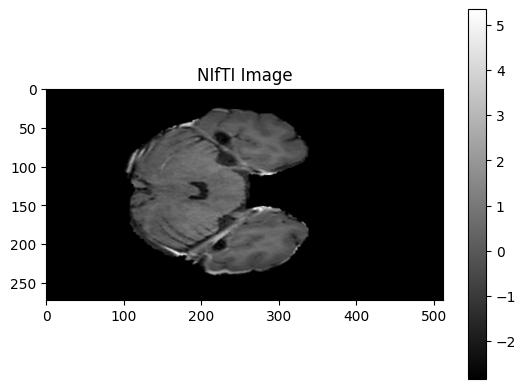

In [15]:
img1 = "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Normalized/Pat8_COL_registered_zscore.nii.gz"
img2 = "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Normalized/Pat8_T1Gado_CHU_brain_zscore.nii.gz"

nifti_image = nib.load(img1)
nifti_mask = nib.load(img2)
imag1 = nifti_image.get_fdata()
imag2 = nifti_mask.get_fdata()

slice_number = 195  # Change this to the desired slice number
plt.imshow(imag1[:, :, slice_number], cmap='gray')
plt.title('NIfTI Image')
plt.colorbar()
plt.show()

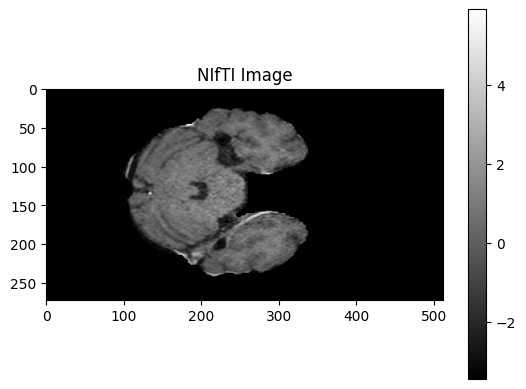

In [16]:
plt.imshow(imag2[:, :, slice_number], cmap='gray')
plt.title('NIfTI Image')
plt.colorbar()
plt.show()

In [61]:

if sum(sum(mask_data[:,:,cpt]))>0
    save2slice(ima_data[:,:,cpt])

-395349.244140625

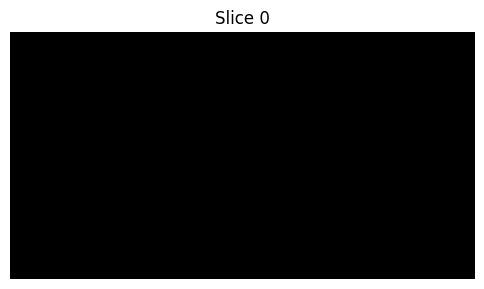

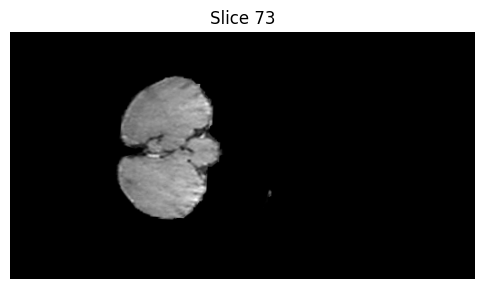

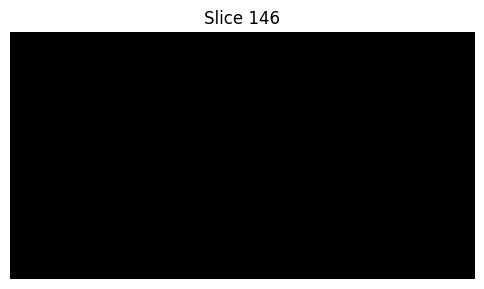

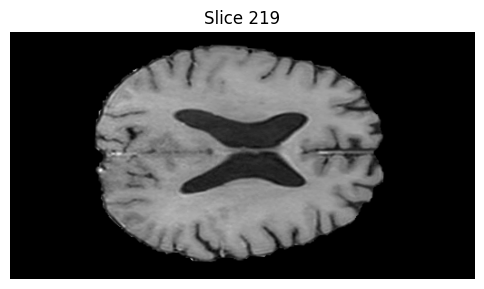

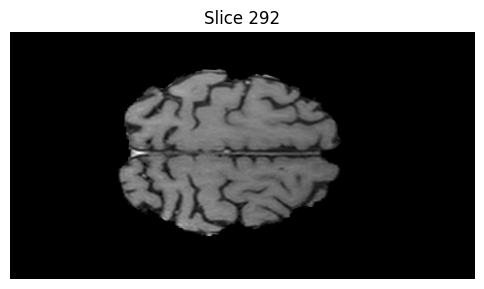

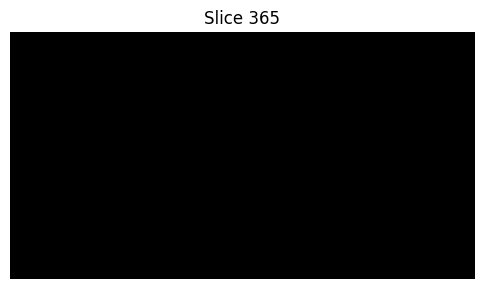

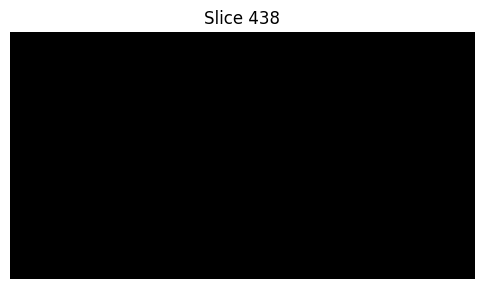

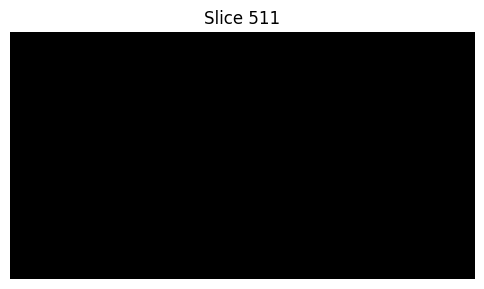

In [37]:
slice_files = sorted([f for f in os.listdir(output_dir) if f.endswith(".nii.gz")])

num_slices_to_display = 7  # Adjust as needed

# Load and display the selected slices
for i in range(0, len(slice_files), len(slice_files) // num_slices_to_display):
    slice_file = slice_files[i]
    slice_path = os.path.join(output_dir, slice_file)

    # Load the slice
    nifti_slice = nib.load(slice_path)
    slice_data = nifti_slice.get_fdata()

    # Display the slice
    plt.figure(figsize=(6, 6))
    plt.imshow(slice_data, cmap="gray")
    plt.title(f"Slice {i}")
    plt.axis("off")
    plt.show()